# Classez des images à l'aide d'algorithmes de Deep Learning

L'objectif de ce projet est de réaliser un algorithme de détection de la race du chien sur une photo, c'est-à-dire classer des image de chiens en fonction de sa race.

Nous avons à notre disposition des données disponibles sur le site http://vision.stanford.edu/aditya86/ImageNetDogs/ qui regroupe 20,580 images de 120 races de chiens.

A partir de ces données, nous devons :

* Pré-processer les photos de chiens avec des techniques spécifiques au traitement d'images
* Mettre en place 2 approches de CNN (rseaux de neurones convolutionnels) en réalisant son propre CNN et en utilisant le Transfert Learning

# Importation des librairies

In [ ]:
# coding: utf-8

import string 
import re
import pandas as pd
from scipy.io import loadmat
import numpy as np
from numpy import array
import matplotlib.pyplot as plt
import numpy as np
import shutil
from PIL import Image
from PIL import ImageOps 
from PIL import ImageFilter
from os import listdir
from os import makedirs
from os import mkdir
import seaborn as sns
import os
from numpy import load
from tensorflow import keras
from keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Flatten, Dense
from keras.callbacks import EarlyStopping
from keras.applications.vgg16 import VGG16
from keras import Model
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import timeit
from keras.layers.pooling import GlobalAveragePooling2D
from keras.layers import Dropout
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV
from keras.preprocessing.image import ImageDataGenerator
from sklearn.preprocessing import LabelEncoder
from keras.applications.vgg16 import preprocess_input
!pip install keras-tuner
from keras.utils import np_utils
from tensorflow.keras import layers
from kerastuner.tuners import RandomSearch, BayesianOptimization
import kerastuner as kt
from kerastuner import RandomSearch
import tensorflow as tf

     |████████████████████████████████| 97 kB 3.9 MB/s 


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:43: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.


# Chargement des données

In [ ]:
chemin_projet = '/Projet_6/'

# Récupération des fichiers

In [ ]:
## Création du dossier des images

!tar -xvf /Projet_6/images.tar

In [ ]:
!tar -xvf  '/Projet_6/images.tar' -C '/Projet_6/'

In [ ]:
## Création du dossier des annotations

!tar -xvf /Projet_6/annotation.tar

In [ ]:
!tar -xvf  '/Projet_6/annotation.tar' -C '/Projet_6/'

In [ ]:
## Création du dossier des lists

!tar -xvf /Projet_6/lists.tar

In [ ]:
!tar -xvf  '/Projet_6/lists.tar' -C '/Projet_6/'

# Traitement sur une image

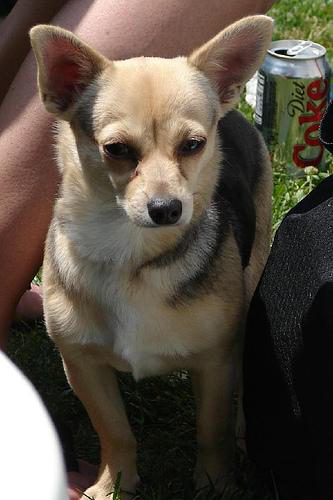

In [ ]:
# Chargement de l'image
img = Image.open('/Projet_6/Images/n02085620-Chihuahua/n02085620_10074.jpg')

# Afficher l'image
img

In [ ]:
## Informations de l'image

# Taille de l'image (en pixels)
w, h = img.size
print("Largeur : {} px, hauteur : {} px".format(w, h))

# Mode de quantification
print("Format des pixels : {}".format(img.mode))

# Taille de la matrice de pixels
print("Taille de la matrice de pixels : {}".format(np.array(img).shape))

Largeur : 333 px, hauteur : 500 px
Format des pixels : RGB
Taille de la matrice de pixels : (500, 333, 3)


In [ ]:
# Valeurs de tous les pixels sous forme d'une matrice
img = np.array(img)
img

array([[[ 11,   9,  14],
        [ 10,   8,  13],
        [  7,   6,  11],
        ...,
        [172, 199, 158],
        [161, 186, 147],
        [145, 165, 130]],

       [[ 11,   9,  14],
        [ 10,   8,  13],
        [  7,   6,  11],
        ...,
        [157, 182, 140],
        [148, 170, 131],
        [140, 161, 122]],

       [[ 10,   8,  13],
        [ 10,   8,  13],
        [  8,   7,  12],
        ...,
        [125, 151, 103],
        [121, 144,  98],
        [123, 145,  99]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [  6,   6,   6],
        [  6,   6,   6],
        [  6,   6,   6]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [  6,   6,   6],
        [  6,   6,   6],
        [  6,   6,   6]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [  7,   7,   7],
        [  7,   7,   7],
        [  7,   7,   7]]

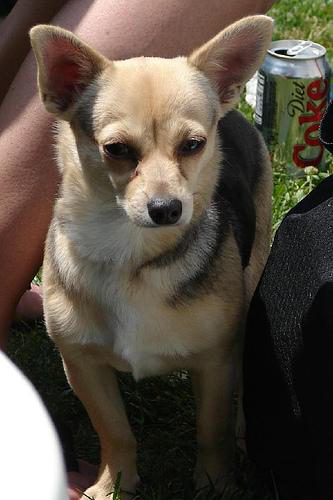

In [ ]:
## Revenir sur l'image

img = Image.fromarray(img) ## .convert('L')
img

In [ ]:
# Redimension de l'image
img = img.resize((224, 224))
## img.resize((224, 224), resample=Image.BILINEAR)

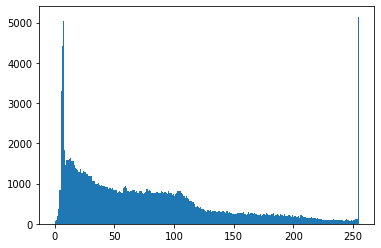

In [ ]:
# Matrice de l'image
img0 = np.array(img)

# Histogramme de l'image
n, bins, patches = plt.hist(img0.flatten(), bins=range(256))
plt.show()

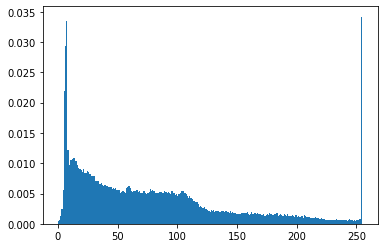

In [ ]:
# Histogramme normalisé de l'image
n, bins, patches = plt.hist(img0.flatten(), bins=range(256), density=True)
plt.show()

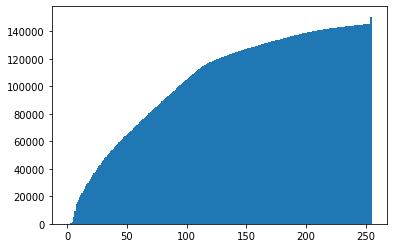

In [ ]:
# Histogramme cumulé
n, bins, patches = plt.hist(img0.flatten(), bins=range(256), cumulative=True)
plt.show()

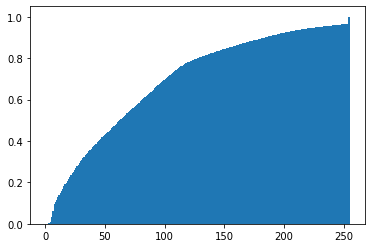

In [ ]:
# Histogramme normalisé cumulé
n, bins, patches = plt.hist(img0.flatten(), bins=range(256), density=True, cumulative=True)
plt.show()

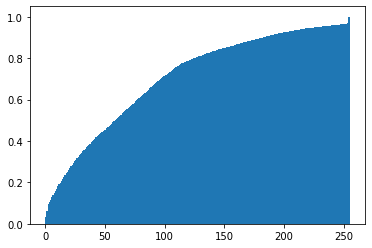

In [ ]:
# Etirement de l'histogramme

img1 = ImageOps.autocontrast(img, cutoff = 2, ignore = 2) 

n, bins, patches = plt.hist(np.array(img1).flatten(), bins=range(256), density=True, cumulative=True)
plt.show()

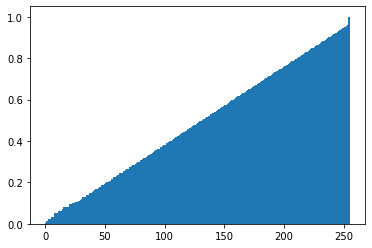

In [ ]:
# Égalisation de l’histogramme

img = ImageOps.equalize(img, mask = None)

n, bins, patches = plt.hist(np.array(img).flatten(), bins=range(256), density=True, cumulative=True)
plt.show()

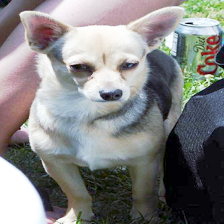

In [ ]:
# Rotation, Zoom et Translation

img = img.rotate(0, resample=Image.BILINEAR) ## Interpolation bilinéaire
img

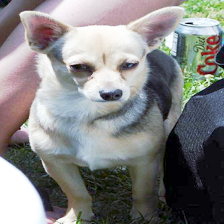

In [ ]:
img.rotate(0, resample=Image.BILINEAR, expand = True) ## Zoom

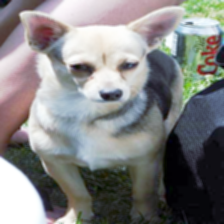

In [ ]:
# Elimination du bruit par Lissage par moyennage

img.filter(ImageFilter.BoxBlur(1))

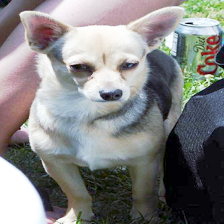

In [ ]:
# Filtre moyenneur

img.filter(ImageFilter.BoxBlur(0))

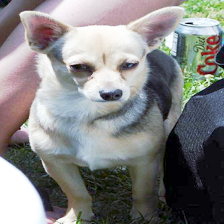

In [ ]:
# Filtre gaussien

img.filter(ImageFilter.GaussianBlur(radius = 0))

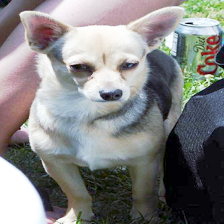

In [ ]:
# Filtre médian

img.filter(ImageFilter.MedianFilter(size = 1)) 

# **Traitement des images**

In [ ]:
images_dossier = '/Projet_6/Images'
train_list = loadmat('/Projet_6/train_list.mat')['file_list'] ## liste du chemin de tous les images qui doivent être entrainées
train_labels = loadmat('/Projet_6/train_list.mat')['labels']
test_list = loadmat('/Projet_6/test_list.mat')['file_list'] ## liste du chemin de tous les images qui doivent être testées
test_labels = loadmat('/Projet_6/test_list.mat')['labels']

In [ ]:
len(os.listdir('/Projet_6/Images'))

120

In [ ]:
n = 0
for i in os.listdir('/Projet_6/Images'):
  n = n +len(os.listdir('/Projet_6/Images/' + i)) # dir is your directory path
print(n)

20580


In [ ]:
## Création des dossiers vides

mkdir(chemin_projet + 'train')
mkdir(chemin_projet + 'test')

In [ ]:
## Création des dossiers vides correspondant aux dossiers de chaque race de chien

for dossier in listdir(images_dossier):
  makedirs('/Projet_6/train/' + dossier)
  makedirs('/Projet_6/test/' + dossier)

In [ ]:
print(len(os.listdir('/Projet_6/train')))
print(len(os.listdir('/Projet_6/test')))

120
120


## Création des jeux de données d'entrainement

In [ ]:
## Noms des chiens du jeu de données d'entrainement 

def noms_chiens(row):
  text = row['noms'][0].replace('/', ' ').split()
  text = re.sub(r'[0-9]+', '', text[0])[2:]
  return text

train_classes = pd.DataFrame(train_list, columns=['noms']).apply(lambda row : noms_chiens(row), axis=1)
train_classes.unique()

array(['Chihuahua', 'Japanese_spaniel', 'Maltese_dog', 'Pekinese',
       'Shih-Tzu', 'Blenheim_spaniel', 'papillon', 'toy_terrier',
       'Rhodesian_ridgeback', 'Afghan_hound', 'basset', 'beagle',
       'bloodhound', 'bluetick', 'black-and-tan_coonhound',
       'Walker_hound', 'English_foxhound', 'redbone', 'borzoi',
       'Irish_wolfhound', 'Italian_greyhound', 'whippet', 'Ibizan_hound',
       'Norwegian_elkhound', 'otterhound', 'Saluki', 'Scottish_deerhound',
       'Weimaraner', 'Staffordshire_bullterrier',
       'American_Staffordshire_terrier', 'Bedlington_terrier',
       'Border_terrier', 'Kerry_blue_terrier', 'Irish_terrier',
       'Norfolk_terrier', 'Norwich_terrier', 'Yorkshire_terrier',
       'wire-haired_fox_terrier', 'Lakeland_terrier', 'Sealyham_terrier',
       'Airedale', 'cairn', 'Australian_terrier', 'Dandie_Dinmont',
       'Boston_bull', 'miniature_schnauzer', 'giant_schnauzer',
       'standard_schnauzer', 'Scotch_terrier', 'Tibetan_terrier',
       'silky

In [ ]:
print(len(train_classes.unique()))

120


In [ ]:
print(train_list.shape)

(12000, 1)


In [ ]:
np.save('liste_races_chien.npy', list(train_classes))
files.download('liste_races_chien.npy')

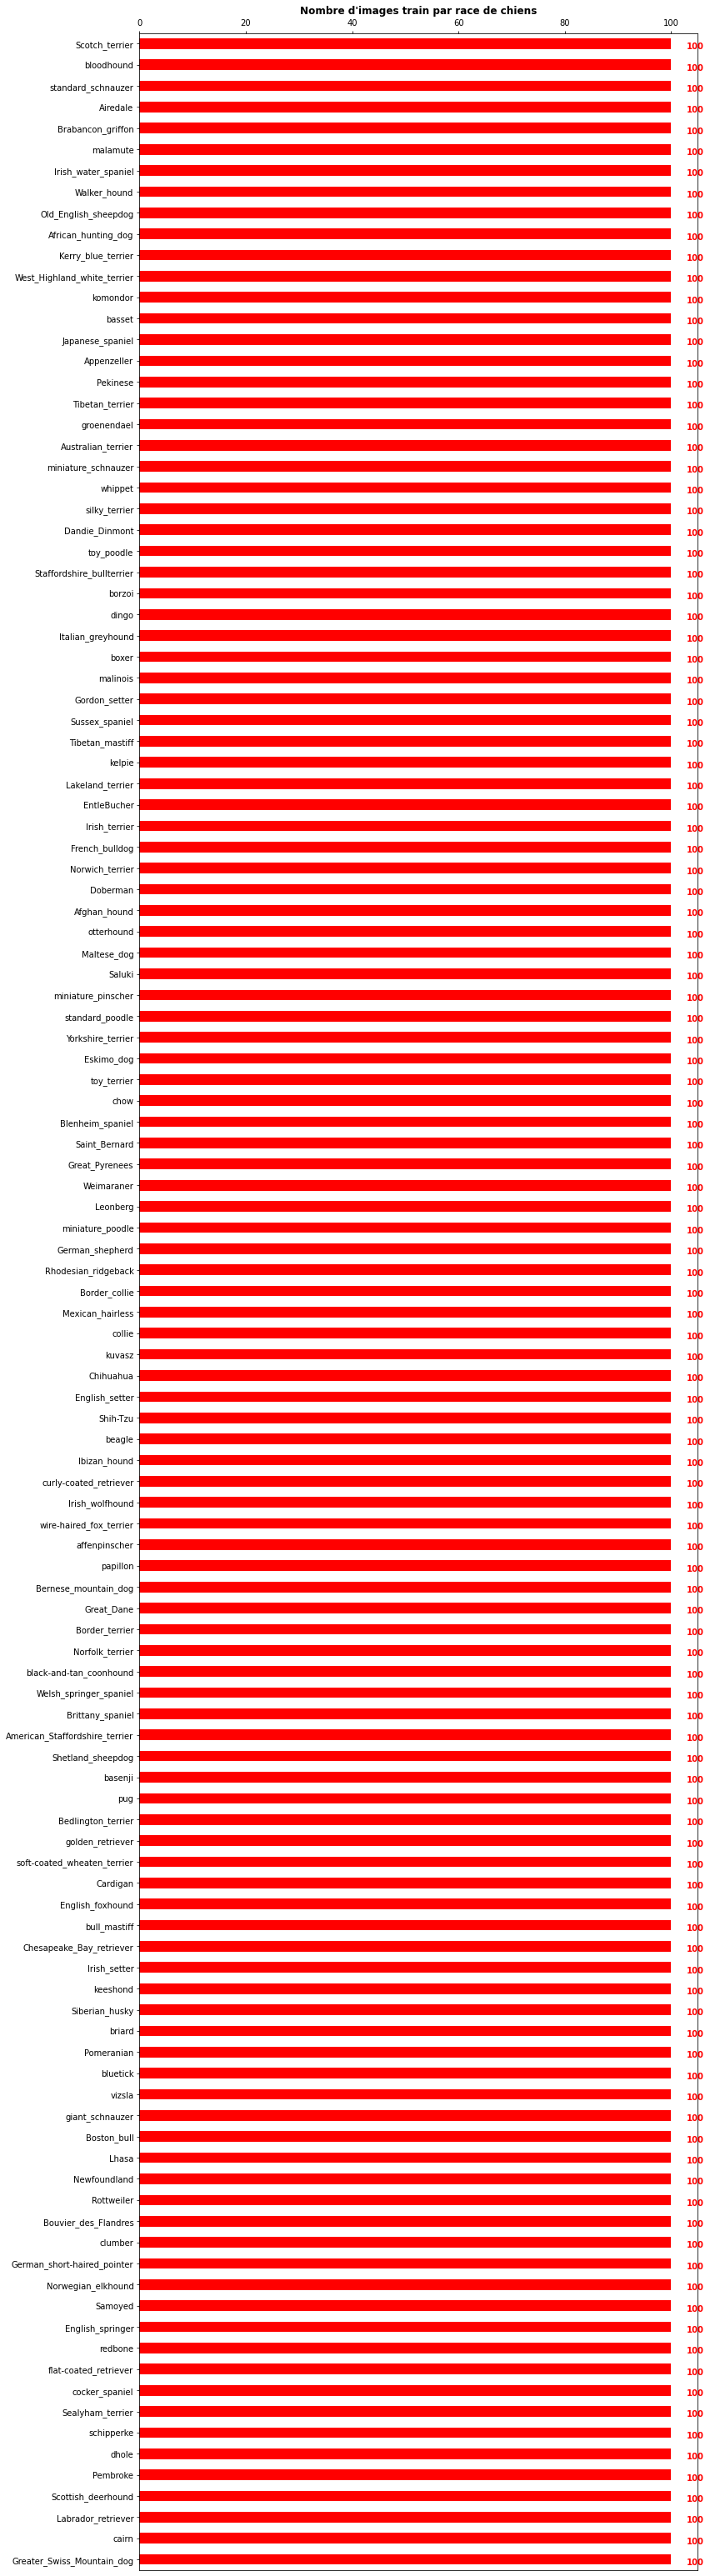

In [ ]:
## Histogramme du Nombre d'images par race de chien

df = pd.DataFrame(train_classes.value_counts(), columns=['Nbr_images'])

fig, ax = plt.subplots(figsize=(12,56))
df['Nbr_images'].plot.barh(ax=ax, color='red')
plt.gca().invert_yaxis()
ax.set_title("Nombre d'images train par race de chiens", fontweight='bold')
ax.xaxis.tick_top()
for i, v in enumerate(df['Nbr_images'].astype(int)):
    ax.text(v + 3, i + .25, str(v), color='red', fontweight='bold')

In [ ]:
## Sauvegarde des images d'entrainement nettoyées dans le dossier train

n = 0
for image in train_list:
  image_train_dossier = '/Projet_6/Images/' + image[0][0] ## chemin de l'image d'entrainement
  img = Image.open(image_train_dossier).convert('RGB') ## L'image 'n02105855-Shetland_sheepdog/n02105855_2933.jpg' d'index 7904 a un mode 'RGBA' et les traitements se font en 'RGB' ou 'L'
  img = img.resize((224, 224))
  img = ImageOps.equalize(img, mask = None)
  img = img.rotate(0, resample=Image.BILINEAR)
  img = img.filter(ImageFilter.BoxBlur(0)) ## Filtre moyenneur
  img.save('/Projet_6/train/' + image[0][0]) ## Enregistrement de l'image d'entrainement nettoyée dans le dossier train
  n=n+1

print(n, 'photos ont bien été sauvegardées dans le dossier train')

12000 photos ont bien été sauvegardées dans le dossier train


In [ ]:
## Création du jeu de données d'entrainement

images_train = []
n = 0

for image in train_list[2:4]:
  image_train_dossier = '/Projet_6/train/' + image[0][0]
  img = Image.open(image_train_dossier)
  n=n+1
  images_train.append(np.array(img))

print(n, 'photos ont bien été enregistrées dans le jeu de données train')

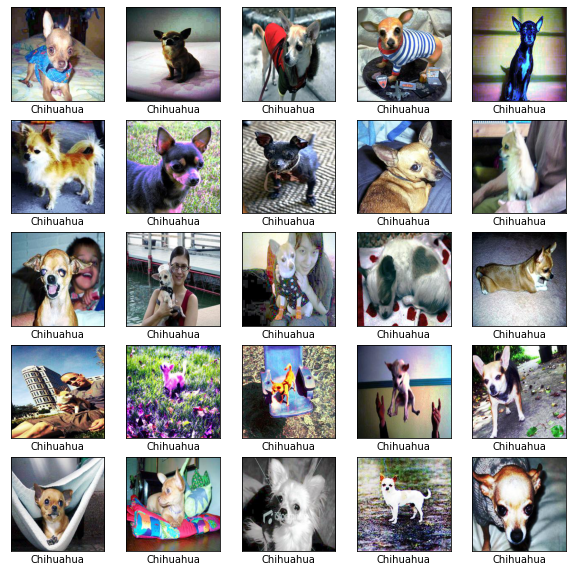

In [ ]:
# Affichage des 25 premières photos du jeu de données d'entrainement

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(images_train[i])
    plt.xlabel(train_classes[i])
plt.show()

In [ ]:
images_train = np.array(images_train, dtype="uint8")

## Création des jeux de données de test

In [ ]:
## Noms des chiens du jeu de données de test 

test_classes = pd.DataFrame(test_list, columns=['noms']).apply(lambda row : noms_chiens(row), axis=1)
test_classes.unique()

array(['Chihuahua', 'Japanese_spaniel', 'Maltese_dog', 'Pekinese',
       'Shih-Tzu', 'Blenheim_spaniel', 'papillon', 'toy_terrier',
       'Rhodesian_ridgeback', 'Afghan_hound', 'basset', 'beagle',
       'bloodhound', 'bluetick', 'black-and-tan_coonhound',
       'Walker_hound', 'English_foxhound', 'redbone', 'borzoi',
       'Irish_wolfhound', 'Italian_greyhound', 'whippet', 'Ibizan_hound',
       'Norwegian_elkhound', 'otterhound', 'Saluki', 'Scottish_deerhound',
       'Weimaraner', 'Staffordshire_bullterrier',
       'American_Staffordshire_terrier', 'Bedlington_terrier',
       'Border_terrier', 'Kerry_blue_terrier', 'Irish_terrier',
       'Norfolk_terrier', 'Norwich_terrier', 'Yorkshire_terrier',
       'wire-haired_fox_terrier', 'Lakeland_terrier', 'Sealyham_terrier',
       'Airedale', 'cairn', 'Australian_terrier', 'Dandie_Dinmont',
       'Boston_bull', 'miniature_schnauzer', 'giant_schnauzer',
       'standard_schnauzer', 'Scotch_terrier', 'Tibetan_terrier',
       'silky

In [ ]:
print(len(test_classes.unique()))

120


In [ ]:
print(test_list.shape)

(8580, 1)


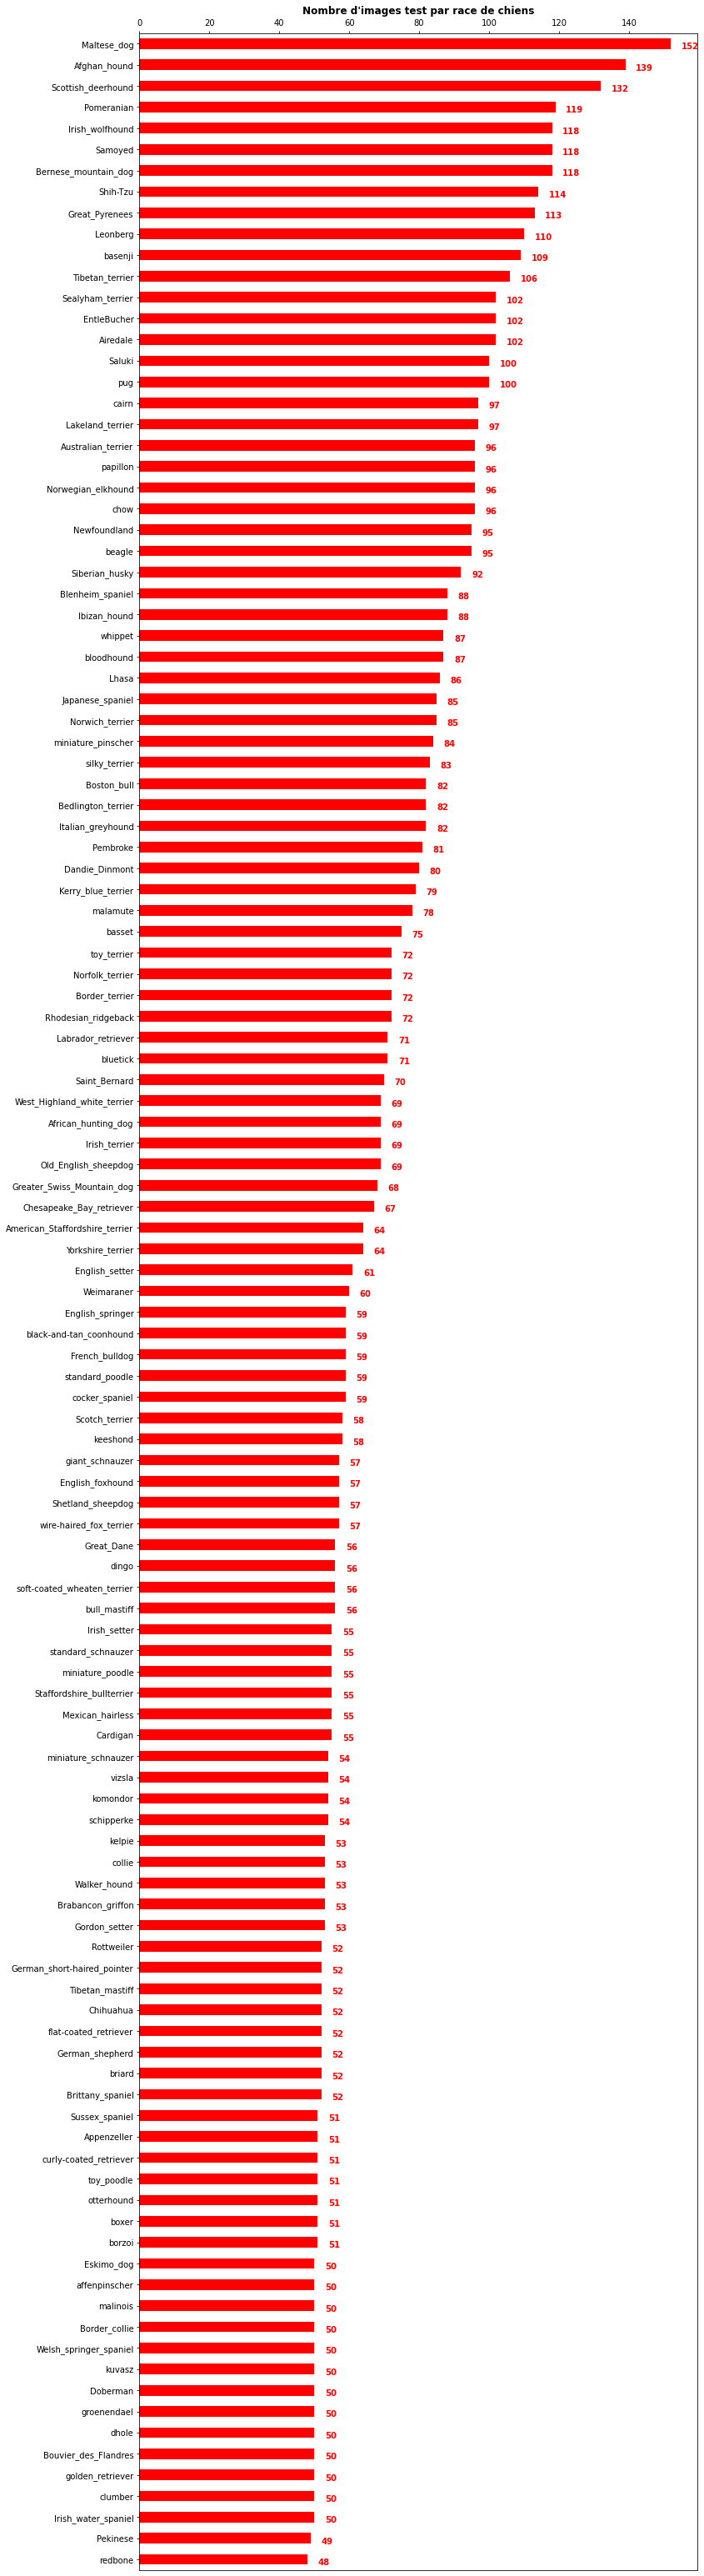

In [ ]:
## Histogramme du Nombre d'images par race de chien

df = pd.DataFrame(test_classes.value_counts(), columns=['Nbr_images'])

fig, ax = plt.subplots(figsize=(12,56))
df['Nbr_images'].plot.barh(ax=ax, color='red')
plt.gca().invert_yaxis()
ax.set_title("Nombre d'images test par race de chiens", fontweight='bold')
ax.xaxis.tick_top()
for i, v in enumerate(df['Nbr_images'].astype(int)):
    ax.text(v + 3, i + .25, str(v), color='red', fontweight='bold')

In [ ]:
## Sauvegarde des images d'entrainement nettoyées dans le dossier test

n = 0
for image in test_list:
  image_test_dossier ='/Projet_6/Images/' + image[0][0] ## chemin de l'image de test
  img = Image.open(image_test_dossier).convert('RGB') 
  img = img.resize((224, 224))
  img = ImageOps.equalize(img, mask = None)
  img = img.rotate(0, resample=Image.BILINEAR)
  img = img.filter(ImageFilter.BoxBlur(0)) ## Filtre moyenneur
  img.save('/Projet_6/test/' + image[0][0]) ## Enregistrement de l'image de test nettoyée dans le dossier test
  n=n+1

print(n, 'photos ont bien été sauvegardées dans le dossier test')

8580 photos ont bien été sauvegardées dans le dossier test


In [ ]:
## Création du jeu de données de test

images_test = []
n = 0

for image in test_list:
  image_test_dossier = '/Projet_6/test/' + image[0][0]
  img = Image.open(image_test_dossier)
  n=n+1
  images_test.append(np.array(img))

print(n, 'photos ont bien été sauvegardées dans le jeu de données test')

8580 photos ont bien été sauvegardées dans le jeu de données test


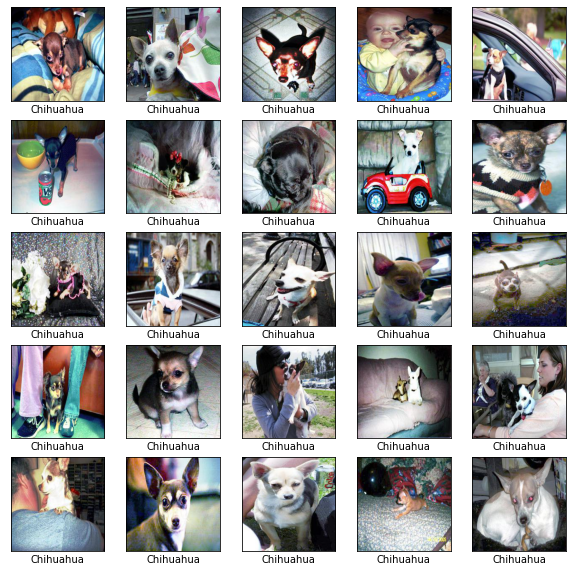

In [ ]:
# Affichage des 25 premières photos du jeu de données de test

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(images_test[i])
    plt.xlabel(test_classes[i])
plt.show()

In [ ]:
images_test = np.array(images_test, dtype="uint8")

# **Réseau de neurones convolutif CNN**

Les réseaux de neurones convolutif peuvent présentés des performances différentes en fonction de l'architecture du modèle et de la valeur des hyperparamètres, soit en fonction :
* du nombre de **couches de Convolution** et de correction **ReLu**
* du nombre de **blocs de convolution** (couches de Convolution, de correction ReLu et de Pooling)
* du nombre de **couches de Fully-connected**
* des paramètres des couches : 
  * le **nombre de filtres** de la couche de Convolution
  * la **taille des cellules** de la couche de Pooling
  * la **taille du vecteur** en sortie de la couche Fully-connected

Compte-tenu du temps nécessaire pour faire tourner ces modèles, la recherche des hyperparamètres optimaux se fera sur un échantillon du jeu de données en ne tenant compte que des 20 premières races de chien. 

L'objectif est de trouver le meilleur modèle pour chaque architecture en adaptant les hyperparamètres pour améliorer le modèle sur le jeu d'entraînement, avant de les comparer sur les résultats obtenus sur le jeu de données test.

## Jeux de données et paramètres

In [ ]:
## Création des jeux de données sur 20 races de chiens

images_train = images_train[:2000]
train_labels = train_labels[:2000]
images_test = images_test[:1633]
test_labels = test_labels[:1633]

print(images_train.shape)
print(images_test.shape)
print('\n')
print(train_labels.shape)
print(test_labels.shape)

(2000, 224, 224, 3)
(1633, 224, 224, 3)


(2000, 1)
(1633, 1)


In [ ]:
## Preprocessing des jeux de données

X_train = images_train.astype(np.float32)
X_test = images_test.astype(np.float32)

X_train = X_train/255.0
X_test = X_test/255.0

In [ ]:
encoder = LabelEncoder()
encoder.fit(train_labels)
y_train = encoder.transform(train_labels)
y_test = encoder.transform(test_labels)

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
## Création des jeux de données de validation

X_train_train, X_validation, y_train_train, y_validation = train_test_split(X_train, y_train, test_size=0.2, stratify=y_train)

In [ ]:
## Encodage des labels des 20 races de chiens 

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

y_validation = to_categorical(y_validation)
y_train_train = to_categorical(y_train_train)

In [ ]:
nb_classes = 20
epochs = 50
batch_size = 64

In [ ]:
print('Dimensions du jeu X_train :', X_train_train.shape)
print('Dimensions du jeu X_validation :', X_validation.shape)
print('Dimensions du jeu X_test :', X_test.shape)
print('-------------------------------------------------')
print('Dimensions du jeu y_train :', y_train_train.shape)
print('Dimensions du jeu y_validation :', y_validation.shape)
print('Dimensions du jeu y_test :', y_test.shape)

Dimensions du jeu X_train : (1600, 224, 224, 3)
Dimensions du jeu X_validation : (400, 224, 224, 3)
Dimensions du jeu X_test : (1633, 224, 224, 3)
-------------------------------------------------
Dimensions du jeu y_train : (1600, 20)
Dimensions du jeu y_validation : (400, 20)
Dimensions du jeu y_test : (1633, 20)


In [ ]:
## Evaluation du modèle

def graphique_resultats(model_final):
  plt.figure(1,figsize=(15,10))
  plt.gcf().subplots_adjust(left = 0.125, bottom = 0.2, right = 1.5, top = 0.9, wspace = 0.5, hspace = 0.6)
  
  plt.subplot(1,2,1)
  plt.plot(model_final.history['accuracy'], label='accuracy')
  plt.plot(model_final.history['val_accuracy'], label = 'val_accuracy')
  plt.xlabel('accuracy')
  plt.ylabel('val_accuracy')
  plt.title('Résultats Accuracy')
  plt.legend(['train', 'test'], loc='upper left')
  
  plt.subplot(1,2,2)
  plt.plot(model_final.history['loss'], label='loss')
  plt.plot(model_final.history['val_loss'], label = 'val_loss')
  plt.xlabel('loss')
  plt.ylabel('val_loss')
  plt.title('Résultats Locc')
  plt.legend(['train', 'test'], loc='upper left')
  
  plt.show()

In [ ]:
tab_resulats_CNN = pd.DataFrame(columns=['Nom', 'Nombre_blocs', 'Nombre_couches_Convolution', 'Nombre_couches_Fully_connected', 'Accuracy_train', 'Loss_train', 'Temps__calcul_train', 'Accuracy_test', 'Loss_test', 'Temps_calcul_test'])
tab_resulats_CNN

Empty DataFrame
Columns: [Nom, Nombre_blocs, Nombre_couches_Convolution, Nombre_couches_Fully_connected, Accuracy_train, Loss_train, Temps__calcul_train, Accuracy_test, Loss_test, Temps_calcul_test]
Index: []

## Définition de l'architecture du modèle de base

Pour chaque architecture de modèle, je testerai les valeurs suivantes pour les hyperparamètres : 
* le nombre de filtres de la couche de Convolution : [32, 64, 128, 256, 512]
* la taille des filtres de la couche de Convolution : [3, 5]
* la taille des cellules de la couche Pooling : [2, 3]
* la taille du vecteur de sortie de la couche Fully-connected : [32, 64, 128, 512, 1024]

In [ ]:
## Paramètres du modèle

nb_blocs = 1
nb_couches_conv = 1
nb_couches_fully = 2

In [ ]:
## Modèle 1 : Structure de base composée d'une couche de Convolution et de Pooling et de 2 couches de Fully-connected

def creation_modele_baseline(hp):
  ## Création de la base convolutive
  model = keras.Sequential([
    keras.layers.Conv2D(
        filters=hp.Choice('conv_1_filter', values = [32, 64, 128]),
        kernel_size=hp.Choice('conv_1_kernel', values = [3, 5]),
        padding = 'same',
        activation='relu',
        input_shape=(224, 224, 3)
    ),

    keras.layers.MaxPooling2D(
        pool_size=hp.Choice('maxpool_1_size', values = [2, 3]),
        strides=(2,2)
    ),

    ## Ajout de la couche fully-connected
    keras.layers.Flatten(),
    keras.layers.Dense(
        units=hp.Choice('dense_1_units', values=[32, 64, 128]),
        activation='relu'
    ),
    keras.layers.Dense(nb_classes, activation='softmax')
  ])

  ## Implémentation du modèle  
  model.compile(optimizer=keras.optimizers.Adam(hp.Choice('learning_rate', values=[0.1, 0.01, 0.001, 0.0001])),
              loss=hp.Choice('Loss', values=['mean_absolute_error', 'categorical_crossentropy']),
              metrics=['accuracy'])
  
  return model

### Recherche des hyperparamètres optimaux du modèle de base

In [ ]:
def recherche_hyperparametres_optimaux(modele):
  ## Création de l'espace de recherche
  tuner = BayesianOptimization(modele, objective='val_accuracy', max_trials = 10, overwrite=True)
  summary = tuner

  ## Recherche des hyperparamètres optimaux
  stop_early = EarlyStopping(monitor='val_accuracy', min_delta=0, patience=5, verbose=1, mode='auto')
  tuner.search(X_train_train, y_train_train, validation_data=(X_validation, y_validation), epochs=epochs, batch_size=batch_size, callbacks=[stop_early])
  summary_2 = tuner

  ## Modèle optimal  
  best_model_optim = tuner.get_best_models(num_models=1)[0]
  model_final = best_model_optim.fit(X_train_train, y_train_train, validation_data=(X_validation, y_validation), epochs=epochs, batch_size=batch_size)
  
  return summary, best_model_optim, model_final, summary_2

def evaluation_model(best_model_optim):
  start_time = timeit.default_timer()
  train_loss, train_acc = best_model_optim.evaluate(X_train, y_train, batch_size=batch_size)
  elapsed_train = timeit.default_timer() - start_time
  
  start_time = timeit.default_timer()
  test_loss, test_acc = best_model_optim.evaluate(X_test, y_test, batch_size=batch_size)
  elapsed_test = timeit.default_timer() - start_time

  return train_loss, train_acc, test_loss, test_acc, [train_acc, train_loss, elapsed_train, test_acc, test_loss, elapsed_test]

In [ ]:
## Résultats de la recherche 

recherche_modele_0 = recherche_hyperparametres_optimaux(creation_modele_baseline)

Trial 10 Complete [00h 00m 35s]
val_accuracy: 0.05000000074505806

Best val_accuracy So Far: 0.13750000298023224
Total elapsed time: 00h 14m 06s
INFO:tensorflow:Oracle triggered exit
Epoch 1/50
25/25 [==============================] - 4s 144ms/step - loss: 1.2740 - accuracy: 0.7581 - val_loss: 3.0452 - val_accuracy: 0.1025
Epoch 2/50
25/25 [==============================] - 3s 136ms/step - loss: 1.1895 - accuracy: 0.7825 - val_loss: 3.1423 - val_accuracy: 0.1025
Epoch 3/50
25/25 [==============================] - 3s 135ms/step - loss: 1.1123 - accuracy: 0.8094 - val_loss: 3.0054 - val_accuracy: 0.1375
Epoch 4/50
25/25 [==============================] - 3s 134ms/step - loss: 1.0035 - accuracy: 0.8737 - val_loss: 3.1077 - val_accuracy: 0.1225
Epoch 5/50
25/25 [==============================] - 3s 131ms/step - loss: 0.9752 - accuracy: 0.8550 - val_loss: 3.2216 - val_accuracy: 0.1000
Epoch 6/50
25/25 [==============================] - 3s 130ms/step - loss: 0.9342 - accuracy: 0.8581 - val_l

In [ ]:
## Espace de recherche

recherche_modele_0[0].search_space_summary()

Search space summary
Default search space size: 6
conv_1_filter (Choice)
{'default': 32, 'conditions': [], 'values': [32, 64, 128], 'ordered': True}
conv_1_kernel (Choice)
{'default': 3, 'conditions': [], 'values': [3, 5], 'ordered': True}
maxpool_1_size (Choice)
{'default': 2, 'conditions': [], 'values': [2, 3], 'ordered': True}
dense_1_units (Choice)
{'default': 32, 'conditions': [], 'values': [32, 64, 128], 'ordered': True}
learning_rate (Choice)
{'default': 0.1, 'conditions': [], 'values': [0.1, 0.01, 0.001, 0.0001], 'ordered': True}
Loss (Choice)
{'default': 'mean_absolute_error', 'conditions': [], 'values': ['mean_absolute_error', 'categorical_crossentropy'], 'ordered': False}


In [ ]:
## Modèle optimal

recherche_modele_0[1].summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 224, 224, 32)      2432      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 32)      0         
_________________________________________________________________
flatten (Flatten)            (None, 401408)            0         
_________________________________________________________________
dense (Dense)                (None, 128)               51380352  
_________________________________________________________________
dense_1 (Dense)              (None, 20)                2580      
Total params: 51,385,364
Trainable params: 51,385,364
Non-trainable params: 0
_________________________________________________________________


In [ ]:
## Hyperparamètres optimaux

recherche_modele_0[3].results_summary()

Results summary
Results in ./untitled_project
Showing 10 best trials
Objective(name='val_accuracy', direction='max')
Trial summary
Hyperparameters:
conv_1_filter: 32
conv_1_kernel: 5
maxpool_1_size: 2
dense_1_units: 128
learning_rate: 0.0001
Loss: categorical_crossentropy
Score: 0.13750000298023224
Trial summary
Hyperparameters:
conv_1_filter: 32
conv_1_kernel: 5
maxpool_1_size: 2
dense_1_units: 128
learning_rate: 0.001
Loss: categorical_crossentropy
Score: 0.12999999523162842
Trial summary
Hyperparameters:
conv_1_filter: 32
conv_1_kernel: 5
maxpool_1_size: 2
dense_1_units: 128
learning_rate: 0.0001
Loss: categorical_crossentropy
Score: 0.10999999940395355
Trial summary
Hyperparameters:
conv_1_filter: 64
conv_1_kernel: 5
maxpool_1_size: 2
dense_1_units: 128
learning_rate: 0.0001
Loss: categorical_crossentropy
Score: 0.10000000149011612
Trial summary
Hyperparameters:
conv_1_filter: 32
conv_1_kernel: 5
maxpool_1_size: 2
dense_1_units: 128
learning_rate: 0.0001
Loss: categorical_crossentr

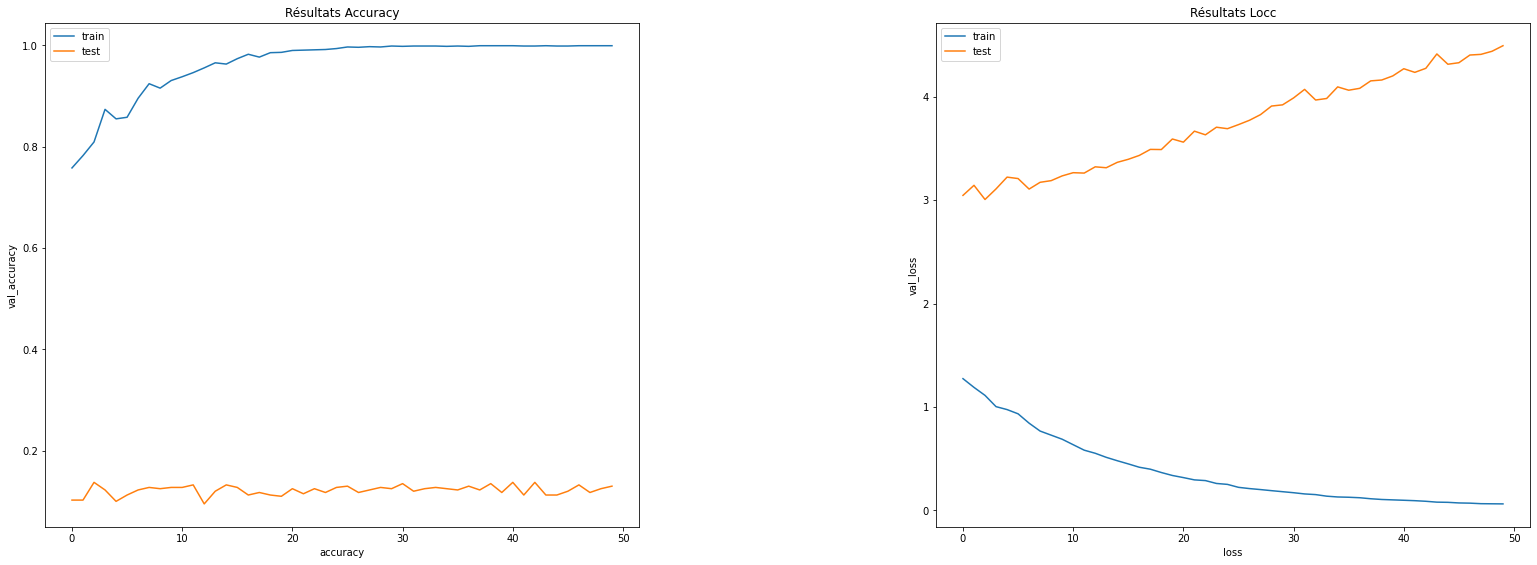

In [ ]:
## Evaluation du modèle

graphique_resultats(recherche_modele_0[2])

In [ ]:
## Evaluation du modèle

evaluation_model_0 = evaluation_model(recherche_modele_0[1])

print('Loss sur le jeu d\'entrainement: %.2f' % (evaluation_model_0[0]))
print('Accuracy sur le jeu d\'entrainement: %.2f' % (evaluation_model_0[1]))
print('------------------------------------------------------------')
print('Locc sur le jeu de test: %.2f' % (evaluation_model_0[2]))
print('Accuracy sur le jeu de test: %.2f' % (evaluation_model_0[3]))

26/26 [==============================] - 2s 57ms/step - loss: 4.5458 - accuracy: 0.1047
Loss sur le jeu d'entrainement: 0.95
Accuracy sur le jeu d'entrainement: 0.83
------------------------------------------------------------
Locc sur le jeu de test: 4.55
Accuracy sur le jeu de test: 0.10


In [ ]:
tab_resulats_CNN.loc[0] = ['Modele_0', nb_blocs, nb_couches_conv, nb_couches_fully] + evaluation_model_0[4]
tab_resulats_CNN

Nom Nombre_blocs  ... Loss_test Temps_calcul_test
0  Modele_0            1  ...   4.54577          3.537774

[1 rows x 10 columns]

## Choix du nombre de blocs de Convolution

Nous pouvons choisir le nombre de blocs de couches de Convolution et de correction ReLu, suivie d'une couche de Pooling entre 3, 5, et 7 blocs.

In [ ]:
## Paramètres du modèle

nb_couches_conv = 1
nb_couches_fully = 2

In [ ]:
## Modèle 2 : Choix du nombre de blocs de Convolution et de correction ReLu

def creation_modele_choix_blocs(hp):
  ## Création de la base convolutive
  model = Sequential()
  model.add(Conv2D(
      filters=hp.Choice('filter_1', values = [32, 64, 128]),
      kernel_size=hp.Choice('kernel_1', values = [3, 5]),
      padding = 'same',
      activation='relu',
      input_shape=(224, 224, 3)
      )
  )
  model.add(MaxPooling2D(
      pool_size=hp.Choice('size_1', values = [2, 3]),
      strides=(2,2)
      )
  )

  ## Choix du nombre de blocs
  for i in range(2, nb_blocs+1):
    model.add(Conv2D(
        filters=hp.Choice('filter_'+str(i), values = [32, 64, 128, 256, 512]),
        kernel_size=hp.Choice('kernel_'+str(i), values = [3, 5]),
        padding = 'same',
        activation='relu'
        )
    )
    model.add(MaxPooling2D(
        pool_size=hp.Choice('size_'+str(i), values = [2, 3]),
        strides=(2,2)
        )
    )

  ## Ajout de la couche fully-connected
  model.add(Flatten())
  model.add(Dense(
      units=hp.Choice('units_1', values=[32, 64, 128]), 
      activation='relu'
      )
  )
  model.add(Dense(nb_classes, activation='softmax'))

  ## Implémentation du modèle  
  model.compile(optimizer=keras.optimizers.Adam(hp.Choice('learning_rate', values=[0.1, 0.01, 0.001, 0.0001])),
              loss=hp.Choice('Loss', values=['mean_absolute_error', 'categorical_crossentropy']),
              metrics=['accuracy'])
  
  return model

### Recherche des hyperparamètres optimaux pour chaque architecture de modèle

In [ ]:
## Choix de 3 blocs de Convolution : Résultats de la recherche 

nb_blocs = 3
recherche_modele_1 = recherche_hyperparametres_optimaux(creation_modele_choix_blocs)

Trial 10 Complete [00h 07m 32s]
val_accuracy: 0.11749999970197678

Best val_accuracy So Far: 0.1550000011920929
Total elapsed time: 01h 07m 57s
INFO:tensorflow:Oracle triggered exit
Epoch 1/50
25/25 [==============================] - 26s 1s/step - loss: 0.0515 - accuracy: 0.9862 - val_loss: 10.4161 - val_accuracy: 0.1275
Epoch 2/50
25/25 [==============================] - 25s 1s/step - loss: 0.0415 - accuracy: 0.9894 - val_loss: 10.5702 - val_accuracy: 0.1350
Epoch 3/50
25/25 [==============================] - 25s 1s/step - loss: 0.0335 - accuracy: 0.9900 - val_loss: 10.6879 - val_accuracy: 0.1375
Epoch 4/50
25/25 [==============================] - 25s 1s/step - loss: 0.0294 - accuracy: 0.9906 - val_loss: 11.3498 - val_accuracy: 0.1250
Epoch 5/50
25/25 [==============================] - 25s 1s/step - loss: 0.0278 - accuracy: 0.9931 - val_loss: 11.2300 - val_accuracy: 0.1225
Epoch 6/50
25/25 [==============================] - 25s 1s/step - loss: 0.0287 - accuracy: 0.9925 - val_loss: 11.

In [ ]:
## Espace de recherche

recherche_modele_1[0].search_space_summary()

Search space summary
Default search space size: 12
filter_1 (Choice)
{'default': 32, 'conditions': [], 'values': [32, 64, 128], 'ordered': True}
kernel_1 (Choice)
{'default': 3, 'conditions': [], 'values': [3, 5], 'ordered': True}
size_1 (Choice)
{'default': 2, 'conditions': [], 'values': [2, 3], 'ordered': True}
filter_2 (Choice)
{'default': 32, 'conditions': [], 'values': [32, 64, 128, 256, 512], 'ordered': True}
kernel_2 (Choice)
{'default': 3, 'conditions': [], 'values': [3, 5], 'ordered': True}
size_2 (Choice)
{'default': 2, 'conditions': [], 'values': [2, 3], 'ordered': True}
filter_3 (Choice)
{'default': 32, 'conditions': [], 'values': [32, 64, 128, 256, 512], 'ordered': True}
kernel_3 (Choice)
{'default': 3, 'conditions': [], 'values': [3, 5], 'ordered': True}
size_3 (Choice)
{'default': 2, 'conditions': [], 'values': [2, 3], 'ordered': True}
units_1 (Choice)
{'default': 32, 'conditions': [], 'values': [32, 64, 128], 'ordered': True}
learning_rate (Choice)
{'default': 0.1, 'con

In [ ]:
recherche_modele_1[1].summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 224, 224, 32)      2432      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 112, 112, 512)     147968    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 55, 55, 512)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 55, 55, 512)       2359808   
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 27, 27, 512)       0         
_________________________________________________________________
flatten (Flatten)            (None, 373248)            0

In [ ]:
## Hyperparamètres optimaux

recherche_modele_1[3].results_summary()

Results summary
Results in ./untitled_project
Showing 10 best trials
Objective(name='val_accuracy', direction='max')
Trial summary
Hyperparameters:
filter_1: 32
kernel_1: 5
size_1: 2
filter_2: 512
kernel_2: 3
size_2: 3
filter_3: 512
kernel_3: 3
size_3: 3
units_1: 32
learning_rate: 0.0001
Loss: categorical_crossentropy
Score: 0.1550000011920929
Trial summary
Hyperparameters:
filter_1: 32
kernel_1: 5
size_1: 2
filter_2: 512
kernel_2: 3
size_2: 3
filter_3: 512
kernel_3: 3
size_3: 3
units_1: 32
learning_rate: 0.0001
Loss: categorical_crossentropy
Score: 0.125
Trial summary
Hyperparameters:
filter_1: 32
kernel_1: 5
size_1: 2
filter_2: 512
kernel_2: 3
size_2: 3
filter_3: 512
kernel_3: 3
size_3: 3
units_1: 32
learning_rate: 0.0001
Loss: categorical_crossentropy
Score: 0.11749999970197678
Trial summary
Hyperparameters:
filter_1: 32
kernel_1: 5
size_1: 2
filter_2: 512
kernel_2: 3
size_2: 3
filter_3: 512
kernel_3: 3
size_3: 3
units_1: 32
learning_rate: 0.0001
Loss: categorical_crossentropy
Score

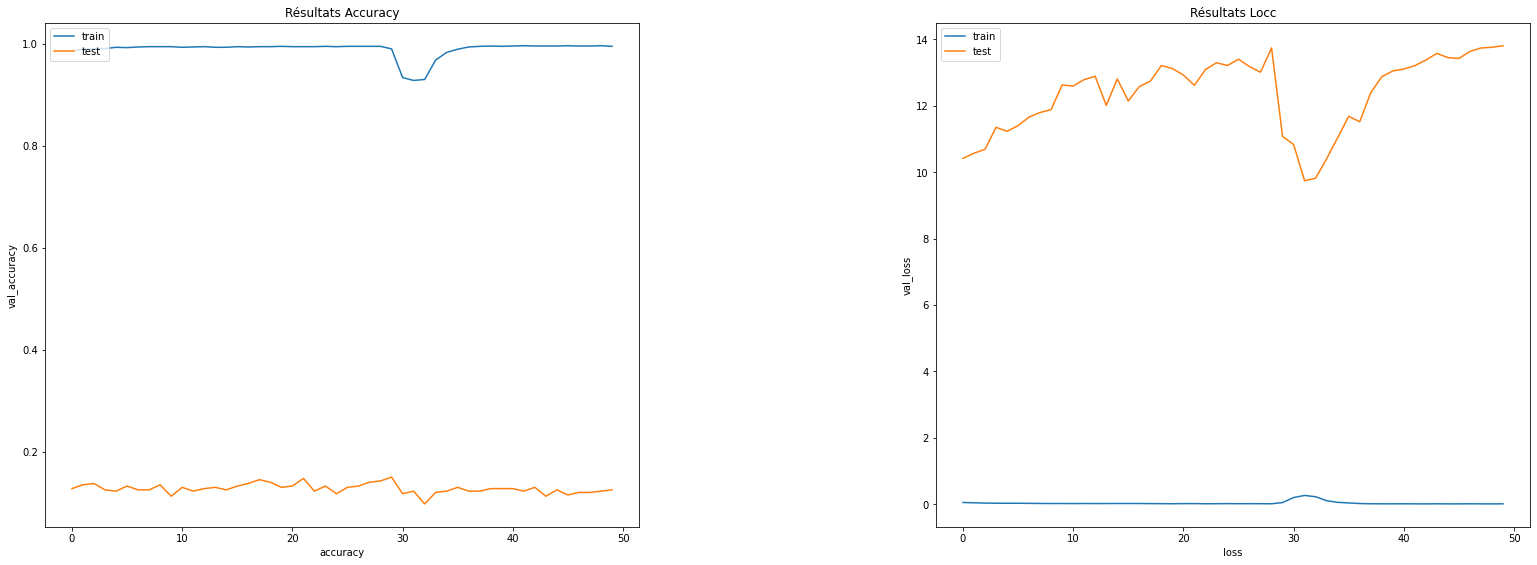

In [ ]:
## Evaluation du modèle

graphique_resultats(recherche_modele_1[2])

In [ ]:
## Evaluation du modèle

evaluation_model_1 = evaluation_model(recherche_modele_1[1])

print('Loss sur le jeu d\'entrainement: %.2f' % (evaluation_model_1[0]))
print('Accuracy sur le jeu d\'entrainement: %.2f' % (evaluation_model_1[1]))
print('------------------------------------------------------------')
print('Locc sur le jeu de test: %.2f' % (evaluation_model_1[2]))
print('Accuracy sur le jeu de test: %.2f' % (evaluation_model_1[3]))

26/26 [==============================] - 16s 614ms/step - loss: 13.1053 - accuracy: 0.1200
Loss sur le jeu d'entrainement: 2.77
Accuracy sur le jeu d'entrainement: 0.82
------------------------------------------------------------
Locc sur le jeu de test: 13.11
Accuracy sur le jeu de test: 0.12


In [ ]:
tab_resulats_CNN.loc[1] = ['Modele_1', nb_blocs, nb_couches_conv, nb_couches_fully] + evaluation_model_1[4]
tab_resulats_CNN

Nom Nombre_blocs  ...  Loss_test Temps_calcul_test
0  Modele_0            1  ...   4.545770          3.537774
1  Modele_1            3  ...  13.105293         21.329389

[2 rows x 10 columns]

In [ ]:
## Choix de 5 blocs de Convolution : Résultats de la recherche 

nb_blocs = 5
recherche_modele_2 = recherche_hyperparametres_optimaux(creation_modele_choix_blocs)

Trial 10 Complete [00h 04m 44s]
val_accuracy: 0.1899999976158142

Best val_accuracy So Far: 0.23250000178813934
Total elapsed time: 02h 26m 52s
INFO:tensorflow:Oracle triggered exit
Epoch 1/50
25/25 [==============================] - 12s 463ms/step - loss: 0.4946 - accuracy: 0.8631 - val_loss: 4.0056 - val_accuracy: 0.2425
Epoch 2/50
25/25 [==============================] - 11s 450ms/step - loss: 0.3377 - accuracy: 0.9056 - val_loss: 4.4123 - val_accuracy: 0.2075
Epoch 3/50
25/25 [==============================] - 11s 449ms/step - loss: 0.2682 - accuracy: 0.9362 - val_loss: 4.6247 - val_accuracy: 0.2025
Epoch 4/50
25/25 [==============================] - 11s 450ms/step - loss: 0.1617 - accuracy: 0.9669 - val_loss: 4.9805 - val_accuracy: 0.2275
Epoch 5/50
25/25 [==============================] - 11s 452ms/step - loss: 0.0954 - accuracy: 0.9875 - val_loss: 5.2156 - val_accuracy: 0.2300
Epoch 6/50
25/25 [==============================] - 11s 451ms/step - loss: 0.0613 - accuracy: 0.9931 - 

In [ ]:
## Espace de recherche

recherche_modele_2[0].search_space_summary()

Search space summary
Default search space size: 18
filter_1 (Choice)
{'default': 32, 'conditions': [], 'values': [32, 64, 128], 'ordered': True}
kernel_1 (Choice)
{'default': 3, 'conditions': [], 'values': [3, 5], 'ordered': True}
size_1 (Choice)
{'default': 2, 'conditions': [], 'values': [2, 3], 'ordered': True}
filter_2 (Choice)
{'default': 32, 'conditions': [], 'values': [32, 64, 128, 256, 512], 'ordered': True}
kernel_2 (Choice)
{'default': 3, 'conditions': [], 'values': [3, 5], 'ordered': True}
size_2 (Choice)
{'default': 2, 'conditions': [], 'values': [2, 3], 'ordered': True}
filter_3 (Choice)
{'default': 32, 'conditions': [], 'values': [32, 64, 128, 256, 512], 'ordered': True}
kernel_3 (Choice)
{'default': 3, 'conditions': [], 'values': [3, 5], 'ordered': True}
size_3 (Choice)
{'default': 2, 'conditions': [], 'values': [2, 3], 'ordered': True}
filter_4 (Choice)
{'default': 32, 'conditions': [], 'values': [32, 64, 128, 256, 512], 'ordered': True}
kernel_4 (Choice)
{'default': 3, 

In [ ]:
recherche_modele_2[1].summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 224, 224, 128)     3584      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 111, 111, 128)     0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 111, 111, 32)      102432    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 55, 55, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 55, 55, 256)       73984     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 27, 27, 256)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 27, 27, 32)        2

In [ ]:
## Hyperparamètres optimaux

recherche_modele_2[3].results_summary()

Results summary
Results in ./untitled_project
Showing 10 best trials
Objective(name='val_accuracy', direction='max')
Trial summary
Hyperparameters:
filter_1: 128
kernel_1: 3
size_1: 3
filter_2: 32
kernel_2: 5
size_2: 3
filter_3: 256
kernel_3: 3
size_3: 3
filter_4: 32
kernel_4: 5
size_4: 3
filter_5: 512
kernel_5: 3
size_5: 3
units_1: 128
learning_rate: 0.0001
Loss: categorical_crossentropy
Score: 0.23250000178813934
Trial summary
Hyperparameters:
filter_1: 128
kernel_1: 3
size_1: 3
filter_2: 32
kernel_2: 5
size_2: 3
filter_3: 256
kernel_3: 3
size_3: 3
filter_4: 32
kernel_4: 5
size_4: 3
filter_5: 512
kernel_5: 3
size_5: 3
units_1: 128
learning_rate: 0.0001
Loss: categorical_crossentropy
Score: 0.2150000035762787
Trial summary
Hyperparameters:
filter_1: 128
kernel_1: 3
size_1: 3
filter_2: 512
kernel_2: 5
size_2: 3
filter_3: 256
kernel_3: 3
size_3: 3
filter_4: 32
kernel_4: 5
size_4: 3
filter_5: 256
kernel_5: 3
size_5: 3
units_1: 128
learning_rate: 0.0001
Loss: categorical_crossentropy
Scor

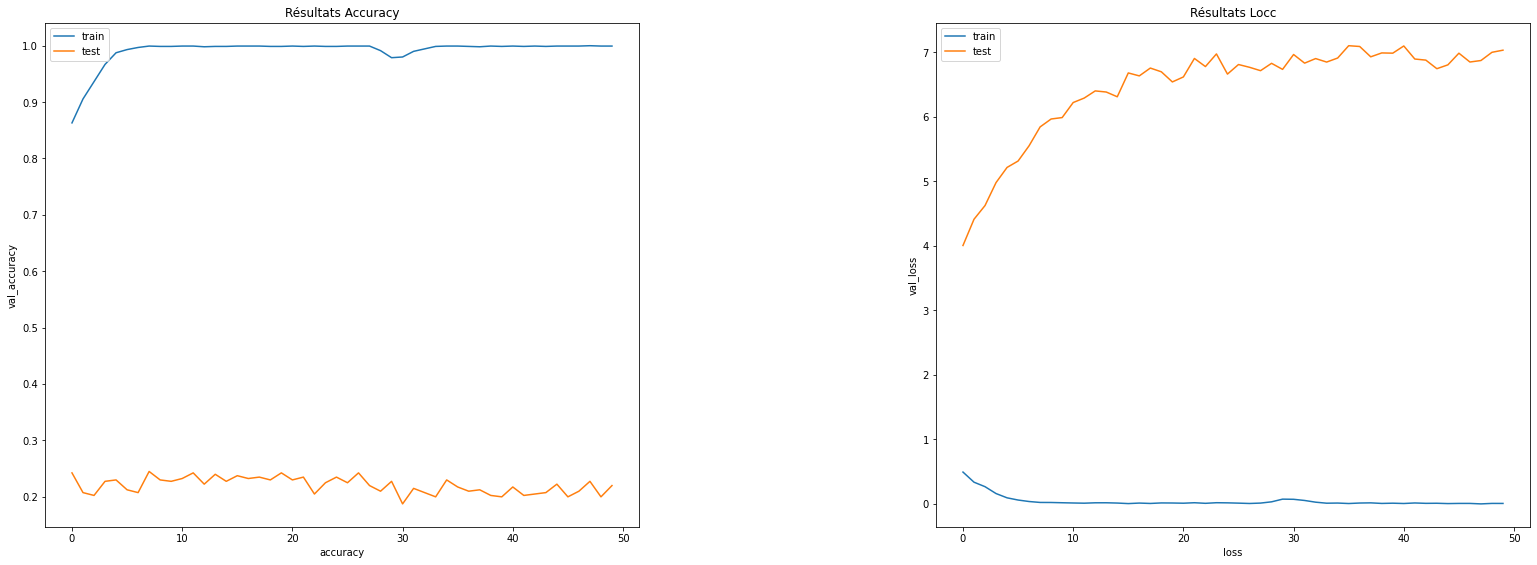

In [ ]:
## Evaluation du modèle

graphique_resultats(recherche_modele_2[2])

In [ ]:
## Evaluation du modèle

evaluation_model_2 = evaluation_model(recherche_modele_2[1])

print('Loss sur le jeu d\'entrainement: %.2f' % (evaluation_model_2[0]))
print('Accuracy sur le jeu d\'entrainement: %.2f' % (evaluation_model_2[1]))
print('------------------------------------------------------------')
print('Locc sur le jeu de test: %.2f' % (evaluation_model_2[2]))
print('Accuracy sur le jeu de test: %.2f' % (evaluation_model_2[3]))

26/26 [==============================] - 5s 177ms/step - loss: 7.4998 - accuracy: 0.1966
Loss sur le jeu d'entrainement: 1.41
Accuracy sur le jeu d'entrainement: 0.84
------------------------------------------------------------
Locc sur le jeu de test: 7.50
Accuracy sur le jeu de test: 0.20


In [ ]:
tab_resulats_CNN.loc[2] = ['Modele_2', nb_blocs, nb_couches_conv, nb_couches_fully] + evaluation_model_2[4]
tab_resulats_CNN

Nom Nombre_blocs  ...  Loss_test Temps_calcul_test
0  Modele_0            1  ...   4.545770          3.537774
1  Modele_1            3  ...  13.105293         21.329389
2  Modele_2            5  ...   7.499770          5.975756

[3 rows x 10 columns]

In [ ]:
## Choix de 7 blocs de Convolution : Résultats de la recherche 

nb_blocs = 7
recherche_modele_3 = recherche_hyperparametres_optimaux(creation_modele_choix_blocs)

Trial 10 Complete [00h 04m 11s]
val_accuracy: 0.05000000074505806

Best val_accuracy So Far: 0.125
Total elapsed time: 00h 43m 07s
INFO:tensorflow:Oracle triggered exit
Epoch 1/50
25/25 [==============================] - 17s 660ms/step - loss: 0.0895 - accuracy: 0.1081 - val_loss: 0.0897 - val_accuracy: 0.1000
Epoch 2/50
25/25 [==============================] - 16s 650ms/step - loss: 0.0887 - accuracy: 0.1163 - val_loss: 0.0923 - val_accuracy: 0.0775
Epoch 3/50
25/25 [==============================] - 16s 649ms/step - loss: 0.0901 - accuracy: 0.1000 - val_loss: 0.0875 - val_accuracy: 0.1325
Epoch 4/50
25/25 [==============================] - 16s 648ms/step - loss: 0.0889 - accuracy: 0.1131 - val_loss: 0.0894 - val_accuracy: 0.1075
Epoch 5/50
25/25 [==============================] - 16s 649ms/step - loss: 0.0882 - accuracy: 0.1219 - val_loss: 0.0881 - val_accuracy: 0.1225
Epoch 6/50
25/25 [==============================] - 16s 648ms/step - loss: 0.0871 - accuracy: 0.1325 - val_loss: 0.0

In [ ]:
## Espace de recherche

recherche_modele_3[0].search_space_summary()

Search space summary
Default search space size: 24
filter_1 (Choice)
{'default': 32, 'conditions': [], 'values': [32, 64, 128], 'ordered': True}
kernel_1 (Choice)
{'default': 3, 'conditions': [], 'values': [3, 5], 'ordered': True}
size_1 (Choice)
{'default': 2, 'conditions': [], 'values': [2, 3], 'ordered': True}
filter_2 (Choice)
{'default': 32, 'conditions': [], 'values': [32, 64, 128, 256, 512], 'ordered': True}
kernel_2 (Choice)
{'default': 3, 'conditions': [], 'values': [3, 5], 'ordered': True}
size_2 (Choice)
{'default': 2, 'conditions': [], 'values': [2, 3], 'ordered': True}
filter_3 (Choice)
{'default': 32, 'conditions': [], 'values': [32, 64, 128, 256, 512], 'ordered': True}
kernel_3 (Choice)
{'default': 3, 'conditions': [], 'values': [3, 5], 'ordered': True}
size_3 (Choice)
{'default': 2, 'conditions': [], 'values': [2, 3], 'ordered': True}
filter_4 (Choice)
{'default': 32, 'conditions': [], 'values': [32, 64, 128, 256, 512], 'ordered': True}
kernel_4 (Choice)
{'default': 3, 

In [ ]:
recherche_modele_3[1].summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 224, 224, 128)     9728      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 111, 111, 128)     0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 111, 111, 128)     409728    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 55, 55, 128)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 55, 55, 32)        102432    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 27, 27, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 27, 27, 64)        5

In [ ]:
## Hyperparamètres optimaux

recherche_modele_3[3].results_summary()

Results summary
Results in ./untitled_project
Showing 10 best trials
Objective(name='val_accuracy', direction='max')
Trial summary
Hyperparameters:
filter_1: 128
kernel_1: 5
size_1: 3
filter_2: 128
kernel_2: 5
size_2: 3
filter_3: 32
kernel_3: 5
size_3: 3
filter_4: 64
kernel_4: 5
size_4: 3
filter_5: 32
kernel_5: 5
size_5: 3
filter_6: 32
kernel_6: 3
size_6: 3
filter_7: 64
kernel_7: 5
size_7: 2
units_1: 32
learning_rate: 0.0001
Loss: mean_absolute_error
Score: 0.125
Trial summary
Hyperparameters:
filter_1: 128
kernel_1: 5
size_1: 3
filter_2: 128
kernel_2: 5
size_2: 3
filter_3: 32
kernel_3: 5
size_3: 3
filter_4: 512
kernel_4: 5
size_4: 3
filter_5: 32
kernel_5: 5
size_5: 3
filter_6: 32
kernel_6: 3
size_6: 3
filter_7: 32
kernel_7: 5
size_7: 2
units_1: 32
learning_rate: 0.0001
Loss: mean_absolute_error
Score: 0.08500000089406967
Trial summary
Hyperparameters:
filter_1: 128
kernel_1: 5
size_1: 3
filter_2: 128
kernel_2: 5
size_2: 3
filter_3: 32
kernel_3: 5
size_3: 3
filter_4: 64
kernel_4: 5
siz

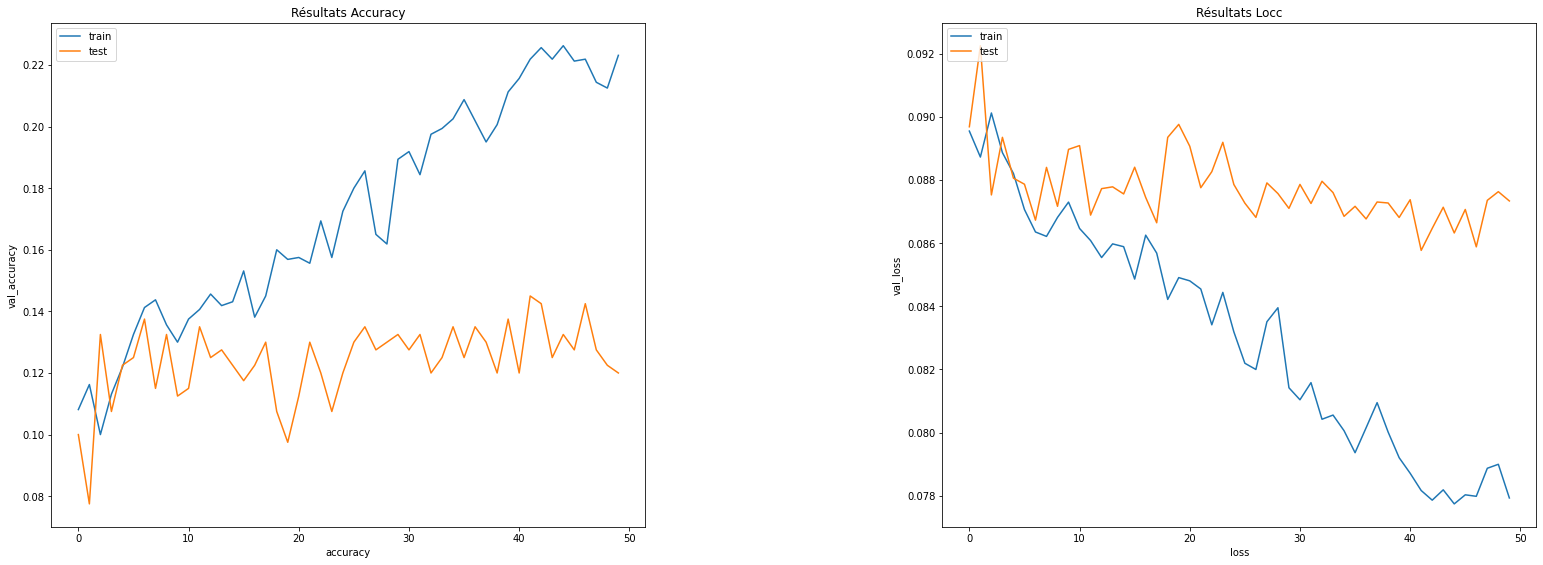

In [ ]:
## Evaluation du modèle

graphique_resultats(recherche_modele_3[2])

In [ ]:
## Evaluation du modèle

evaluation_model_3 = evaluation_model(recherche_modele_3[1])

print('Loss sur le jeu d\'entrainement: %.2f' % (evaluation_model_3[0]))
print('Accuracy sur le jeu d\'entrainement: %.2f' % (evaluation_model_3[1]))
print('------------------------------------------------------------')
print('Locc sur le jeu de test: %.2f' % (evaluation_model_3[2]))
print('Accuracy sur le jeu de test: %.2f' % (evaluation_model_3[3]))

26/26 [==============================] - 7s 254ms/step - loss: 0.0855 - accuracy: 0.1494
Loss sur le jeu d'entrainement: 0.08
Accuracy sur le jeu d'entrainement: 0.19
------------------------------------------------------------
Locc sur le jeu de test: 0.09
Accuracy sur le jeu de test: 0.15


In [ ]:
tab_resulats_CNN.loc[3] = ['Modele_3', nb_blocs, nb_couches_conv, nb_couches_fully] + evaluation_model_3[4]
tab_resulats_CNN

Nom Nombre_blocs  ...  Loss_test Temps_calcul_test
0  Modele_0            1  ...   4.545770          3.537774
1  Modele_1            3  ...  13.105293         21.329389
2  Modele_2            5  ...   7.499770          5.975756
3  Modele_3            7  ...   0.085513         11.148842

[4 rows x 10 columns]

## Choix du nombre de couches de Convolution et de correction ReLu

Les résultats précédents montrent que le nombre optimal de blocs de Convolution est 5. Il est également possible de comparer un modèle contenant 2 couches de Convolution et de correction ReLu suivi de la couche de Pooling au modèle de base qui n'en contenait qu'une seule.

In [ ]:
## Paramètres du modèle

nb_blocs = 5
nb_couches_fully = 2

In [ ]:
## Modèle 3 : Choix du nombre de couches de Convolution et de correction ReLu

def creation_modele_choix_couches_conv(hp):
  ## Création de la base convolutive
  model = Sequential()
  model.add(Conv2D(
      filters=hp.Choice('filter_1', values = [32, 64, 128]),
      kernel_size=hp.Choice('kernel_1', values = [3, 5]),
      padding = 'same',
      activation='relu',
      input_shape=(224, 224, 3)
      )
  )
  for j in range(2, nb_couches_conv+1):
    model.add(Conv2D(
        filters=hp.Choice('filter_'+str(j), values = [64, 128]),
        kernel_size=hp.Choice('kernel_'+str(j), values = [3, 5]),
        padding = 'same',
        activation='relu'
        )
    )
  model.add(MaxPooling2D(
      pool_size=hp.Choice('size_1', values = [2, 3]),
      strides=(2,2)
      )
  )

  ## Choix du nombre de couches de Convolution
  numero = nb_couches_conv+1
  for i in range(2, nb_blocs+1):
    for j in range(1, nb_couches_conv+1):
      model.add(Conv2D(
          filters=hp.Choice('filter_'+str(numero), values = [64, 128, 256]),
          kernel_size=hp.Choice('kernel_'+str(numero), values = [3, 5]),
          padding = 'same',
          activation='relu'
          )
      )
      numero = numero+1
    model.add(MaxPooling2D(
        pool_size=hp.Choice('size_'+str(i), values = [2, 3]),
        strides=(2,2)
        )
    )

  ## Ajout de la couche fully-connected
  model.add(Flatten())
  model.add(Dense(
      units=hp.Choice('units_1', values=[32, 64, 128]),
      activation='relu'
      )
  )
  model.add(Dense(nb_classes, activation='softmax'))

  ## Implémentation du modèle  
  model.compile(optimizer=keras.optimizers.Adam(hp.Choice('learning_rate', values=[0.1, 0.01, 0.001, 0.0001])),
              loss=hp.Choice('Loss', values=['mean_absolute_error', 'categorical_crossentropy']),
              metrics=['accuracy'])

  return model

### Recherche des hyperparamètres optimaux pour chaque architecture de modèle

In [ ]:
## Choix de 2 couches de Convolution : Résultats de la recherche 

nb_couches_conv = 2
recherche_modele_4 = recherche_hyperparametres_optimaux(creation_modele_choix_couches_conv)

Trial 10 Complete [00h 04m 21s]
val_accuracy: 0.09000000357627869

Best val_accuracy So Far: 0.0925000011920929
Total elapsed time: 00h 47m 46s
INFO:tensorflow:Oracle triggered exit
Epoch 1/50
25/25 [==============================] - 23s 869ms/step - loss: 0.0944 - accuracy: 0.0556 - val_loss: 0.0950 - val_accuracy: 0.0500
Epoch 2/50
25/25 [==============================] - 21s 858ms/step - loss: 0.0950 - accuracy: 0.0500 - val_loss: 0.0950 - val_accuracy: 0.0500
Epoch 3/50
25/25 [==============================] - 21s 859ms/step - loss: 0.0950 - accuracy: 0.0500 - val_loss: 0.0950 - val_accuracy: 0.0500
Epoch 4/50
25/25 [==============================] - 21s 859ms/step - loss: 0.0950 - accuracy: 0.0500 - val_loss: 0.0950 - val_accuracy: 0.0500
Epoch 5/50
25/25 [==============================] - 21s 858ms/step - loss: 0.0950 - accuracy: 0.0500 - val_loss: 0.0950 - val_accuracy: 0.0500
Epoch 6/50
25/25 [==============================] - 21s 858ms/step - loss: 0.0950 - accuracy: 0.0500 - 

In [ ]:
## Espace de recherche

recherche_modele_4[0].search_space_summary()

Search space summary
Default search space size: 28
filter_1 (Choice)
{'default': 32, 'conditions': [], 'values': [32, 64, 128], 'ordered': True}
kernel_1 (Choice)
{'default': 3, 'conditions': [], 'values': [3, 5], 'ordered': True}
filter_2 (Choice)
{'default': 64, 'conditions': [], 'values': [64, 128], 'ordered': True}
kernel_2 (Choice)
{'default': 3, 'conditions': [], 'values': [3, 5], 'ordered': True}
size_1 (Choice)
{'default': 2, 'conditions': [], 'values': [2, 3], 'ordered': True}
filter_3 (Choice)
{'default': 64, 'conditions': [], 'values': [64, 128, 256], 'ordered': True}
kernel_3 (Choice)
{'default': 3, 'conditions': [], 'values': [3, 5], 'ordered': True}
filter_4 (Choice)
{'default': 64, 'conditions': [], 'values': [64, 128, 256], 'ordered': True}
kernel_4 (Choice)
{'default': 3, 'conditions': [], 'values': [3, 5], 'ordered': True}
size_2 (Choice)
{'default': 2, 'conditions': [], 'values': [2, 3], 'ordered': True}
filter_5 (Choice)
{'default': 64, 'conditions': [], 'values': [

In [ ]:
recherche_modele_4[1].summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 224, 224, 32)      2432      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 224, 224, 64)      51264     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 64)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 112, 112, 128)     204928    
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 112, 112, 64)      73792     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 56, 56, 64)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 56, 56, 256)       4

In [ ]:
## Hyperparamètres optimaux

recherche_modele_4[3].results_summary()

Results summary
Results in ./untitled_project
Showing 10 best trials
Objective(name='val_accuracy', direction='max')
Trial summary
Hyperparameters:
filter_1: 32
kernel_1: 5
filter_2: 64
kernel_2: 5
size_1: 2
filter_3: 128
kernel_3: 5
filter_4: 64
kernel_4: 3
size_2: 2
filter_5: 256
kernel_5: 5
filter_6: 64
kernel_6: 3
size_3: 3
filter_7: 256
kernel_7: 3
filter_8: 128
kernel_8: 5
size_4: 2
filter_9: 64
kernel_9: 3
filter_10: 256
kernel_10: 5
size_5: 2
units_1: 64
learning_rate: 0.0001
Loss: mean_absolute_error
Score: 0.0925000011920929
Trial summary
Hyperparameters:
filter_1: 32
kernel_1: 5
filter_2: 64
kernel_2: 5
size_1: 2
filter_3: 128
kernel_3: 5
filter_4: 64
kernel_4: 3
size_2: 2
filter_5: 256
kernel_5: 5
filter_6: 64
kernel_6: 3
size_3: 3
filter_7: 256
kernel_7: 3
filter_8: 128
kernel_8: 5
size_4: 2
filter_9: 64
kernel_9: 3
filter_10: 256
kernel_10: 5
size_5: 2
units_1: 64
learning_rate: 0.0001
Loss: mean_absolute_error
Score: 0.09000000357627869
Trial summary
Hyperparameters:
fil

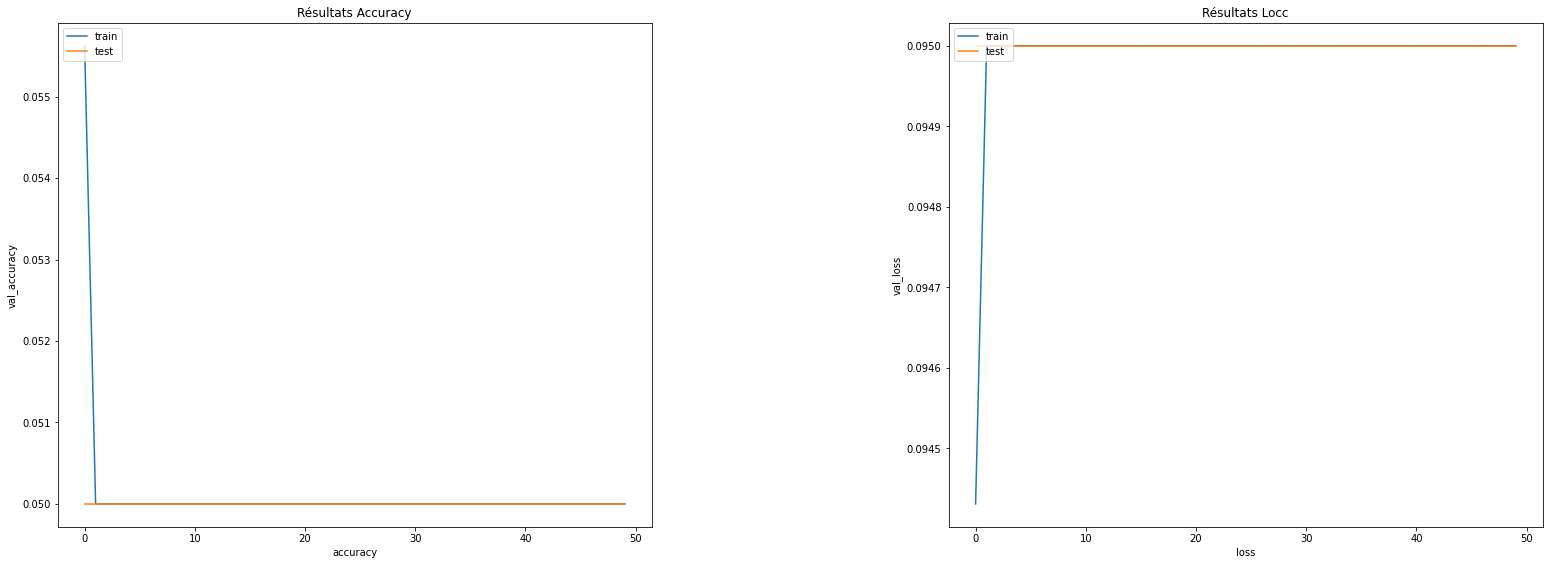

In [ ]:
## Evaluation du modèle

graphique_resultats(recherche_modele_4[2])

In [ ]:
## Evaluation du modèle

evaluation_model_4 = evaluation_model(recherche_modele_4[1])

print('Loss sur le jeu d\'entrainement: %.2f' % (evaluation_model_4[0]))
print('Accuracy sur le jeu d\'entrainement: %.2f' % (evaluation_model_4[1]))
print('------------------------------------------------------------')
print('Locc sur le jeu de test: %.2f' % (evaluation_model_4[2]))
print('Accuracy sur le jeu de test: %.2f' % (evaluation_model_4[3]))

26/26 [==============================] - 14s 534ms/step - loss: 0.0907 - accuracy: 0.0931
Loss sur le jeu d'entrainement: 0.09
Accuracy sur le jeu d'entrainement: 0.05
------------------------------------------------------------
Locc sur le jeu de test: 0.09
Accuracy sur le jeu de test: 0.09


In [ ]:
tab_resulats_CNN.loc[4] = ['Modele_4', nb_blocs, nb_couches_conv, nb_couches_fully] + evaluation_model_4[4]
tab_resulats_CNN

Nom Nombre_blocs  ...  Loss_test Temps_calcul_test
0  Modele_0            1  ...   4.545770          3.537774
1  Modele_1            3  ...  13.105293         21.329389
2  Modele_2            5  ...   7.499770          5.975756
3  Modele_3            7  ...   0.085513         11.148842
4  Modele_4            5  ...   0.090692         21.267311

[5 rows x 10 columns]

## Choix du nombre de couches Fully-connected

Les résultats précédents que le bloc de Convolution optimal est composé de 5 blocs d'une couche de Convolution et de correction ReLu chacun. Il est également possible de tester si le nombre de couches Fully-connected peut onfluencer les résultats (ce nombre variant de 3, 4 et 8 couches)

In [ ]:
## Paramètres du modèle

nb_blocs = 5
nb_couches_conv = 1

In [ ]:
## Modèle 4 : Choix du nombre de couches Fully-connected

def creation_modele_choix_couches_fully(hp):
  ## Création de la base convolutive
  model = Sequential()
  model.add(Conv2D(
      filters=hp.Choice('filter_1', values = [32, 64, 128]),
      kernel_size=hp.Choice('kernel_1', values = [3, 5]),
      padding = 'same',
      activation='relu',
      input_shape=(224, 224, 3)
      )
  )
  model.add(MaxPooling2D(
      pool_size=hp.Choice('size_1', values = [2, 3]),
      strides=(2,2)
      )
  )

  ## Choix du nombre de blocs
  for i in range(2, nb_blocs+1):
    model.add(Conv2D(
        filters=hp.Choice('filter_'+str(i), values = [32, 64, 128, 256, 512]),
        kernel_size=hp.Choice('kernel_'+str(i), values = [3, 5]),
        padding = 'same',
        activation='relu'
        )
    )
    model.add(MaxPooling2D(
        pool_size=hp.Choice('size_'+str(i), values = [2, 3]),
        strides=(2,2)
        )
    )

  ## Ajout de la couche fully-connected
  model.add(Flatten())
  for j in range(1, nb_couches_fully):
    model.add(Dense(
        units=hp.Choice('units_'+str(j),values = [32, 64, 128, 512, 1024]),
        activation='relu'
        )
    )
  model.add(Dense(nb_classes, activation='softmax'))

  ## Implémentation du modèle  
  model.compile(optimizer=keras.optimizers.Adam(hp.Choice('learning_rate', values=[0.1, 0.01, 0.001, 0.0001])),
              loss=hp.Choice('Loss', values=['mean_absolute_error', 'categorical_crossentropy']),
              metrics=['accuracy'])

  return model

### Recherche des hyperparamètres optimaux pour chaque architecture de modèle

In [ ]:
## Choix de 2 couches Fully-connected : Résultats de la recherche 

nb_couches_fully = 3
recherche_modele_5 = recherche_hyperparametres_optimaux(creation_modele_choix_couches_fully)

Trial 10 Complete [00h 02m 42s]
val_accuracy: 0.07249999791383743

Best val_accuracy So Far: 0.11749999970197678
Total elapsed time: 00h 41m 41s
INFO:tensorflow:Oracle triggered exit
Epoch 1/50
25/25 [==============================] - 16s 615ms/step - loss: 0.0898 - accuracy: 0.1044 - val_loss: 0.0907 - val_accuracy: 0.0875
Epoch 2/50
25/25 [==============================] - 15s 605ms/step - loss: 0.0893 - accuracy: 0.1094 - val_loss: 0.0892 - val_accuracy: 0.1100
Epoch 3/50
25/25 [==============================] - 15s 604ms/step - loss: 0.0886 - accuracy: 0.1131 - val_loss: 0.0896 - val_accuracy: 0.1025
Epoch 4/50
25/25 [==============================] - 15s 605ms/step - loss: 0.0867 - accuracy: 0.1363 - val_loss: 0.0887 - val_accuracy: 0.1125
Epoch 5/50
25/25 [==============================] - 15s 604ms/step - loss: 0.0864 - accuracy: 0.1406 - val_loss: 0.0887 - val_accuracy: 0.1125
Epoch 6/50
25/25 [==============================] - 15s 607ms/step - loss: 0.0861 - accuracy: 0.1394 -

In [ ]:
## Espace de recherche

recherche_modele_5[0].search_space_summary()

Search space summary
Default search space size: 19
filter_1 (Choice)
{'default': 32, 'conditions': [], 'values': [32, 64, 128], 'ordered': True}
kernel_1 (Choice)
{'default': 3, 'conditions': [], 'values': [3, 5], 'ordered': True}
size_1 (Choice)
{'default': 2, 'conditions': [], 'values': [2, 3], 'ordered': True}
filter_2 (Choice)
{'default': 32, 'conditions': [], 'values': [32, 64, 128, 256, 512], 'ordered': True}
kernel_2 (Choice)
{'default': 3, 'conditions': [], 'values': [3, 5], 'ordered': True}
size_2 (Choice)
{'default': 2, 'conditions': [], 'values': [2, 3], 'ordered': True}
filter_3 (Choice)
{'default': 32, 'conditions': [], 'values': [32, 64, 128, 256, 512], 'ordered': True}
kernel_3 (Choice)
{'default': 3, 'conditions': [], 'values': [3, 5], 'ordered': True}
size_3 (Choice)
{'default': 2, 'conditions': [], 'values': [2, 3], 'ordered': True}
filter_4 (Choice)
{'default': 32, 'conditions': [], 'values': [32, 64, 128, 256, 512], 'ordered': True}
kernel_4 (Choice)
{'default': 3, 

In [ ]:
recherche_modele_5[1].summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 224, 224, 128)     3584      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 111, 111, 128)     0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 111, 111, 128)     409728    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 55, 55, 128)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 55, 55, 32)        102432    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 27, 27, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 27, 27, 512)       1

In [ ]:
## Hyperparamètres optimaux

recherche_modele_5[3].results_summary()

Results summary
Results in ./untitled_project
Showing 10 best trials
Objective(name='val_accuracy', direction='max')
Trial summary
Hyperparameters:
filter_1: 128
kernel_1: 3
size_1: 3
filter_2: 128
kernel_2: 5
size_2: 3
filter_3: 32
kernel_3: 5
size_3: 2
filter_4: 512
kernel_4: 3
size_4: 2
filter_5: 32
kernel_5: 3
size_5: 3
units_1: 1024
units_2: 64
learning_rate: 0.0001
Loss: mean_absolute_error
Score: 0.11749999970197678
Trial summary
Hyperparameters:
filter_1: 128
kernel_1: 3
size_1: 3
filter_2: 256
kernel_2: 5
size_2: 3
filter_3: 64
kernel_3: 5
size_3: 2
filter_4: 256
kernel_4: 3
size_4: 2
filter_5: 32
kernel_5: 3
size_5: 3
units_1: 512
units_2: 128
learning_rate: 0.0001
Loss: mean_absolute_error
Score: 0.08749999850988388
Trial summary
Hyperparameters:
filter_1: 128
kernel_1: 3
size_1: 3
filter_2: 128
kernel_2: 5
size_2: 3
filter_3: 32
kernel_3: 5
size_3: 2
filter_4: 512
kernel_4: 3
size_4: 2
filter_5: 32
kernel_5: 3
size_5: 3
units_1: 1024
units_2: 1024
learning_rate: 0.0001
Loss

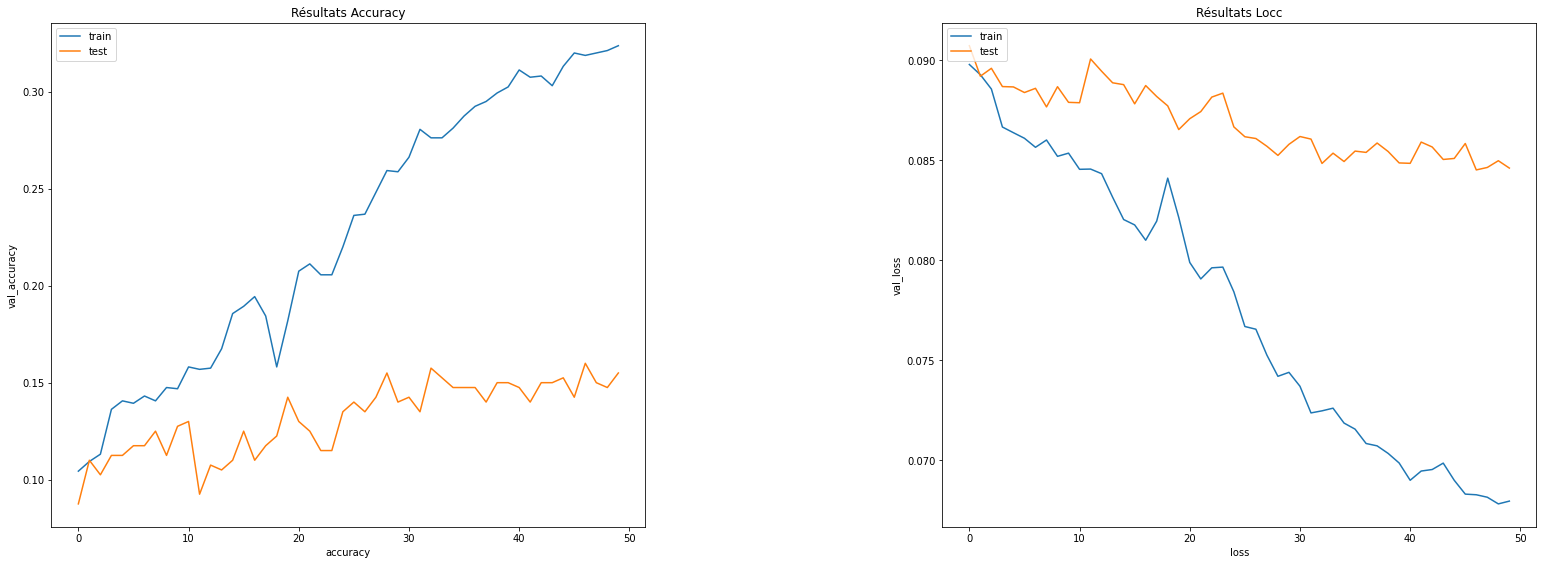

In [ ]:
## Evaluation du modèle

graphique_resultats(recherche_modele_5[2])

In [ ]:
## Evaluation du modèle

evaluation_model_5 = evaluation_model(recherche_modele_5[1])

print('Loss sur le jeu d\'entrainement: %.2f' % (evaluation_model_5[0]))
print('Accuracy sur le jeu d\'entrainement: %.2f' % (evaluation_model_5[1]))
print('------------------------------------------------------------')
print('Locc sur le jeu de test: %.2f' % (evaluation_model_5[2]))
print('Accuracy sur le jeu de test: %.2f' % (evaluation_model_5[3]))

26/26 [==============================] - 5s 190ms/step - loss: 0.0854 - accuracy: 0.1470
Loss sur le jeu d'entrainement: 0.07
Accuracy sur le jeu d'entrainement: 0.29
------------------------------------------------------------
Locc sur le jeu de test: 0.09
Accuracy sur le jeu de test: 0.15


In [ ]:
tab_resulats_CNN.loc[5] = ['Modele_5', nb_blocs, nb_couches_conv, nb_couches_fully] + evaluation_model_5[4]
tab_resulats_CNN

Nom Nombre_blocs  ...  Loss_test Temps_calcul_test
0  Modele_0            1  ...   4.545770          3.537774
1  Modele_1            3  ...  13.105293         21.329389
2  Modele_2            5  ...   7.499770          5.975756
3  Modele_3            7  ...   0.085513         11.148842
4  Modele_4            5  ...   0.090692         21.267311
5  Modele_5            5  ...   0.085429          5.914407

[6 rows x 10 columns]

In [ ]:
## Choix de 4 couches Fully-connected : Résultats de la recherche 

nb_couches_fully = 4
recherche_modele_6 = recherche_hyperparametres_optimaux(creation_modele_choix_couches_fully)

Trial 10 Complete [00h 03m 31s]
val_accuracy: 0.08749999850988388

Best val_accuracy So Far: 0.10249999910593033
Total elapsed time: 00h 50m 39s
INFO:tensorflow:Oracle triggered exit
Epoch 1/50
25/25 [==============================] - 38s 1s/step - loss: 0.0902 - accuracy: 0.0981 - val_loss: 0.0900 - val_accuracy: 0.1025
Epoch 2/50
25/25 [==============================] - 37s 1s/step - loss: 0.0898 - accuracy: 0.1025 - val_loss: 0.0924 - val_accuracy: 0.0750
Epoch 3/50
25/25 [==============================] - 37s 1s/step - loss: 0.0899 - accuracy: 0.1006 - val_loss: 0.0906 - val_accuracy: 0.0950
Epoch 4/50
25/25 [==============================] - 37s 1s/step - loss: 0.0895 - accuracy: 0.1031 - val_loss: 0.0915 - val_accuracy: 0.0850
Epoch 5/50
25/25 [==============================] - 37s 1s/step - loss: 0.0896 - accuracy: 0.1056 - val_loss: 0.0907 - val_accuracy: 0.0950
Epoch 6/50
25/25 [==============================] - 37s 1s/step - loss: 0.0890 - accuracy: 0.1112 - val_loss: 0.0908 

In [ ]:
## Espace de recherche

recherche_modele_6[0].search_space_summary()

Search space summary
Default search space size: 20
filter_1 (Choice)
{'default': 32, 'conditions': [], 'values': [32, 64, 128], 'ordered': True}
kernel_1 (Choice)
{'default': 3, 'conditions': [], 'values': [3, 5], 'ordered': True}
size_1 (Choice)
{'default': 2, 'conditions': [], 'values': [2, 3], 'ordered': True}
filter_2 (Choice)
{'default': 32, 'conditions': [], 'values': [32, 64, 128, 256, 512], 'ordered': True}
kernel_2 (Choice)
{'default': 3, 'conditions': [], 'values': [3, 5], 'ordered': True}
size_2 (Choice)
{'default': 2, 'conditions': [], 'values': [2, 3], 'ordered': True}
filter_3 (Choice)
{'default': 32, 'conditions': [], 'values': [32, 64, 128, 256, 512], 'ordered': True}
kernel_3 (Choice)
{'default': 3, 'conditions': [], 'values': [3, 5], 'ordered': True}
size_3 (Choice)
{'default': 2, 'conditions': [], 'values': [2, 3], 'ordered': True}
filter_4 (Choice)
{'default': 32, 'conditions': [], 'values': [32, 64, 128, 256, 512], 'ordered': True}
kernel_4 (Choice)
{'default': 3, 

In [ ]:
recherche_modele_6[1].summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 224, 224, 32)      2432      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 112, 112, 512)     410112    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 55, 55, 512)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 55, 55, 512)       6554112   
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 27, 27, 512)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 27, 27, 32)        1

In [ ]:
## Hyperparamètres optimaux

recherche_modele_6[3].results_summary()

Results summary
Results in ./untitled_project
Showing 10 best trials
Objective(name='val_accuracy', direction='max')
Trial summary
Hyperparameters:
filter_1: 32
kernel_1: 5
size_1: 2
filter_2: 512
kernel_2: 5
size_2: 3
filter_3: 512
kernel_3: 5
size_3: 2
filter_4: 32
kernel_4: 3
size_4: 2
filter_5: 32
kernel_5: 3
size_5: 2
units_1: 1024
units_2: 1024
units_3: 32
learning_rate: 0.0001
Loss: mean_absolute_error
Score: 0.10249999910593033
Trial summary
Hyperparameters:
filter_1: 32
kernel_1: 5
size_1: 2
filter_2: 128
kernel_2: 5
size_2: 3
filter_3: 512
kernel_3: 5
size_3: 2
filter_4: 32
kernel_4: 3
size_4: 2
filter_5: 32
kernel_5: 3
size_5: 2
units_1: 1024
units_2: 1024
units_3: 32
learning_rate: 0.0001
Loss: mean_absolute_error
Score: 0.0925000011920929
Trial summary
Hyperparameters:
filter_1: 32
kernel_1: 5
size_1: 2
filter_2: 256
kernel_2: 5
size_2: 3
filter_3: 512
kernel_3: 5
size_3: 2
filter_4: 32
kernel_4: 3
size_4: 2
filter_5: 32
kernel_5: 3
size_5: 2
units_1: 1024
units_2: 1024
un

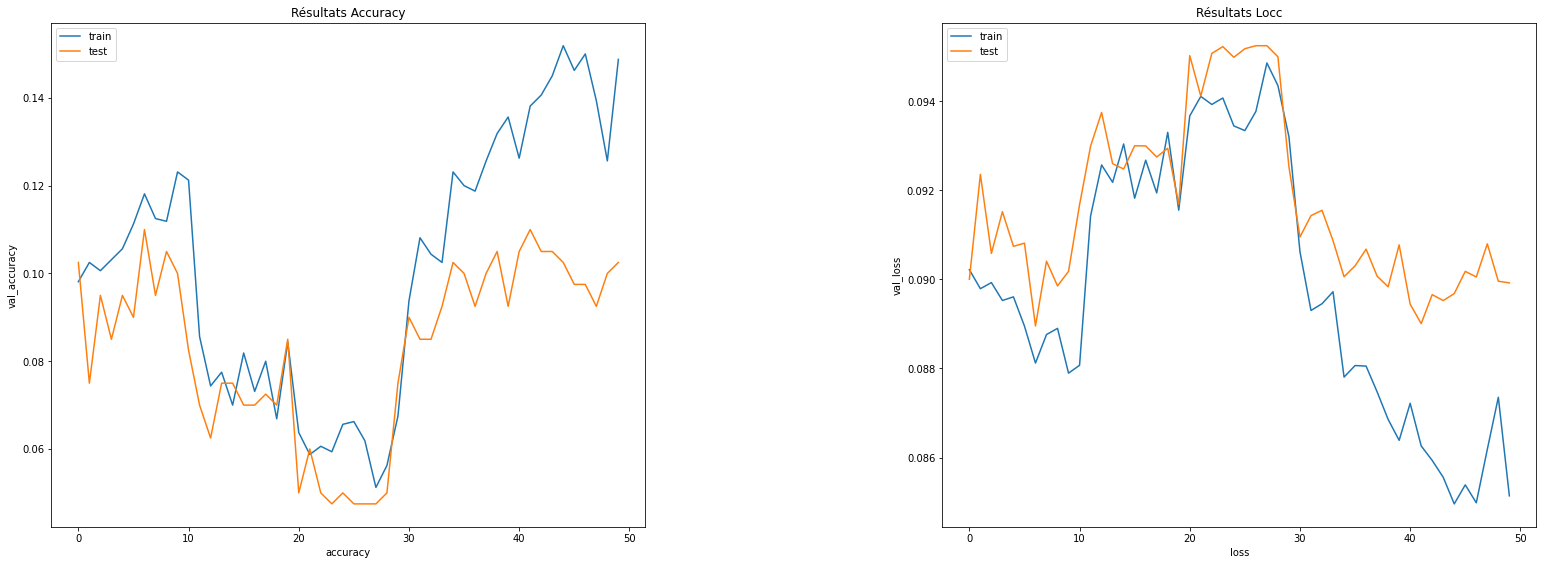

In [ ]:
## Evaluation du modèle

graphique_resultats(recherche_modele_6[2])

In [ ]:
## Evaluation du modèle

evaluation_model_6 = evaluation_model(recherche_modele_6[1])

print('Loss sur le jeu d\'entrainement: %.2f' % (evaluation_model_6[0]))
print('Accuracy sur le jeu d\'entrainement: %.2f' % (evaluation_model_6[1]))
print('------------------------------------------------------------')
print('Locc sur le jeu de test: %.2f' % (evaluation_model_6[2]))
print('Accuracy sur le jeu de test: %.2f' % (evaluation_model_6[3]))

26/26 [==============================] - 16s 606ms/step - loss: 8.8999 - accuracy: 0.0067
Loss sur le jeu d'entrainement: 9.45
Accuracy sur le jeu d'entrainement: 0.01
------------------------------------------------------------
Locc sur le jeu de test: 8.90
Accuracy sur le jeu de test: 0.01


In [ ]:
tab_resulats_CNN.loc[6] = ['Modele_6', nb_blocs, nb_couches_conv, nb_couches_fully] + evaluation_model_6[4]
tab_resulats_CNN

Nom Nombre_blocs  ...  Loss_test Temps_calcul_test
0  Modele_0            1  ...   4.545770          3.537774
1  Modele_1            3  ...  13.105293         21.329389
2  Modele_2            5  ...   7.499770          5.975756
3  Modele_3            7  ...   0.085513         11.148842
4  Modele_4            5  ...   0.090692         21.267311
5  Modele_5            5  ...   0.085429          5.914407
6  Modele_6            5  ...   8.899907         21.392492

[7 rows x 10 columns]

In [ ]:
## Choix de 8 couches Fully-connected : Résultats de la recherche 

nb_couches_fully = 8
recherche_modele_7 = recherche_hyperparametres_optimaux(creation_modele_choix_couches_fully)

Trial 10 Complete [00h 01m 26s]
val_accuracy: 0.07750000059604645

Best val_accuracy So Far: 0.1574999988079071
Total elapsed time: 00h 21m 47s
INFO:tensorflow:Oracle triggered exit
Epoch 1/50
25/25 [==============================] - 5s 179ms/step - loss: 2.6135 - accuracy: 0.1713 - val_loss: 2.7366 - val_accuracy: 0.1275
Epoch 2/50
25/25 [==============================] - 4s 166ms/step - loss: 2.5786 - accuracy: 0.1988 - val_loss: 2.7224 - val_accuracy: 0.1450
Epoch 3/50
25/25 [==============================] - 4s 165ms/step - loss: 2.5392 - accuracy: 0.1981 - val_loss: 2.7109 - val_accuracy: 0.1375
Epoch 4/50
25/25 [==============================] - 4s 165ms/step - loss: 2.5744 - accuracy: 0.2025 - val_loss: 2.7276 - val_accuracy: 0.1300
Epoch 5/50
25/25 [==============================] - 4s 165ms/step - loss: 2.5219 - accuracy: 0.2044 - val_loss: 2.7226 - val_accuracy: 0.1525
Epoch 6/50
25/25 [==============================] - 4s 166ms/step - loss: 2.4970 - accuracy: 0.2225 - val_lo

In [ ]:
## Espace de recherche

recherche_modele_7[0].search_space_summary()

Search space summary
Default search space size: 24
filter_1 (Choice)
{'default': 32, 'conditions': [], 'values': [32, 64, 128], 'ordered': True}
kernel_1 (Choice)
{'default': 3, 'conditions': [], 'values': [3, 5], 'ordered': True}
size_1 (Choice)
{'default': 2, 'conditions': [], 'values': [2, 3], 'ordered': True}
filter_2 (Choice)
{'default': 32, 'conditions': [], 'values': [32, 64, 128, 256, 512], 'ordered': True}
kernel_2 (Choice)
{'default': 3, 'conditions': [], 'values': [3, 5], 'ordered': True}
size_2 (Choice)
{'default': 2, 'conditions': [], 'values': [2, 3], 'ordered': True}
filter_3 (Choice)
{'default': 32, 'conditions': [], 'values': [32, 64, 128, 256, 512], 'ordered': True}
kernel_3 (Choice)
{'default': 3, 'conditions': [], 'values': [3, 5], 'ordered': True}
size_3 (Choice)
{'default': 2, 'conditions': [], 'values': [2, 3], 'ordered': True}
filter_4 (Choice)
{'default': 32, 'conditions': [], 'values': [32, 64, 128, 256, 512], 'ordered': True}
kernel_4 (Choice)
{'default': 3, 

In [ ]:
recherche_modele_7[1].summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 224, 224, 32)      2432      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 112, 112, 32)      25632     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 56, 56, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 56, 56, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 27, 27, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 27, 27, 32)        5

In [ ]:
## Hyperparamètres optimaux

recherche_modele_7[3].results_summary()

Results summary
Results in ./untitled_project
Showing 10 best trials
Objective(name='val_accuracy', direction='max')
Trial summary
Hyperparameters:
filter_1: 32
kernel_1: 5
size_1: 2
filter_2: 32
kernel_2: 5
size_2: 2
filter_3: 64
kernel_3: 3
size_3: 3
filter_4: 32
kernel_4: 5
size_4: 3
filter_5: 32
kernel_5: 3
size_5: 3
units_1: 32
units_2: 512
units_3: 32
units_4: 1024
units_5: 64
units_6: 512
units_7: 64
learning_rate: 0.0001
Loss: categorical_crossentropy
Score: 0.1574999988079071
Trial summary
Hyperparameters:
filter_1: 32
kernel_1: 5
size_1: 2
filter_2: 32
kernel_2: 5
size_2: 2
filter_3: 32
kernel_3: 3
size_3: 3
filter_4: 32
kernel_4: 5
size_4: 3
filter_5: 512
kernel_5: 3
size_5: 3
units_1: 32
units_2: 512
units_3: 32
units_4: 1024
units_5: 64
units_6: 1024
units_7: 64
learning_rate: 0.0001
Loss: categorical_crossentropy
Score: 0.1550000011920929
Trial summary
Hyperparameters:
filter_1: 32
kernel_1: 5
size_1: 2
filter_2: 32
kernel_2: 5
size_2: 2
filter_3: 32
kernel_3: 3
size_3: 3

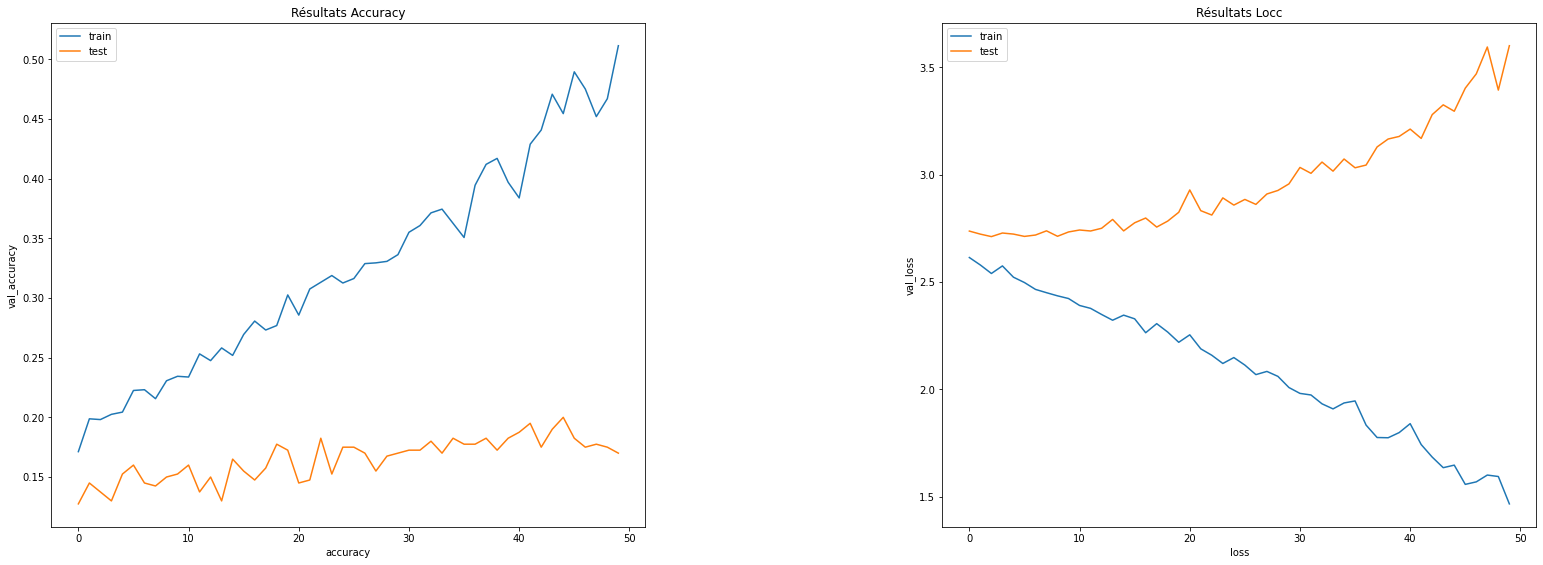

In [ ]:
## Evaluation du modèle

graphique_resultats(recherche_modele_7[2])

In [ ]:
## Evaluation du modèle

evaluation_model_7 = evaluation_model(recherche_modele_7[1])

print('Loss sur le jeu d\'entrainement: %.2f' % (evaluation_model_7[0]))
print('Accuracy sur le jeu d\'entrainement: %.2f' % (evaluation_model_7[1]))
print('------------------------------------------------------------')
print('Locc sur le jeu de test: %.2f' % (evaluation_model_7[2]))
print('Accuracy sur le jeu de test: %.2f' % (evaluation_model_7[3]))

26/26 [==============================] - 2s 82ms/step - loss: 3.6910 - accuracy: 0.1653
Loss sur le jeu d'entrainement: 1.94
Accuracy sur le jeu d'entrainement: 0.42
------------------------------------------------------------
Locc sur le jeu de test: 3.69
Accuracy sur le jeu de test: 0.17


In [ ]:
tab_resulats_CNN.loc[7] = ['Modele_7', nb_blocs, nb_couches_conv, nb_couches_fully] + evaluation_model_7[4]
tab_resulats_CNN

Nom Nombre_blocs  ...  Loss_test Temps_calcul_test
0  Modele_0            1  ...   4.545770          3.537774
1  Modele_1            3  ...  13.105293         21.329389
2  Modele_2            5  ...   7.499770          5.975756
3  Modele_3            7  ...   0.085513         11.148842
4  Modele_4            5  ...   0.090692         21.267311
5  Modele_5            5  ...   0.085429          5.914407
6  Modele_6            5  ...   8.899907         21.392492
7  Modele_7            5  ...   3.690951          3.521533

[8 rows x 10 columns]

## Ajout d'une couche Dropout

Les résultats sont meilleurs en utilisant 2 couches Fully-connected.

In [ ]:
## Paramètres du modèle

nb_blocs = 5
nb_couches_conv = 1
nb_couches_fully = 2

In [ ]:
## Modèle 5 : Ajout d'une couche Dropout

def creation_modele_dropout(hp):
  ## Création de la base convolutive
  model = Sequential()
  model.add(Conv2D(
      filters=hp.Choice('filter_1', values = [32, 64, 128]),
      kernel_size=hp.Choice('kernel_1', values = [3, 5]),
      padding = 'same',
      activation='relu',
      input_shape=(224, 224, 3)
      )
  )
  model.add(MaxPooling2D(
      pool_size=hp.Choice('size_1', values = [2, 3]),
      strides=(2,2)
      )
  )

  ## Choix du nombre de blocs
  for i in range(2, nb_blocs+1):
    model.add(Conv2D(
        filters=hp.Choice('filter_'+str(i), values = [32, 64, 128, 256, 512]),
        kernel_size=hp.Choice('kernel_'+str(i), values = [3, 5]),
        padding = 'same',
        activation='relu'
        )
    )
    model.add(MaxPooling2D(
        pool_size=hp.Choice('size_'+str(i), values = [2, 3]),
        strides=(2,2)
        )
    )
  
  ## Ajout d'une couche Dropout
  model.add(Dropout(
      rate=hp.Float('dropout_1', min_value=0.0,max_value=0.5, step=0.1)
      )
  )

  ## Ajout de la couche fully-connected
  model.add(Flatten())
  model.add(Dense(
      units=hp.Choice('units_1', values=[32, 64, 128, 512, 1024]),
      activation='relu'
      )
  )
  model.add(Dense(nb_classes, activation='softmax'))

  ## Implémentation du modèle  
  model.compile(optimizer=keras.optimizers.Adam(hp.Choice('learning_rate', values=[0.1, 0.01, 0.001, 0.0001])),
              loss=hp.Choice('Loss', values=['mean_absolute_error', 'categorical_crossentropy']),
              metrics=['accuracy'])

  return model

### Recherche des hyperparamètres optimaux pour chaque architecture de modèle

In [ ]:
## Ajout d'une couche Dropout : Résultats de la recherche 

recherche_modele_8 = recherche_hyperparametres_optimaux(creation_modele_dropout)

Trial 10 Complete [00h 01m 19s]
val_accuracy: 0.1899999976158142

Best val_accuracy So Far: 0.2175000011920929
Total elapsed time: 00h 25m 46s
INFO:tensorflow:Oracle triggered exit
Epoch 1/50
25/25 [==============================] - 5s 186ms/step - loss: 1.1373 - accuracy: 0.6469 - val_loss: 3.3657 - val_accuracy: 0.1900
Epoch 2/50
25/25 [==============================] - 4s 174ms/step - loss: 1.0207 - accuracy: 0.6869 - val_loss: 3.5448 - val_accuracy: 0.1850
Epoch 3/50
25/25 [==============================] - 4s 175ms/step - loss: 0.8880 - accuracy: 0.7312 - val_loss: 3.7193 - val_accuracy: 0.2075
Epoch 4/50
25/25 [==============================] - 4s 172ms/step - loss: 0.7736 - accuracy: 0.7675 - val_loss: 4.0222 - val_accuracy: 0.1775
Epoch 5/50
25/25 [==============================] - 4s 172ms/step - loss: 0.6398 - accuracy: 0.8119 - val_loss: 4.0819 - val_accuracy: 0.1925
Epoch 6/50
25/25 [==============================] - 4s 172ms/step - loss: 0.5506 - accuracy: 0.8413 - val_los

In [ ]:
## Espace de recherche

recherche_modele_8[0].search_space_summary()

Search space summary
Default search space size: 19
filter_1 (Choice)
{'default': 32, 'conditions': [], 'values': [32, 64, 128], 'ordered': True}
kernel_1 (Choice)
{'default': 3, 'conditions': [], 'values': [3, 5], 'ordered': True}
size_1 (Choice)
{'default': 2, 'conditions': [], 'values': [2, 3], 'ordered': True}
filter_2 (Choice)
{'default': 32, 'conditions': [], 'values': [32, 64, 128, 256, 512], 'ordered': True}
kernel_2 (Choice)
{'default': 3, 'conditions': [], 'values': [3, 5], 'ordered': True}
size_2 (Choice)
{'default': 2, 'conditions': [], 'values': [2, 3], 'ordered': True}
filter_3 (Choice)
{'default': 32, 'conditions': [], 'values': [32, 64, 128, 256, 512], 'ordered': True}
kernel_3 (Choice)
{'default': 3, 'conditions': [], 'values': [3, 5], 'ordered': True}
size_3 (Choice)
{'default': 2, 'conditions': [], 'values': [2, 3], 'ordered': True}
filter_4 (Choice)
{'default': 32, 'conditions': [], 'values': [32, 64, 128, 256, 512], 'ordered': True}
kernel_4 (Choice)
{'default': 3, 

In [ ]:
recherche_modele_8[1].summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 224, 224, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 112, 112, 32)      9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 56, 56, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 56, 56, 32)        25632     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 27, 27, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 27, 27, 512)       4

In [ ]:
## Hyperparamètres optimaux

recherche_modele_8[3].results_summary()

Results summary
Results in ./untitled_project
Showing 10 best trials
Objective(name='val_accuracy', direction='max')
Trial summary
Hyperparameters:
filter_1: 32
kernel_1: 3
size_1: 2
filter_2: 32
kernel_2: 3
size_2: 2
filter_3: 32
kernel_3: 5
size_3: 3
filter_4: 512
kernel_4: 5
size_4: 3
filter_5: 32
kernel_5: 5
size_5: 3
dropout_1: 0.0
units_1: 1024
learning_rate: 0.0001
Loss: categorical_crossentropy
Score: 0.2175000011920929
Trial summary
Hyperparameters:
filter_1: 128
kernel_1: 3
size_1: 2
filter_2: 32
kernel_2: 3
size_2: 2
filter_3: 32
kernel_3: 5
size_3: 3
filter_4: 512
kernel_4: 5
size_4: 3
filter_5: 32
kernel_5: 5
size_5: 3
dropout_1: 0.0
units_1: 1024
learning_rate: 0.0001
Loss: categorical_crossentropy
Score: 0.20000000298023224
Trial summary
Hyperparameters:
filter_1: 32
kernel_1: 3
size_1: 2
filter_2: 32
kernel_2: 3
size_2: 2
filter_3: 32
kernel_3: 5
size_3: 3
filter_4: 512
kernel_4: 5
size_4: 3
filter_5: 32
kernel_5: 3
size_5: 3
dropout_1: 0.0
units_1: 1024
learning_rate: 

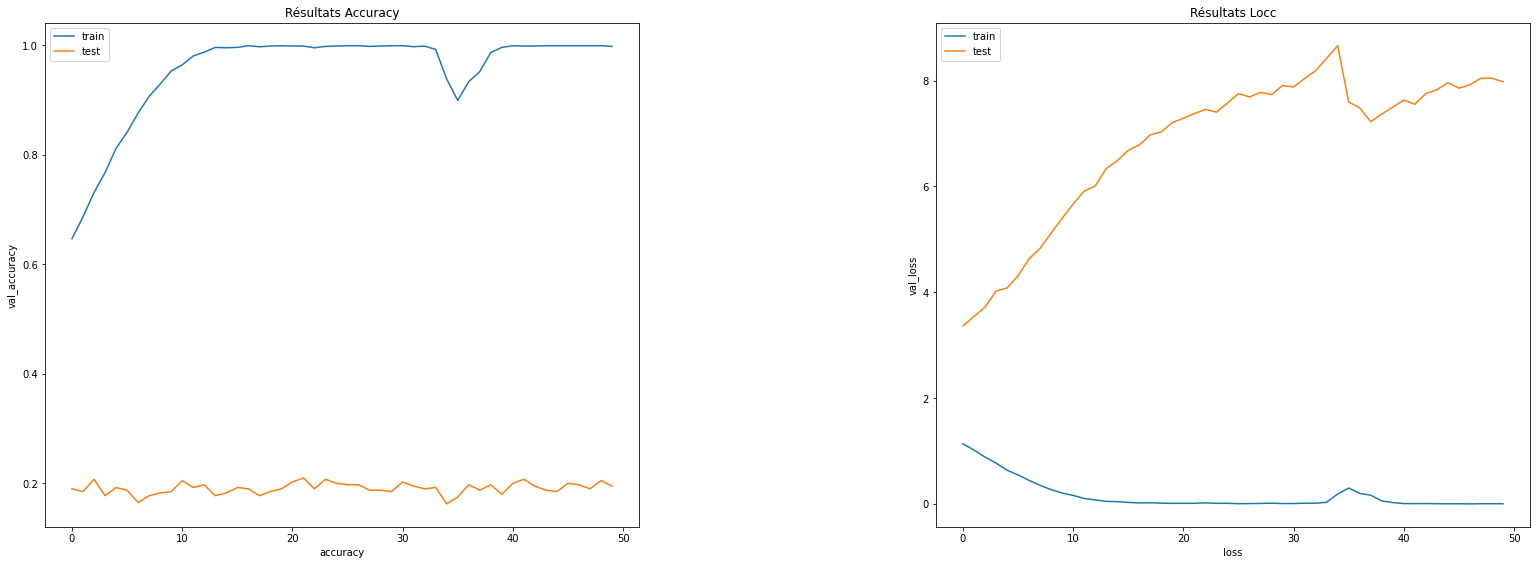

In [ ]:
## Evaluation du modèle

graphique_resultats(recherche_modele_8[2])

In [ ]:
## Evaluation du modèle

evaluation_model_8 = evaluation_model(recherche_modele_8[1])

print('Loss sur le jeu d\'entrainement: %.2f' % (evaluation_model_8[0]))
print('Accuracy sur le jeu d\'entrainement: %.2f' % (evaluation_model_8[1]))
print('------------------------------------------------------------')
print('Locc sur le jeu de test: %.2f' % (evaluation_model_8[2]))
print('Accuracy sur le jeu de test: %.2f' % (evaluation_model_8[3]))

26/26 [==============================] - 2s 58ms/step - loss: 8.3732 - accuracy: 0.1837
Loss sur le jeu d'entrainement: 1.60
Accuracy sur le jeu d'entrainement: 0.84
------------------------------------------------------------
Locc sur le jeu de test: 8.37
Accuracy sur le jeu de test: 0.18


In [ ]:
tab_resulats_CNN.loc[8] = ['Modele_8', nb_blocs, nb_couches_conv, nb_couches_fully] + evaluation_model_8[4]
tab_resulats_CNN

Nom Nombre_blocs  ...  Loss_test Temps_calcul_test
0  Modele_0            1  ...   4.545770          3.537774
1  Modele_1            3  ...  13.105293         21.329389
2  Modele_2            5  ...   7.499770          5.975756
3  Modele_3            7  ...   0.085513         11.148842
4  Modele_4            5  ...   0.090692         21.267311
5  Modele_5            5  ...   0.085429          5.914407
6  Modele_6            5  ...   8.899907         21.392492
7  Modele_7            5  ...   3.690951          3.521533
8  Modele_8            5  ...   8.373165          1.965710

[9 rows x 10 columns]

## Data augmentation

Les résultats obtenus ne sont pas différents en ajoutant une couche Dropout.

In [ ]:
## Data augmentation

data_augmentation = tf.keras.Sequential([
  layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
  layers.experimental.preprocessing.RandomRotation(0.2),
])

image = (X_train_train[3]*255).astype(np.uint8)
image = tf.expand_dims(image, 0)

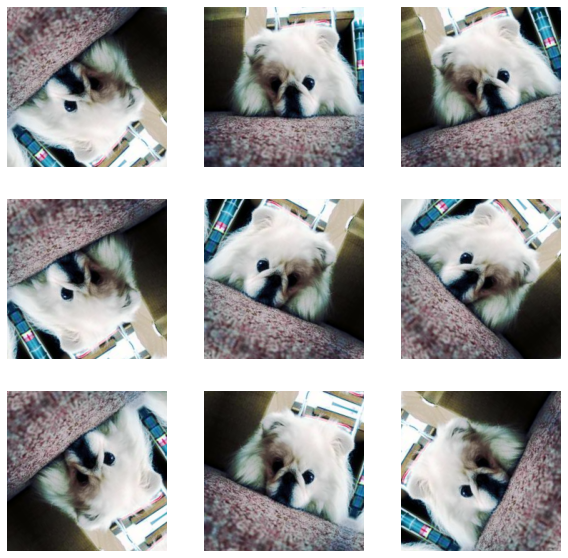

In [ ]:
plt.figure(figsize=(10, 10))
for i in range(9):
  augmented_image = data_augmentation(image)
  ax = plt.subplot(3, 3, i + 1)
  plt.imshow(augmented_image[0])
  plt.axis("off")

In [ ]:
## Paramètres du modèle

nb_blocs = 5
nb_couches_conv = 1
nb_couches_fully = 2

In [ ]:
## Modèle 6 : Data augmentation ## essai 2

import tensorflow as tf
from tensorflow.keras import layers

def creation_modele_data_augmentation(hp):
  ## Création de la base convolutive
  model = Sequential([
                      layers.RandomFlip("horizontal_and_vertical", input_shape=(224, 224, 3)), 
                      layers.RandomRotation(hp.Float('RandomRotation', min_value=0.1,max_value=0.9, step=0.2))
  ])  

  model.add(Conv2D(
      filters=hp.Choice('filter_1', values = [32, 64, 128]),
      kernel_size=hp.Choice('kernel_1', values = [3, 5]),
      padding = 'same',
      activation='relu',
      input_shape=(224, 224, 3)
      )
  )
  model.add(MaxPooling2D(
      pool_size=hp.Choice('size_1', values = [2, 3]),
      strides=(2,2)
      )
  )

  ## Choix du nombre de blocs
  for i in range(2, nb_blocs+1):
    model.add(Conv2D(
        filters=hp.Choice('filter_'+str(i), values = [32, 64, 128, 256, 512]),
        kernel_size=hp.Choice('kernel_'+str(i), values = [3, 5]),
        padding = 'same',
        activation='relu'
        )
    )
    model.add(MaxPooling2D(
        pool_size=hp.Choice('size_'+str(i), values = [2, 3]),
        strides=(2,2)
        )
    )

  ## Ajout de la couche fully-connected
  model.add(Flatten())
  model.add(Dense(
      units=hp.Choice('units_1', values=[32, 64, 128]), 
      activation='relu'
      )
  )
  model.add(Dense(20, activation='softmax'))

  ## Implémentation du modèle  
  model.compile(optimizer=keras.optimizers.Adam(hp.Choice('learning_rate', values=[0.1, 0.01, 0.001, 0.0001])),
              loss=hp.Choice('Loss', values=['mean_absolute_error', 'categorical_crossentropy']),
              metrics=['accuracy'])
  
  return model

### Recherche des hyperparamètres optimaux pour chaque architecture de modèle

In [ ]:
## Data augmentation : Résultats de la recherche 

recherche_modele_9 = recherche_hyperparametres_optimaux(creation_modele_choix_blocs)

Trial 10 Complete [00h 06m 44s]
val_accuracy: 0.16500000655651093

Best val_accuracy So Far: 0.20499999821186066
Total elapsed time: 00h 36m 15s
INFO:tensorflow:Oracle triggered exit
Epoch 1/50
25/25 [==============================] - 14s 539ms/step - loss: 1.7700 - accuracy: 0.4694 - val_loss: 3.0109 - val_accuracy: 0.1950
Epoch 2/50
25/25 [==============================] - 13s 529ms/step - loss: 1.6447 - accuracy: 0.5088 - val_loss: 3.0119 - val_accuracy: 0.2125
Epoch 3/50
25/25 [==============================] - 13s 530ms/step - loss: 1.5285 - accuracy: 0.5406 - val_loss: 3.1194 - val_accuracy: 0.1875
Epoch 4/50
25/25 [==============================] - 13s 530ms/step - loss: 1.3934 - accuracy: 0.5825 - val_loss: 3.1512 - val_accuracy: 0.1950
Epoch 5/50
25/25 [==============================] - 13s 529ms/step - loss: 1.2126 - accuracy: 0.6431 - val_loss: 3.3005 - val_accuracy: 0.1550
Epoch 6/50
25/25 [==============================] - 13s 529ms/step - loss: 1.0560 - accuracy: 0.6988 -

In [ ]:
## Espace de recherche

recherche_modele_9[0].search_space_summary()

Search space summary
Default search space size: 18
filter_1 (Choice)
{'default': 32, 'conditions': [], 'values': [32, 64, 128], 'ordered': True}
kernel_1 (Choice)
{'default': 3, 'conditions': [], 'values': [3, 5], 'ordered': True}
size_1 (Choice)
{'default': 2, 'conditions': [], 'values': [2, 3], 'ordered': True}
filter_2 (Choice)
{'default': 32, 'conditions': [], 'values': [32, 64, 128, 256, 512], 'ordered': True}
kernel_2 (Choice)
{'default': 3, 'conditions': [], 'values': [3, 5], 'ordered': True}
size_2 (Choice)
{'default': 2, 'conditions': [], 'values': [2, 3], 'ordered': True}
filter_3 (Choice)
{'default': 32, 'conditions': [], 'values': [32, 64, 128, 256, 512], 'ordered': True}
kernel_3 (Choice)
{'default': 3, 'conditions': [], 'values': [3, 5], 'ordered': True}
size_3 (Choice)
{'default': 2, 'conditions': [], 'values': [2, 3], 'ordered': True}
filter_4 (Choice)
{'default': 32, 'conditions': [], 'values': [32, 64, 128, 256, 512], 'ordered': True}
kernel_4 (Choice)
{'default': 3, 

In [ ]:
recherche_modele_9[1].summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 224, 224, 64)      1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 111, 111, 64)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 111, 111, 256)     147712    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 55, 55, 256)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 55, 55, 32)        73760     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 27, 27, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 27, 27, 512)       4

In [ ]:
## Hyperparamètres optimaux

recherche_modele_9[3].results_summary()

Results summary
Results in ./untitled_project
Showing 10 best trials
Objective(name='val_accuracy', direction='max')
Trial summary
Hyperparameters:
filter_1: 64
kernel_1: 3
size_1: 3
filter_2: 256
kernel_2: 3
size_2: 3
filter_3: 32
kernel_3: 3
size_3: 2
filter_4: 512
kernel_4: 5
size_4: 2
filter_5: 32
kernel_5: 5
size_5: 2
units_1: 64
learning_rate: 0.0001
Loss: categorical_crossentropy
Score: 0.20499999821186066
Trial summary
Hyperparameters:
filter_1: 64
kernel_1: 3
size_1: 3
filter_2: 512
kernel_2: 3
size_2: 3
filter_3: 32
kernel_3: 3
size_3: 2
filter_4: 512
kernel_4: 5
size_4: 2
filter_5: 32
kernel_5: 5
size_5: 2
units_1: 64
learning_rate: 0.0001
Loss: categorical_crossentropy
Score: 0.1899999976158142
Trial summary
Hyperparameters:
filter_1: 64
kernel_1: 3
size_1: 3
filter_2: 128
kernel_2: 3
size_2: 3
filter_3: 32
kernel_3: 3
size_3: 2
filter_4: 512
kernel_4: 5
size_4: 2
filter_5: 32
kernel_5: 5
size_5: 2
units_1: 128
learning_rate: 0.0001
Loss: categorical_crossentropy
Score: 0.1

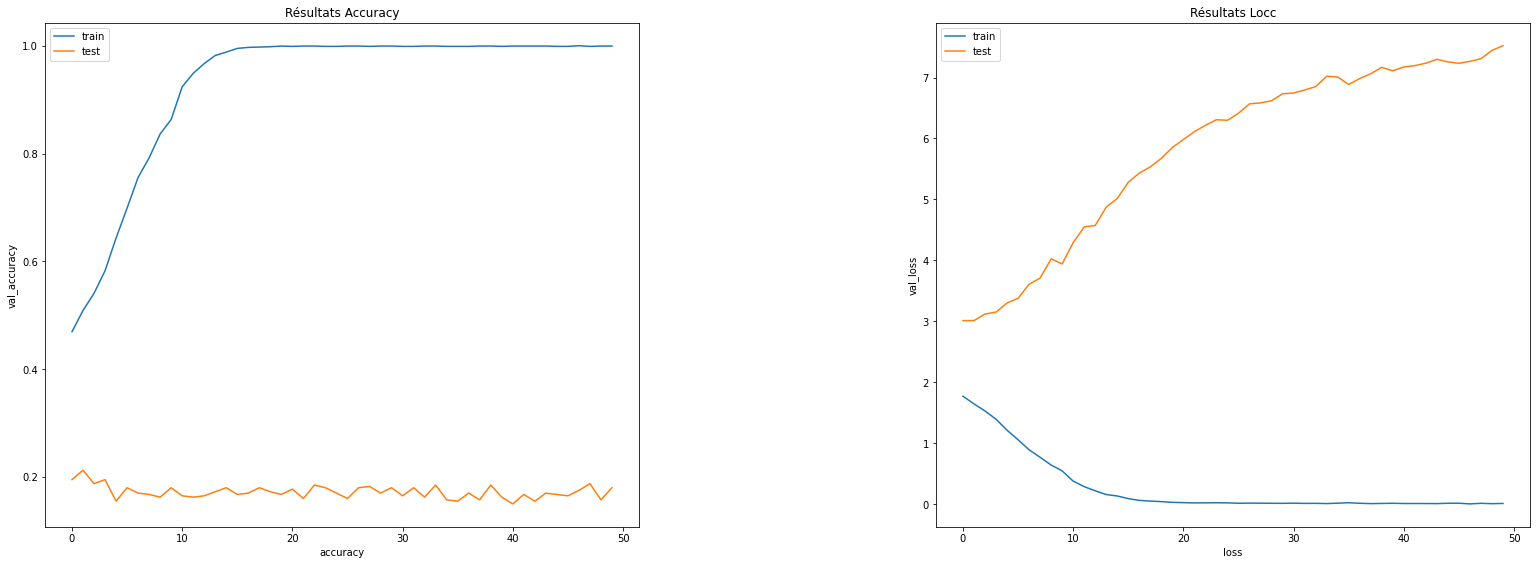

In [ ]:
## Evaluation du modèle

graphique_resultats(recherche_modele_9[2])

In [ ]:
## Evaluation du modèle

evaluation_model_9 = evaluation_model(recherche_modele_9[1])

print('Loss sur le jeu d\'entrainement: %.2f' % (evaluation_model_9[0]))
print('Accuracy sur le jeu d\'entrainement: %.2f' % (evaluation_model_9[1]))
print('------------------------------------------------------------')
print('Locc sur le jeu de test: %.2f' % (evaluation_model_9[2]))
print('Accuracy sur le jeu de test: %.2f' % (evaluation_model_9[3]))

26/26 [==============================] - 7s 255ms/step - loss: 8.0048 - accuracy: 0.1617
Loss sur le jeu d'entrainement: 1.51
Accuracy sur le jeu d'entrainement: 0.84
------------------------------------------------------------
Locc sur le jeu de test: 8.00
Accuracy sur le jeu de test: 0.16


In [ ]:
tab_resulats_CNN.loc[9] = ['Modele_9', nb_blocs, nb_couches_conv, nb_couches_fully] + evaluation_model_9[4]
tab_resulats_CNN

Nom Nombre_blocs  ...  Loss_test Temps_calcul_test
0  Modele_0            1  ...   4.545770          3.537774
1  Modele_1            3  ...  13.105293         21.329389
2  Modele_2            5  ...   7.499770          5.975756
3  Modele_3            7  ...   0.085513         11.148842
4  Modele_4            5  ...   0.090692         21.267311
5  Modele_5            5  ...   0.085429          5.914407
6  Modele_6            5  ...   8.899907         21.392492
7  Modele_7            5  ...   3.690951          3.521533
8  Modele_8            5  ...   8.373165          1.965710
9  Modele_9            5  ...   8.004848          7.096773

[10 rows x 10 columns]

## Comparaison des modèles optimaux

In [ ]:
tab_resulats_CNN

Nom Nombre_blocs  ...  Loss_test Temps_calcul_test
0  Modele_0            1  ...   4.545770          3.537774
1  Modele_1            3  ...  13.105293         21.329389
2  Modele_2            5  ...   7.499770          5.975756
3  Modele_3            7  ...   0.085513         11.148842
4  Modele_4            5  ...   0.090692         21.267311
5  Modele_5            5  ...   0.085429          5.914407
6  Modele_6            5  ...   8.899907         21.392492
7  Modele_7            5  ...   3.690951          3.521533
8  Modele_8            5  ...   8.373165          1.965710
9  Modele_9            5  ...   8.004848          7.096773

[10 rows x 10 columns]

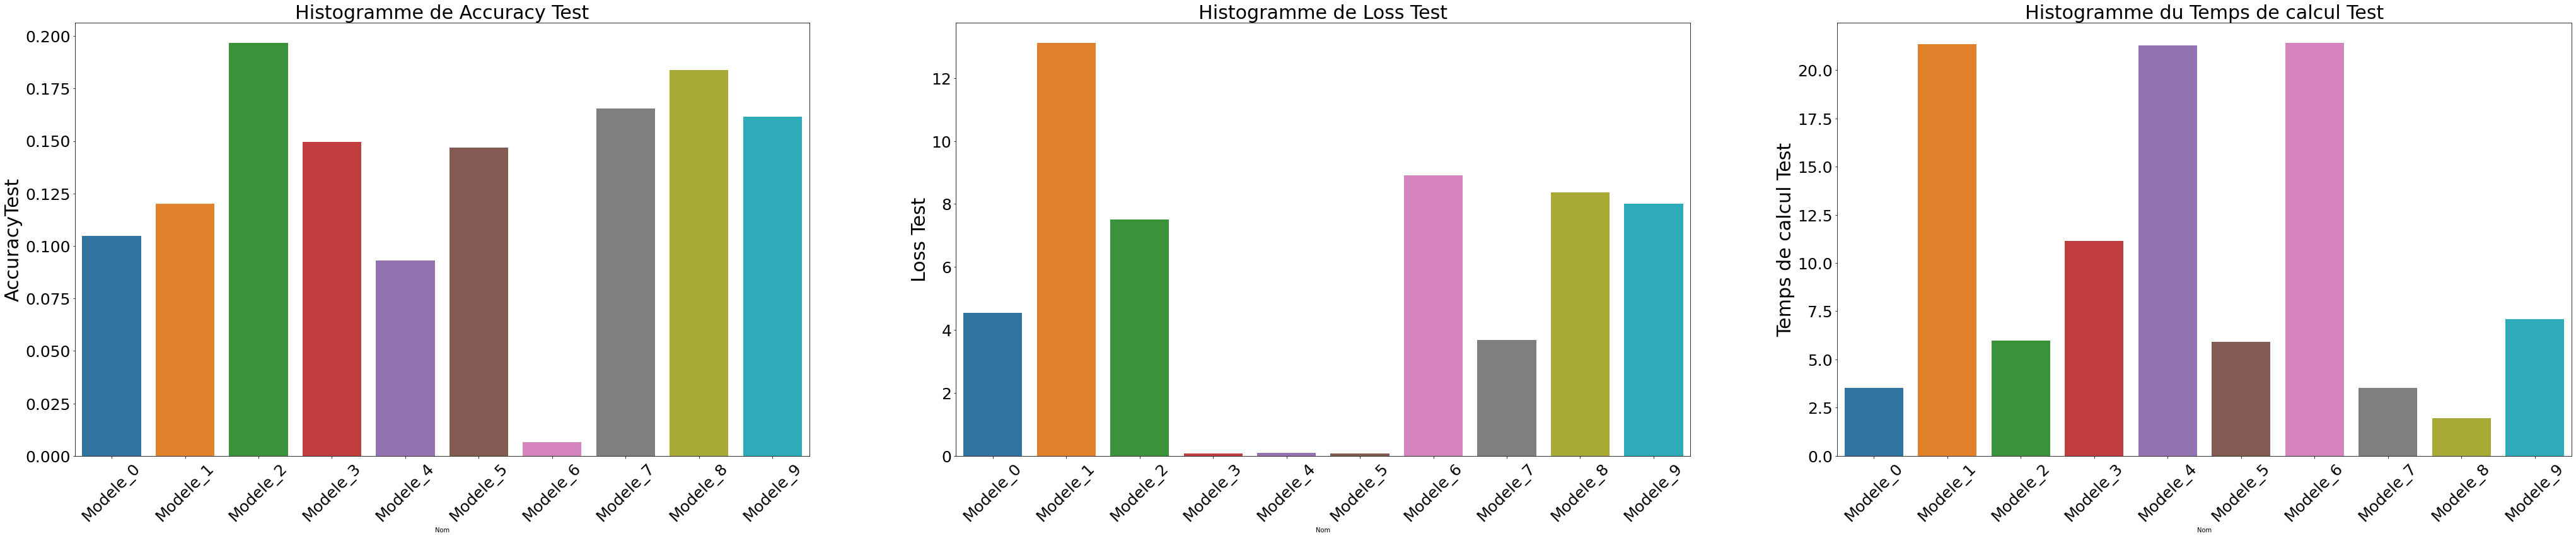

In [ ]:
## Résultats de toutes les architectures testées

plt.figure(1,figsize=(40,30))
plt.gcf().subplots_adjust(left = 0.125, bottom = 0.2, right = 1.5,
                          top = 0.9, wspace = 0.2, hspace = 0.2)

plt.subplot(2,3,1)
sns.barplot(x=tab_resulats_CNN['Nom'],y=tab_resulats_CNN['Accuracy_test'])
plt.tick_params(axis = 'both', labelsize = 25)
plt.xticks(rotation=45)
plt.ylabel("AccuracyTest", fontsize = 30)
plt.title('Histogramme de Accuracy Test', fontsize = 30)

plt.subplot(2,3,2)
sns.barplot(x=tab_resulats_CNN['Nom'],y=tab_resulats_CNN['Loss_test'])
plt.tick_params(axis = 'both', labelsize = 25)
plt.xticks(rotation=45)
plt.ylabel("Loss Test", fontsize = 30)
plt.title('Histogramme de Loss Test', fontsize = 30)

plt.subplot(2,3,3)
sns.barplot(x=tab_resulats_CNN['Nom'],y=tab_resulats_CNN['Temps_calcul_test'])
plt.tick_params(axis = 'both', labelsize = 25)
plt.xticks(rotation=45)
plt.ylabel("Temps de calcul Test", fontsize = 30)
plt.title('Histogramme du Temps de calcul Test', fontsize = 30)

plt.show()

D'après les analyses réallisées, le modèle sélectionné est un CNN composé de 5 blocs de Convolution d'une couche de Convolution chacune, de 2 couches Fully-connected. Il est également possible d'identifier les hyperparamètres epochs et bacth_size otpimaux sur ce modèle.

In [ ]:
## Recherche de l'hyperparamètre epoch optimal

modele_final = recherche_modele_2[2]

val_accuracy_epochs = modele_final.history['val_accuracy']
epoch_optim = val_accuracy_epochs.index(max(val_accuracy_epochs)) + 1

print('Eppoch optimal: %d' % (epoch_optim))

Eppoch optimal: 22


In [ ]:
## Recherche de l'hyperparamètre batch_size optimal entre 10, 20, 32, 40, 60, 80 et 96

best_model_optim = recherche_modele_2[1]

def recherche_batch_size_optim(best_model_optim, batch_size):
  best_model_optim.fit(X_train_train, y_train_train, validation_data=(X_validation, y_validation), epochs=epoch_optim, batch_size=batch_size, verbose=0)
  
  ## Evaluation du modèle 
  start_time = timeit.default_timer()
  test_loss, test_acc = best_model_optim.evaluate(X_test, y_test, batch_size=batch_size, verbose=0)
  elapsed_test = timeit.default_timer() - start_time

  return test_loss, test_acc, elapsed_test

for batch_size in [10, 20, 32, 40, 60, 80, 96]:
  evaluation_model_batch_size = recherche_batch_size_optim(best_model_optim, batch_size)
  print('Pour batch_size =', batch_size, ' : Loss =', evaluation_model_batch_size[0], ', Accuracy =', evaluation_model_batch_size[1], 'et Temps de calcul =', evaluation_model_batch_size[2])

Pour batch_size = 10  : Loss = 8.482884407043457 , Accuracy = 0.14635640382766724 et Temps de calcul = 5.222630371999912
Pour batch_size = 20  : Loss = 8.53268814086914 , Accuracy = 0.1635027527809143 et Temps de calcul = 5.625837206000142
Pour batch_size = 32  : Loss = 8.505252838134766 , Accuracy = 0.1488058716058731 et Temps de calcul = 3.9712779159999627
Pour batch_size = 40  : Loss = 8.405104637145996 , Accuracy = 0.16227801144123077 et Temps de calcul = 5.2683324489998995
Pour batch_size = 60  : Loss = 8.569929122924805 , Accuracy = 0.16227801144123077 et Temps de calcul = 4.144092988999546
Pour batch_size = 80  : Loss = 8.810813903808594 , Accuracy = 0.1616656482219696 et Temps de calcul = 3.0625471690000268
Pour batch_size = 96  : Loss = 10.151811599731445 , Accuracy = 0.1708512008190155 et Temps de calcul = 3.8069268879989977


In [ ]:
batch_size_optimal = 96
epoch_optim = 22

# **Transfer Learning**

Il est également possible de résoudre un problème de classification par l'apprentissage par transfert en utilisant des modèles pré-entraïné comme le réseau VGG16. 

Ce modèle étant déjà pré-entrainé, il est possible de modifier le nombre de couches à ré-entrainer (stratégie extraction de features ou stratégie fine-tuning total).

## Jeux de données et paramètres

In [ ]:
## Création des jeux de données sur 20 races de chiens

images_train = images_train[:2000]
train_labels = train_labels[:2000]
images_test = images_test[:1633]
test_labels = test_labels[:1633]

print(images_train.shape)
print(images_test.shape)
print('\n')
print(train_labels.shape)
print(test_labels.shape)

(2000, 224, 224, 3)
(1633, 224, 224, 3)


(2000, 1)
(1633, 1)


In [ ]:
## Preprocessing des jeux de données

X_train = images_train.astype(np.float32)
X_test = images_test.astype(np.float32)

X_train = keras.applications.vgg16.preprocess_input(X_train)
X_test = keras.applications.vgg16.preprocess_input(X_test)

In [ ]:
encoder = LabelEncoder()
encoder.fit(train_labels)
y_train = encoder.transform(train_labels)
y_test = encoder.transform(test_labels)

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
## Création des jeux de données de validation

X_train_train, X_validation, y_train_train, y_validation = train_test_split(X_train, y_train, test_size=0.2, stratify=y_train)

In [ ]:
## Encodage des labels des 20 races de chiens 

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

y_validation = to_categorical(y_validation)
y_train_train = to_categorical(y_train_train)

In [ ]:
nb_classes = 20
epochs = 50
batch_size = 64

In [ ]:
print('Dimensions du jeu X_train :', X_train_train.shape)
print('Dimensions du jeu X_validation :', X_validation.shape)
print('Dimensions du jeu X_test :', X_test.shape)
print('\n')
print('Dimensions du jeu y_train :', y_train_train.shape)
print('Dimensions du jeu y_validation :', y_validation.shape)
print('Dimensions du jeu y_test :', y_test.shape)

Dimensions du jeu X_train : (1600, 224, 224, 3)
Dimensions du jeu X_validation : (400, 224, 224, 3)
Dimensions du jeu X_test : (1633, 224, 224, 3)


Dimensions du jeu y_train : (1600, 20)
Dimensions du jeu y_validation : (400, 20)
Dimensions du jeu y_test : (1633, 20)


In [ ]:
tab_resulats_VGG16 = pd.DataFrame(columns=['Nom', 'Nombre_couches_entrainées', 'Accuracy_train', 'Loss_train', 'Temps_calcul_train', 'Accuracy_test', 'Loss_test', 'Temps_calcul_test'])
tab_resulats_VGG16

Empty DataFrame
Columns: [Nom, Nombre_couches_entrainées, Accuracy_train, Loss_train, Temps_calcul_train, Accuracy_test, Loss_test, Temps_calcul_test]
Index: []

## Définition de l'architecture de base

In [ ]:
## Paramètres du modèle

nb_couches_train = 1

In [ ]:
model_VGG16 = VGG16(weights="imagenet", include_top=False, input_shape=(224, 224, 3), pooling='avg')
model_VGG16.summary()

58900480/58889256 [==============================] - 1s 0us/step
Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
______________________________________________________________

In [ ]:
## Modèle 1 : Structure de base VGG16 (Stratégie extraction de features)

def creation_modele_VGG16_baseline(hp):
  ## Chargement du modèle pré-entraîné VGG-16
  model_VGG16 = VGG16(weights="imagenet", include_top=False, input_shape=(224, 224, 3), pooling='avg')
  ## Récupération de la sortie du réseau
  x = model_VGG16.output
  ## Entraînement uniquement du nouveau classifieur (stratégie extraction de features)
  for layer in model_VGG16.layers:
    layer.trainable = False
  ## Ajout la nouvelle couche Fully-connected pour la classification 
  predictions = Dense(nb_classes, activation='softmax')(x)
  model_VGG16 = Model(inputs=model_VGG16.input, outputs=predictions)
  ## Implémentation du modèle  
  model_VGG16.compile(optimizer=keras.optimizers.Adam(hp.Choice('learning_rate', values=[0.1, 0.01, 0.001, 0.0001])),
                      loss=hp.Choice('Loss', values=['mean_absolute_error', 'categorical_crossentropy']),
                      metrics=['accuracy'])
  
  return model_VGG16

In [ ]:
def recherche_hyperparametres_optimaux(modele):
  ## Création de l'espace de recherche
  tuner = BayesianOptimization(modele, objective='val_accuracy', max_trials = 5, overwrite=True)
  summary = tuner

  ## Recherche des hyperparamètres optimaux
  stop_early = EarlyStopping(monitor='val_accuracy', min_delta=0, patience=5, verbose=1, mode='auto')
  tuner.search(X_train_train, y_train_train, validation_data=(X_validation, y_validation), epochs=epochs, batch_size=batch_size, callbacks=[stop_early])
  summary_2 = tuner

  ## Modèle optimal  
  best_model_optim = tuner.get_best_models(num_models=1)[0]
  model_final = best_model_optim.fit(X_train_train, y_train_train, validation_data=(X_validation, y_validation), epochs=epochs, batch_size=batch_size)
  
  return summary, best_model_optim, model_final, summary_2

def evaluation_model(best_model_optim):
  start_time = timeit.default_timer()
  train_loss, train_acc = best_model_optim.evaluate(X_train, y_train, batch_size=batch_size)
  elapsed_train = timeit.default_timer() - start_time
  
  start_time = timeit.default_timer()
  test_loss, test_acc = best_model_optim.evaluate(X_test, y_test, batch_size=batch_size)
  elapsed_test = timeit.default_timer() - start_time

  return train_loss, train_acc, test_loss, test_acc, [train_acc, train_loss, elapsed_train, test_acc, test_loss, elapsed_test]

### Recherche des hyperparamètres optimaux du modèle de base

In [ ]:
## Résultats de la recherche 

recherche_modele_VGG16_0 = recherche_hyperparametres_optimaux(creation_modele_VGG16_baseline)

Trial 5 Complete [00h 02m 01s]
val_accuracy: 0.7124999761581421

Best val_accuracy So Far: 0.7124999761581421
Total elapsed time: 00h 16m 39s
INFO:tensorflow:Oracle triggered exit
Epoch 1/50
25/25 [==============================] - 16s 616ms/step - loss: 4.8562 - accuracy: 0.8769 - val_loss: 22.2742 - val_accuracy: 0.6525
Epoch 2/50
25/25 [==============================] - 15s 595ms/step - loss: 3.9004 - accuracy: 0.8850 - val_loss: 22.5318 - val_accuracy: 0.6900
Epoch 3/50
25/25 [==============================] - 15s 596ms/step - loss: 3.6948 - accuracy: 0.8919 - val_loss: 24.3791 - val_accuracy: 0.6700
Epoch 4/50
25/25 [==============================] - 15s 597ms/step - loss: 6.2365 - accuracy: 0.8694 - val_loss: 27.6263 - val_accuracy: 0.6675
Epoch 5/50
25/25 [==============================] - 15s 597ms/step - loss: 4.5592 - accuracy: 0.8900 - val_loss: 28.4151 - val_accuracy: 0.6700
Epoch 6/50
25/25 [==============================] - 15s 598ms/step - loss: 1.7292 - accuracy: 0.9381

In [ ]:
## Espace de recherche

recherche_modele_VGG16_0[0].search_space_summary()

Search space summary
Default search space size: 2
learning_rate (Choice)
{'default': 0.1, 'conditions': [], 'values': [0.1, 0.01, 0.001, 0.0001], 'ordered': True}
Loss (Choice)
{'default': 'mean_absolute_error', 'conditions': [], 'values': ['mean_absolute_error', 'categorical_crossentropy'], 'ordered': False}


In [ ]:
## Modèle optimal

recherche_modele_VGG16_0[1].summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [ ]:
## Vérification des couches entrainées

for i, layer in enumerate(recherche_modele_VGG16_0[1].layers):
  print(i, layer.name, recherche_modele_VGG16_0[1].layers[i].trainable)

0 input_1 False
1 block1_conv1 False
2 block1_conv2 False
3 block1_pool False
4 block2_conv1 False
5 block2_conv2 False
6 block2_pool False
7 block3_conv1 False
8 block3_conv2 False
9 block3_conv3 False
10 block3_pool False
11 block4_conv1 False
12 block4_conv2 False
13 block4_conv3 False
14 block4_pool False
15 block5_conv1 False
16 block5_conv2 False
17 block5_conv3 False
18 block5_pool False
19 global_average_pooling2d False
20 dense True


In [ ]:
## Hyperparamètres optimaux

recherche_modele_VGG16_0[3].results_summary()

Results summary
Results in ./untitled_project
Showing 10 best trials
Objective(name='val_accuracy', direction='max')
Trial summary
Hyperparameters:
learning_rate: 0.1
Loss: categorical_crossentropy
Score: 0.7124999761581421
Trial summary
Hyperparameters:
learning_rate: 0.1
Loss: categorical_crossentropy
Score: 0.6949999928474426
Trial summary
Hyperparameters:
learning_rate: 0.1
Loss: categorical_crossentropy
Score: 0.6924999952316284
Trial summary
Hyperparameters:
learning_rate: 0.001
Loss: categorical_crossentropy
Score: 0.6225000023841858
Trial summary
Hyperparameters:
learning_rate: 0.001
Loss: mean_absolute_error
Score: 0.42750000953674316


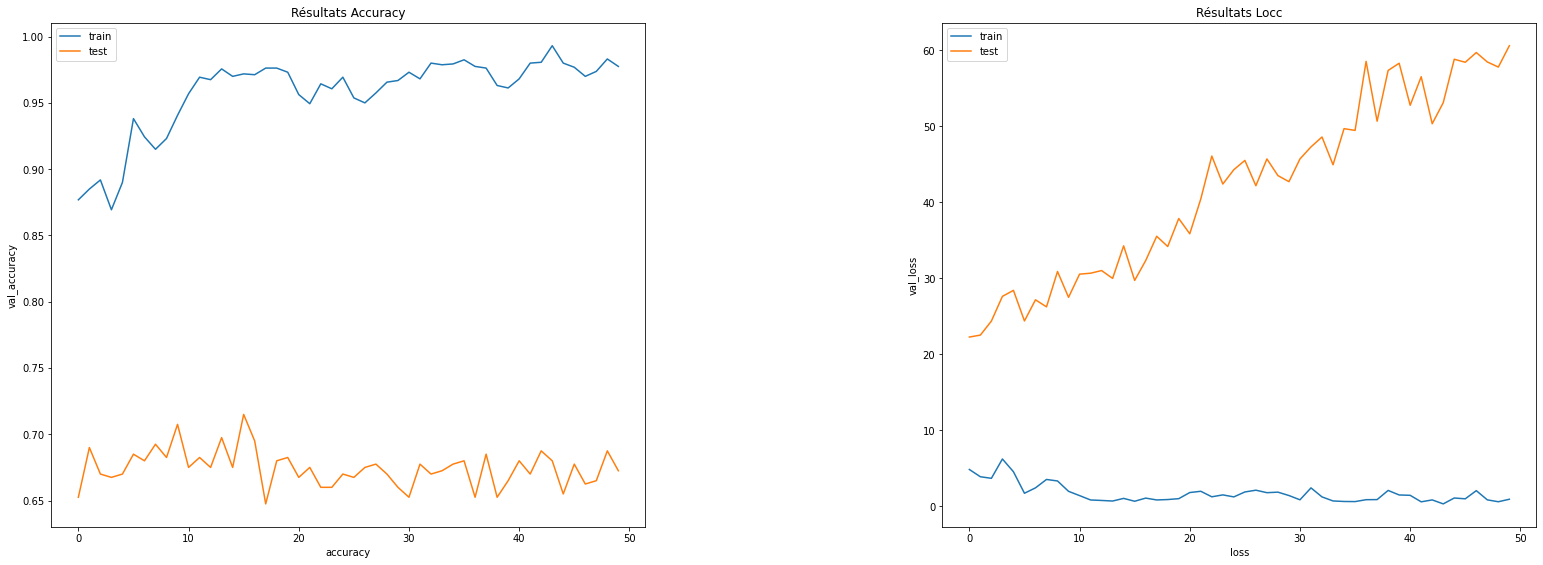

In [ ]:
## Evaluation du modèle

graphique_resultats(recherche_modele_VGG16_0[2])

In [ ]:
## Evaluation du modèle

evaluation_model_VGG16_0 = evaluation_model(recherche_modele_VGG16_0[1])

print('Loss sur le jeu d\'entrainement: %.2f' % (evaluation_model_VGG16_0[0]))
print('Accuracy sur le jeu d\'entrainement: %.2f' % (evaluation_model_VGG16_0[1]))
print('------------------------------------------------------------')
print('Locc sur le jeu de test: %.2f' % (evaluation_model_VGG16_0[2]))
print('Accuracy sur le jeu de test: %.2f' % (evaluation_model_VGG16_0[3]))

26/26 [==============================] - 12s 468ms/step - loss: 53.3818 - accuracy: 0.6957
Loss sur le jeu d'entrainement: 12.72
Accuracy sur le jeu d'entrainement: 0.92
------------------------------------------------------------
Locc sur le jeu de test: 53.38
Accuracy sur le jeu de test: 0.70


In [ ]:
tab_resulats_VGG16.loc[0] = ['Modele_VGG16_0', nb_couches_train] + evaluation_model_VGG16_0[4]
tab_resulats_VGG16

Nom Nombre_couches_entrainées  ...  Loss_test  Temps_calcul_test
0  Modele_VGG16_0                         1  ...  53.381794          21.501625

[1 rows x 8 columns]

## Choix du nombre de couches à entraîner

Nous pouvons choisir le nombre de couches hautes à ré-entrainer (variant de 5, 10, 16) en comparaison avec le modèle de base qui ne ré-entraine que le nouveau classifieur.

In [ ]:
## Modèle 2 : Choix du nombre de couches à entraîner (Stratégie fine-tuning partiel)

def creation_modele_VGG16_choix_nombre_couches_train(hp):
  ## Chargement du modèle pré-entraîné VGG-16
  model_VGG16 = VGG16(weights="imagenet", include_top=False, input_shape=(224, 224, 3), pooling='avg')
  ## Récupération de la sortie du réseau
  x = model_VGG16.output
  ## Entraînement uniquement du nouveau classifieur et des couches hautes (stratégie fine-tuning partiel)
  for layer in model_VGG16.layers[:nb_layers]:
    layer.trainable = False 
  ## Ajout la nouvelle couche Fully-connected pour la classification 
  predictions = Dense(nb_classes, activation='softmax')(x)
  model_VGG16 = Model(inputs=model_VGG16.input, outputs=predictions)
  ## Implémentation du modèle  
  model_VGG16.compile(optimizer=keras.optimizers.Adam(hp.Choice('learning_rate', values=[0.1, 0.01, 0.001, 0.0001])),
                      loss=hp.Choice('Loss', values=['mean_absolute_error', 'categorical_crossentropy']),
                      metrics=['accuracy'])
  
  return model_VGG16

### Recherche des hyperparamètres optimaux du modèle de base

In [ ]:
## Choix de 16 couches entrainées : Résultats de la recherche 

nb_layers = 5
nb_couches_train = 16
recherche_modele_VGG16_1 = recherche_hyperparametres_optimaux(creation_modele_VGG16_choix_nombre_couches_train)

Trial 5 Complete [00h 05m 07s]
val_accuracy: 0.0625

Best val_accuracy So Far: 0.0625
Total elapsed time: 00h 23m 52s
INFO:tensorflow:Oracle triggered exit
Epoch 1/50
25/25 [==============================] - 32s 1s/step - loss: 2.9953 - accuracy: 0.0469 - val_loss: 2.9957 - val_accuracy: 0.0500
Epoch 2/50
25/25 [==============================] - 30s 1s/step - loss: 2.9957 - accuracy: 0.0500 - val_loss: 2.9957 - val_accuracy: 0.0500
Epoch 3/50
25/25 [==============================] - 30s 1s/step - loss: 2.9957 - accuracy: 0.0500 - val_loss: 2.9957 - val_accuracy: 0.0500
Epoch 4/50
25/25 [==============================] - 30s 1s/step - loss: 2.9957 - accuracy: 0.0500 - val_loss: 2.9957 - val_accuracy: 0.0500
Epoch 5/50
25/25 [==============================] - 30s 1s/step - loss: 2.9957 - accuracy: 0.0500 - val_loss: 2.9957 - val_accuracy: 0.0500
Epoch 6/50
25/25 [==============================] - 30s 1s/step - loss: 2.9957 - accuracy: 0.0500 - val_loss: 2.9957 - val_accuracy: 0.0500
Epoc

In [ ]:
## Espace de recherche

recherche_modele_VGG16_1[0].search_space_summary()

Search space summary
Default search space size: 2
learning_rate (Choice)
{'default': 0.1, 'conditions': [], 'values': [0.1, 0.01, 0.001, 0.0001], 'ordered': True}
Loss (Choice)
{'default': 'mean_absolute_error', 'conditions': [], 'values': ['mean_absolute_error', 'categorical_crossentropy'], 'ordered': False}


In [ ]:
## Modèle optimal

recherche_modele_VGG16_1[1].summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [ ]:
## Vérification des couches entrainées

for i, layer in enumerate(recherche_modele_VGG16_1[1].layers):
  print(i, layer.name, recherche_modele_VGG16_1[1].layers[i].trainable)

0 input_1 False
1 block1_conv1 False
2 block1_conv2 False
3 block1_pool False
4 block2_conv1 False
5 block2_conv2 True
6 block2_pool True
7 block3_conv1 True
8 block3_conv2 True
9 block3_conv3 True
10 block3_pool True
11 block4_conv1 True
12 block4_conv2 True
13 block4_conv3 True
14 block4_pool True
15 block5_conv1 True
16 block5_conv2 True
17 block5_conv3 True
18 block5_pool True
19 global_average_pooling2d True
20 dense True


In [ ]:
## Hyperparamètres optimaux

recherche_modele_VGG16_1[3].results_summary()

Results summary
Results in ./untitled_project
Showing 10 best trials
Objective(name='val_accuracy', direction='max')
Trial summary
Hyperparameters:
learning_rate: 0.0001
Loss: categorical_crossentropy
Score: 0.0625
Trial summary
Hyperparameters:
learning_rate: 0.0001
Loss: categorical_crossentropy
Score: 0.0625
Trial summary
Hyperparameters:
learning_rate: 0.0001
Loss: categorical_crossentropy
Score: 0.05999999865889549
Trial summary
Hyperparameters:
learning_rate: 0.1
Loss: categorical_crossentropy
Score: 0.05000000074505806
Trial summary
Hyperparameters:
learning_rate: 0.0001
Loss: mean_absolute_error
Score: 0.05000000074505806


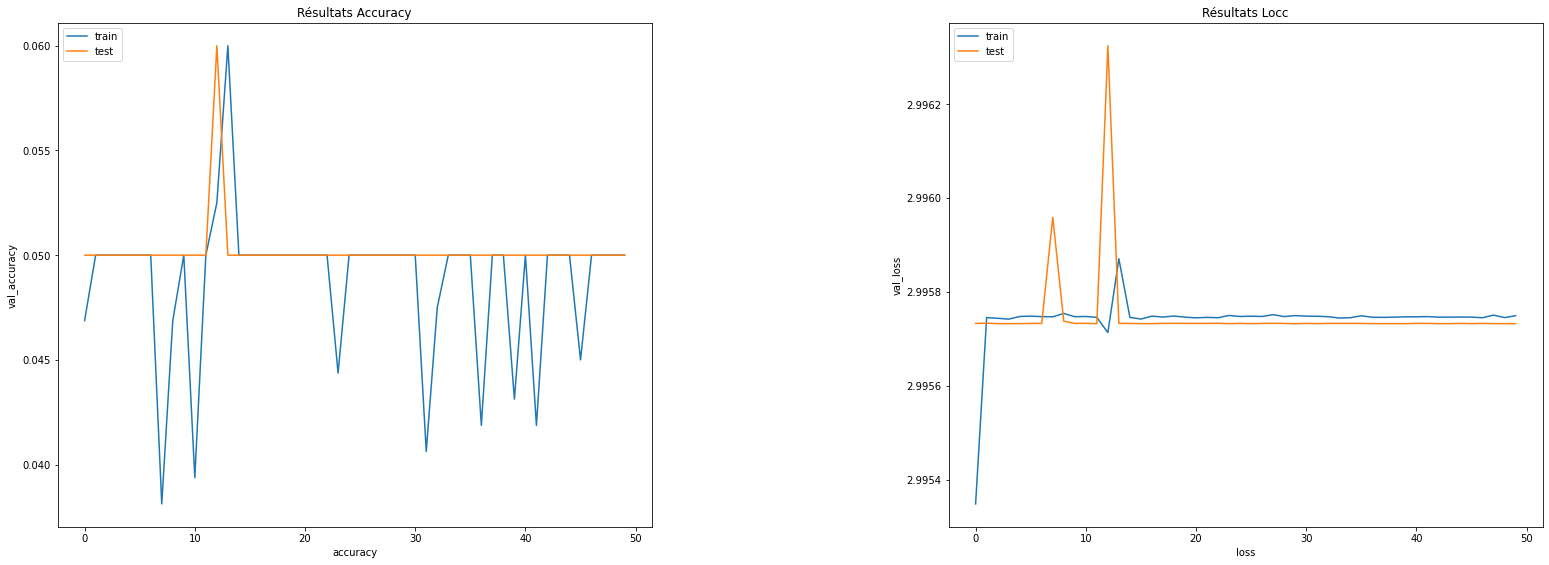

In [ ]:
## Evaluation du modèle

graphique_resultats(recherche_modele_VGG16_1[2])

In [ ]:
## Evaluation du modèle

evaluation_model_VGG16_1 = evaluation_model(recherche_modele_VGG16_1[1])

print('Loss sur le jeu d\'entrainement: %.2f' % (evaluation_model_VGG16_1[0]))
print('Accuracy sur le jeu d\'entrainement: %.2f' % (evaluation_model_VGG16_1[1]))
print('------------------------------------------------------------')
print('Locc sur le jeu de test: %.2f' % (evaluation_model_VGG16_1[2]))
print('Accuracy sur le jeu de test: %.2f' % (evaluation_model_VGG16_1[3]))

26/26 [==============================] - 12s 461ms/step - loss: 2.9957 - accuracy: 0.0294
Loss sur le jeu d'entrainement: 3.00
Accuracy sur le jeu d'entrainement: 0.05
------------------------------------------------------------
Locc sur le jeu de test: 3.00
Accuracy sur le jeu de test: 0.03


In [ ]:
tab_resulats_VGG16.loc[1] = ['Modele_VGG16_1', nb_couches_train] + evaluation_model_VGG16_1[4]
tab_resulats_VGG16

Nom Nombre_couches_entrainées  ...  Loss_test  Temps_calcul_test
0  Modele_VGG16_0                         1  ...  53.381794          21.501625
1  Modele_VGG16_1                        16  ...   2.995721          13.387208

[2 rows x 8 columns]

In [ ]:
## Choix de 10 couches entrainées : Résultats de la recherche 

nb_layers = 11
nb_couches_train = 10
recherche_modele_VGG16_2 = recherche_hyperparametres_optimaux(creation_modele_VGG16_choix_nombre_couches_train)

Trial 5 Complete [00h 02m 06s]
val_accuracy: 0.05000000074505806

Best val_accuracy So Far: 0.05249999836087227
Total elapsed time: 00h 12m 24s
INFO:tensorflow:Oracle triggered exit
Epoch 1/50
25/25 [==============================] - 22s 834ms/step - loss: 3.0113 - accuracy: 0.0512 - val_loss: 3.0014 - val_accuracy: 0.0500
Epoch 2/50
25/25 [==============================] - 20s 812ms/step - loss: 3.0091 - accuracy: 0.0525 - val_loss: 3.0004 - val_accuracy: 0.0475
Epoch 3/50
25/25 [==============================] - 20s 813ms/step - loss: 3.0064 - accuracy: 0.0437 - val_loss: 2.9975 - val_accuracy: 0.0500
Epoch 4/50
25/25 [==============================] - 20s 810ms/step - loss: 3.0029 - accuracy: 0.0456 - val_loss: 3.0046 - val_accuracy: 0.0500
Epoch 5/50
25/25 [==============================] - 20s 810ms/step - loss: 3.0047 - accuracy: 0.0400 - val_loss: 2.9989 - val_accuracy: 0.0500
Epoch 6/50
25/25 [==============================] - 20s 811ms/step - loss: 3.0002 - accuracy: 0.0437 - 

In [ ]:
## Espace de recherche

recherche_modele_VGG16_2[0].search_space_summary()

Search space summary
Default search space size: 2
learning_rate (Choice)
{'default': 0.1, 'conditions': [], 'values': [0.1, 0.01, 0.001, 0.0001], 'ordered': True}
Loss (Choice)
{'default': 'mean_absolute_error', 'conditions': [], 'values': ['mean_absolute_error', 'categorical_crossentropy'], 'ordered': False}


In [ ]:
## Modèle optimal

recherche_modele_VGG16_2[1].summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [ ]:
## Vérification des couches entrainées

for i, layer in enumerate(recherche_modele_VGG16_2[1].layers):
  print(i, layer.name, recherche_modele_VGG16_2[1].layers[i].trainable)

0 input_1 False
1 block1_conv1 False
2 block1_conv2 False
3 block1_pool False
4 block2_conv1 False
5 block2_conv2 False
6 block2_pool False
7 block3_conv1 False
8 block3_conv2 False
9 block3_conv3 False
10 block3_pool False
11 block4_conv1 True
12 block4_conv2 True
13 block4_conv3 True
14 block4_pool True
15 block5_conv1 True
16 block5_conv2 True
17 block5_conv3 True
18 block5_pool True
19 global_average_pooling2d True
20 dense True


In [ ]:
## Hyperparamètres optimaux

recherche_modele_VGG16_2[3].results_summary()

Results summary
Results in ./untitled_project
Showing 10 best trials
Objective(name='val_accuracy', direction='max')
Trial summary
Hyperparameters:
learning_rate: 0.01
Loss: categorical_crossentropy
Score: 0.05249999836087227
Trial summary
Hyperparameters:
learning_rate: 0.1
Loss: categorical_crossentropy
Score: 0.05249999836087227
Trial summary
Hyperparameters:
learning_rate: 0.0001
Loss: mean_absolute_error
Score: 0.05000000074505806
Trial summary
Hyperparameters:
learning_rate: 0.01
Loss: categorical_crossentropy
Score: 0.05000000074505806
Trial summary
Hyperparameters:
learning_rate: 0.1
Loss: mean_absolute_error
Score: 0.05000000074505806


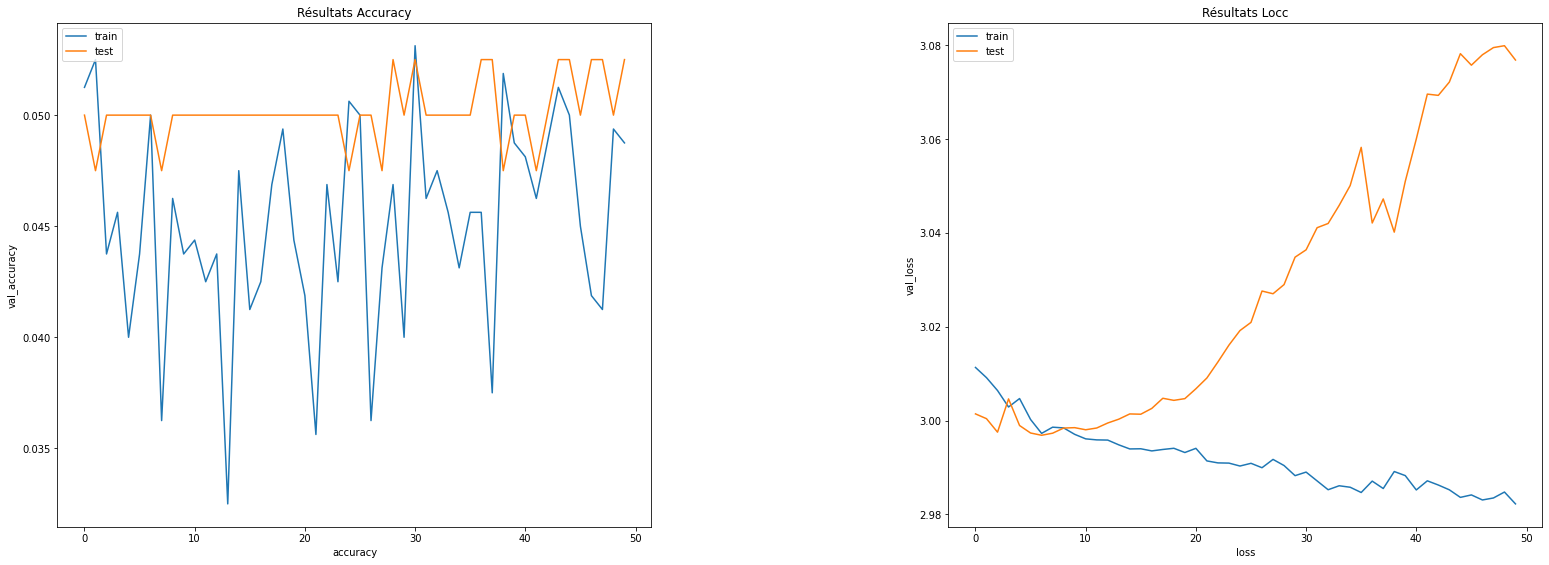

In [ ]:
## Evaluation du modèle

graphique_resultats(recherche_modele_VGG16_2[2])

In [ ]:
## Evaluation du modèle

evaluation_model_VGG16_2 = evaluation_model(recherche_modele_VGG16_2[1])

print('Loss sur le jeu d\'entrainement: %.2f' % (evaluation_model_VGG16_2[0]))
print('Accuracy sur le jeu d\'entrainement: %.2f' % (evaluation_model_VGG16_2[1]))
print('------------------------------------------------------------')
print('Locc sur le jeu de test: %.2f' % (evaluation_model_VGG16_2[2]))
print('Accuracy sur le jeu de test: %.2f' % (evaluation_model_VGG16_2[3]))

26/26 [==============================] - 12s 454ms/step - loss: 3.0230 - accuracy: 0.0453
Loss sur le jeu d'entrainement: 3.00
Accuracy sur le jeu d'entrainement: 0.05
------------------------------------------------------------
Locc sur le jeu de test: 3.02
Accuracy sur le jeu de test: 0.05


In [ ]:
tab_resulats_VGG16.loc[2] = ['Modele_VGG16_2', nb_couches_train] + evaluation_model_VGG16_2[4]
tab_resulats_VGG16

Nom Nombre_couches_entrainées  ...  Loss_test  Temps_calcul_test
0  Modele_VGG16_0                         1  ...  53.381794          21.501625
1  Modele_VGG16_1                        16  ...   2.995721          13.387208
2  Modele_VGG16_2                        10  ...   3.023016          13.277225

[3 rows x 8 columns]

In [ ]:
## Choix de 5 couches entrainées : Résultats de la recherche 

nb_layers = 16
nb_couches_train = 5
recherche_modele_VGG16_3 = recherche_hyperparametres_optimaux(creation_modele_VGG16_choix_nombre_couches_train)

Trial 5 Complete [00h 06m 09s]
val_accuracy: 0.6600000262260437

Best val_accuracy So Far: 0.6600000262260437
Total elapsed time: 00h 13m 25s
INFO:tensorflow:Oracle triggered exit
Epoch 1/50
25/25 [==============================] - 17s 656ms/step - loss: 0.0147 - accuracy: 0.9981 - val_loss: 1.3872 - val_accuracy: 0.6500
Epoch 2/50
25/25 [==============================] - 16s 635ms/step - loss: 0.0096 - accuracy: 0.9987 - val_loss: 1.4091 - val_accuracy: 0.6375
Epoch 3/50
25/25 [==============================] - 16s 635ms/step - loss: 0.0072 - accuracy: 0.9994 - val_loss: 1.4339 - val_accuracy: 0.6475
Epoch 4/50
25/25 [==============================] - 16s 630ms/step - loss: 0.0082 - accuracy: 0.9994 - val_loss: 1.5142 - val_accuracy: 0.6375
Epoch 5/50
25/25 [==============================] - 16s 631ms/step - loss: 0.0127 - accuracy: 0.9987 - val_loss: 1.4059 - val_accuracy: 0.6475
Epoch 6/50
25/25 [==============================] - 16s 634ms/step - loss: 0.0078 - accuracy: 0.9994 - va

In [ ]:
## Espace de recherche

recherche_modele_VGG16_3[0].search_space_summary()

Search space summary
Default search space size: 2
learning_rate (Choice)
{'default': 0.1, 'conditions': [], 'values': [0.1, 0.01, 0.001, 0.0001], 'ordered': True}
Loss (Choice)
{'default': 'mean_absolute_error', 'conditions': [], 'values': ['mean_absolute_error', 'categorical_crossentropy'], 'ordered': False}


In [ ]:
## Modèle optimal

recherche_modele_VGG16_3[1].summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [ ]:
## Vérification des couches entrainées

for i, layer in enumerate(recherche_modele_VGG16_3[1].layers):
  print(i, layer.name, recherche_modele_VGG16_3[1].layers[i].trainable)

0 input_1 False
1 block1_conv1 False
2 block1_conv2 False
3 block1_pool False
4 block2_conv1 False
5 block2_conv2 False
6 block2_pool False
7 block3_conv1 False
8 block3_conv2 False
9 block3_conv3 False
10 block3_pool False
11 block4_conv1 False
12 block4_conv2 False
13 block4_conv3 False
14 block4_pool False
15 block5_conv1 False
16 block5_conv2 True
17 block5_conv3 True
18 block5_pool True
19 global_average_pooling2d True
20 dense True


In [ ]:
## Hyperparamètres optimaux

recherche_modele_VGG16_3[3].results_summary()

Results summary
Results in ./untitled_project
Showing 10 best trials
Objective(name='val_accuracy', direction='max')
Trial summary
Hyperparameters:
learning_rate: 0.0001
Loss: categorical_crossentropy
Score: 0.6600000262260437
Trial summary
Hyperparameters:
learning_rate: 0.001
Loss: mean_absolute_error
Score: 0.05000000074505806
Trial summary
Hyperparameters:
learning_rate: 0.1
Loss: mean_absolute_error
Score: 0.05000000074505806
Trial summary
Hyperparameters:
learning_rate: 0.01
Loss: mean_absolute_error
Score: 0.05000000074505806
Trial summary
Hyperparameters:
learning_rate: 0.001
Loss: categorical_crossentropy
Score: 0.05000000074505806


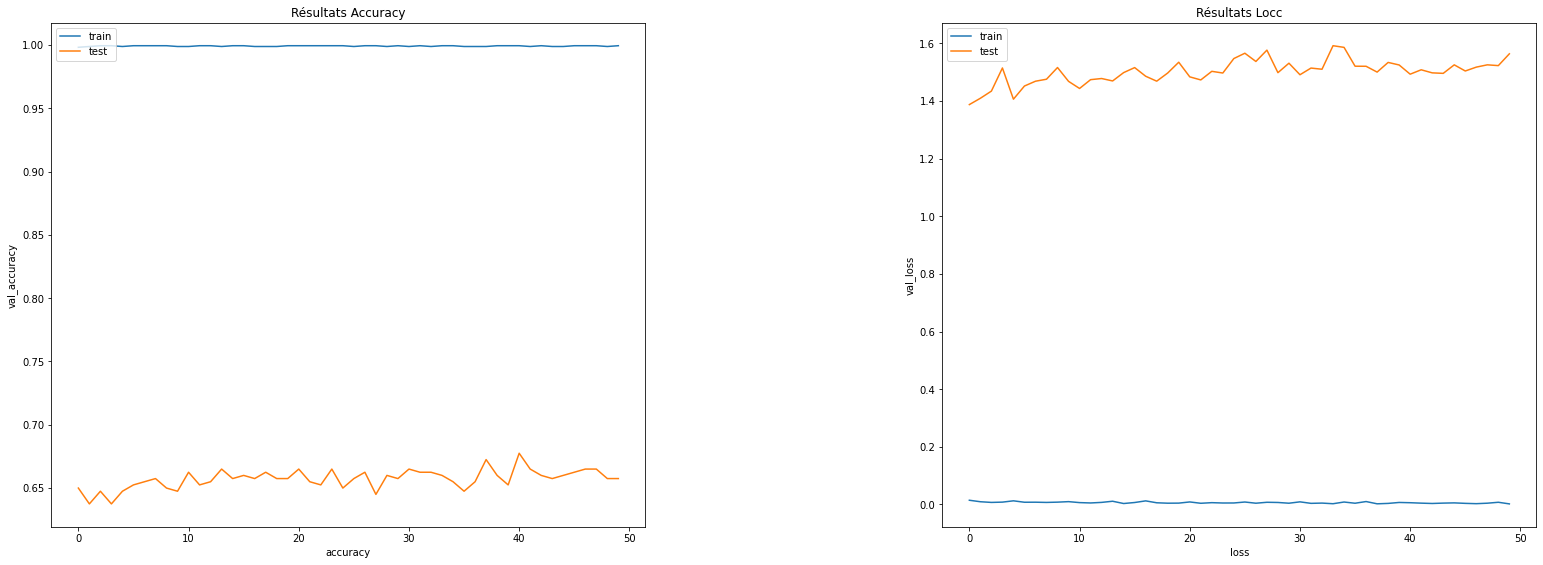

In [ ]:
## Evaluation du modèle

graphique_resultats(recherche_modele_VGG16_3[2])

In [ ]:
## Evaluation du modèle

evaluation_model_VGG16_3 = evaluation_model(recherche_modele_VGG16_3[1])

print('Loss sur le jeu d\'entrainement: %.2f' % (evaluation_model_VGG16_3[0]))
print('Accuracy sur le jeu d\'entrainement: %.2f' % (evaluation_model_VGG16_3[1]))
print('------------------------------------------------------------')
print('Locc sur le jeu de test: %.2f' % (evaluation_model_VGG16_3[2]))
print('Accuracy sur le jeu de test: %.2f' % (evaluation_model_VGG16_3[3]))

26/26 [==============================] - 12s 468ms/step - loss: 1.5589 - accuracy: 0.6736
Loss sur le jeu d'entrainement: 0.31
Accuracy sur le jeu d'entrainement: 0.93
------------------------------------------------------------
Locc sur le jeu de test: 1.56
Accuracy sur le jeu de test: 0.67


In [ ]:
tab_resulats_VGG16.loc[3] = ['Modele_VGG16_3', nb_couches_train] + evaluation_model_VGG16_3[4]
tab_resulats_VGG16

Nom Nombre_couches_entrainées  ...  Loss_test  Temps_calcul_test
0  Modele_VGG16_0                         1  ...  53.381794          21.501625
1  Modele_VGG16_1                        16  ...   2.995721          13.387208
2  Modele_VGG16_2                        10  ...   3.023016          13.277225
3  Modele_VGG16_3                         5  ...   1.558877          13.578077

[4 rows x 8 columns]

## Choix de la sortie du réseau

Les résultats obtenus sont meilleurs en conservant les 5 couches plus hautes du modèle VGG16. Pour la suite des analyses, je conserve que la stratégie fine-tuning partiel en ré-entrainant les couches hautes.

In [ ]:
## Paramètres du modèle

nb_layers = 16
nb_couches_train = 5

In [ ]:
## Modèle 3 : Choix de la sortie du réseau

def creation_modele_VGG16_choix_sortie_reseau(hp):
  ## Chargement du modèle pré-entraîné VGG-16
  model_VGG16 = VGG16(weights="imagenet", include_top=False, input_shape=(224, 224, 3), pooling='avg')
  ## Récupération de la sortie du réseau
  x = model_VGG16.output
  x = Dropout(rate=hp.Float('dropout_1', min_value=0.0,max_value=0.5, step=0.1))(x)
  ## Entraînement uniquement du nouveau classifieur et des couches hautes (stratégie fine-tuning partiel)
  for layer in model_VGG16.layers[:nb_layers]:
    layer.trainable = False 
  ## Ajout la nouvelle couche Fully-connected pour la classification 
  predictions = Dense(nb_classes, activation='softmax')(x)
  model_VGG16 = Model(inputs=model_VGG16.input, outputs=predictions)
  ## Implémentation du modèle  
  model_VGG16.compile(optimizer=keras.optimizers.Adam(hp.Choice('learning_rate', values=[0.1, 0.01, 0.001, 0.0001])),
                      loss=hp.Choice('Loss', values=['mean_absolute_error', 'categorical_crossentropy']),
                      metrics=['accuracy'])
  
  return model_VGG16

### Recherche des hyperparamètres optimaux du modèle de base

In [ ]:
## Choix de la sortie du réseau : Résultats de la recherche 

recherche_modele_VGG16_4 = recherche_hyperparametres_optimaux(creation_modele_VGG16_choix_sortie_reseau)

Trial 5 Complete [00h 09m 51s]
val_accuracy: 0.7024999856948853

Best val_accuracy So Far: 0.7024999856948853
Total elapsed time: 00h 20m 32s
INFO:tensorflow:Oracle triggered exit
Epoch 1/50
25/25 [==============================] - 16s 613ms/step - loss: 0.0677 - accuracy: 0.9794 - val_loss: 1.2631 - val_accuracy: 0.6625
Epoch 2/50
25/25 [==============================] - 14s 584ms/step - loss: 0.0683 - accuracy: 0.9794 - val_loss: 1.2821 - val_accuracy: 0.6775
Epoch 3/50
25/25 [==============================] - 14s 584ms/step - loss: 0.0728 - accuracy: 0.9781 - val_loss: 1.2226 - val_accuracy: 0.6875
Epoch 4/50
25/25 [==============================] - 15s 586ms/step - loss: 0.0584 - accuracy: 0.9837 - val_loss: 1.3428 - val_accuracy: 0.6875
Epoch 5/50
25/25 [==============================] - 15s 587ms/step - loss: 0.0508 - accuracy: 0.9875 - val_loss: 1.3071 - val_accuracy: 0.6750
Epoch 6/50
25/25 [==============================] - 15s 587ms/step - loss: 0.0567 - accuracy: 0.9869 - va

In [ ]:
## Espace de recherche

recherche_modele_VGG16_4[0].search_space_summary()

Search space summary
Default search space size: 3
dropout_1 (Float)
{'default': 0.0, 'conditions': [], 'min_value': 0.0, 'max_value': 0.5, 'step': 0.1, 'sampling': None}
learning_rate (Choice)
{'default': 0.1, 'conditions': [], 'values': [0.1, 0.01, 0.001, 0.0001], 'ordered': True}
Loss (Choice)
{'default': 'mean_absolute_error', 'conditions': [], 'values': ['mean_absolute_error', 'categorical_crossentropy'], 'ordered': False}


In [ ]:
## Modèle optimal

recherche_modele_VGG16_4[1].summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [ ]:
## Vérification des couches entrainées

for i, layer in enumerate(recherche_modele_VGG16_4[1].layers):
  print(i, layer.name, recherche_modele_VGG16_4[1].layers[i].trainable)

0 input_1 False
1 block1_conv1 False
2 block1_conv2 False
3 block1_pool False
4 block2_conv1 False
5 block2_conv2 False
6 block2_pool False
7 block3_conv1 False
8 block3_conv2 False
9 block3_conv3 False
10 block3_pool False
11 block4_conv1 False
12 block4_conv2 False
13 block4_conv3 False
14 block4_pool False
15 block5_conv1 False
16 block5_conv2 True
17 block5_conv3 True
18 block5_pool True
19 global_average_pooling2d True
20 dropout True
21 dense True


In [ ]:
## Hyperparamètres optimaux

recherche_modele_VGG16_4[3].results_summary()

Results summary
Results in ./untitled_project
Showing 10 best trials
Objective(name='val_accuracy', direction='max')
Trial summary
Hyperparameters:
dropout_1: 0.5
learning_rate: 0.0001
Loss: categorical_crossentropy
Score: 0.7024999856948853
Trial summary
Hyperparameters:
dropout_1: 0.30000000000000004
learning_rate: 0.0001
Loss: categorical_crossentropy
Score: 0.6424999833106995
Trial summary
Hyperparameters:
dropout_1: 0.1
learning_rate: 0.0001
Loss: mean_absolute_error
Score: 0.09749999642372131
Trial summary
Hyperparameters:
dropout_1: 0.30000000000000004
learning_rate: 0.01
Loss: categorical_crossentropy
Score: 0.05000000074505806
Trial summary
Hyperparameters:
dropout_1: 0.30000000000000004
learning_rate: 0.1
Loss: categorical_crossentropy
Score: 0.05000000074505806


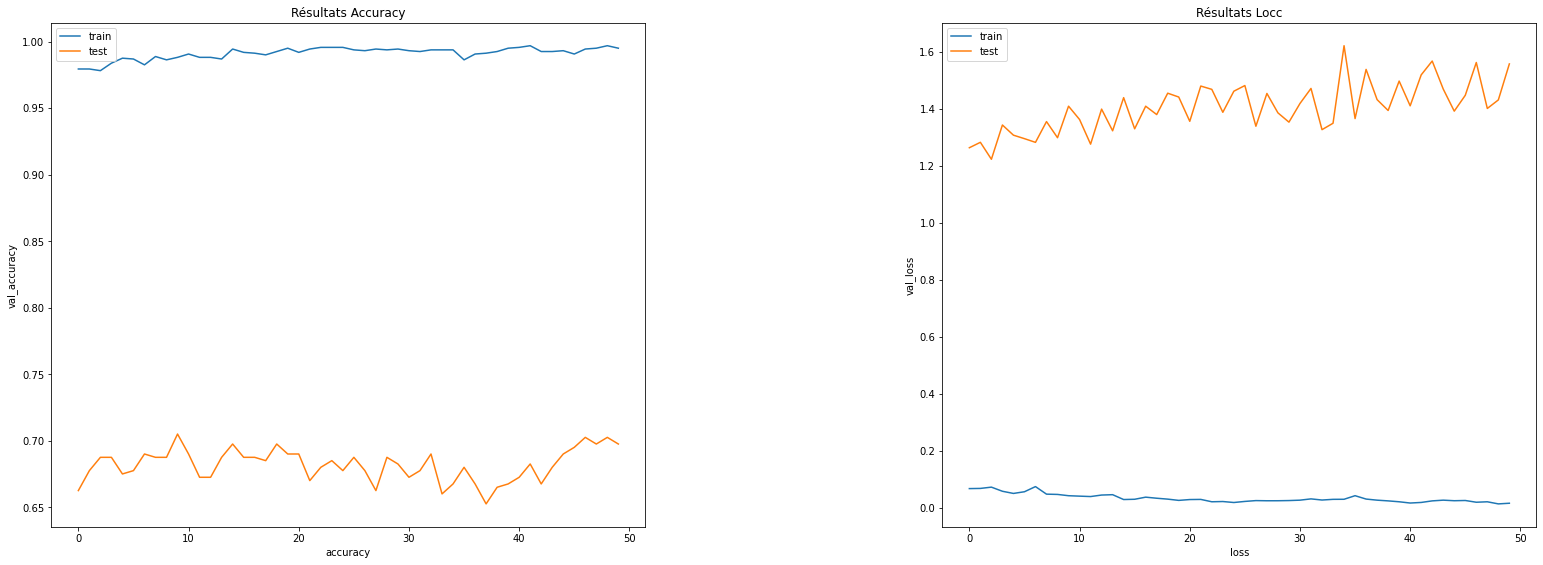

In [ ]:
## Evaluation du modèle

graphique_resultats(recherche_modele_VGG16_4[2])

In [ ]:
## Evaluation du modèle

evaluation_model_VGG16_4 = evaluation_model(recherche_modele_VGG16_4[1])

print('Loss sur le jeu d\'entrainement: %.2f' % (evaluation_model_VGG16_4[0]))
print('Accuracy sur le jeu d\'entrainement: %.2f' % (evaluation_model_VGG16_4[1]))
print('------------------------------------------------------------')
print('Locc sur le jeu de test: %.2f' % (evaluation_model_VGG16_4[2]))
print('Accuracy sur le jeu de test: %.2f' % (evaluation_model_VGG16_4[3]))

26/26 [==============================] - 11s 431ms/step - loss: 1.2951 - accuracy: 0.7073
Loss sur le jeu d'entrainement: 0.31
Accuracy sur le jeu d'entrainement: 0.94
------------------------------------------------------------
Locc sur le jeu de test: 1.30
Accuracy sur le jeu de test: 0.71


In [ ]:
tab_resulats_VGG16.loc[4] = ['Modele_VGG16_4', nb_couches_train] + evaluation_model_VGG16_4[4]
tab_resulats_VGG16

Nom Nombre_couches_entrainées  ...  Loss_test  Temps_calcul_test
0  Modele_VGG16_0                         1  ...  53.381794          21.501625
1  Modele_VGG16_1                        16  ...   2.995721          13.387208
2  Modele_VGG16_2                        10  ...   3.023016          13.277225
3  Modele_VGG16_3                         5  ...   1.558877          13.578077
4  Modele_VGG16_4                         5  ...   1.295118          22.802696

[5 rows x 8 columns]

## Data augmentation

Les résultats obtenus sont meilleurs en ajoutant modifiant la sortie du réseau avec une couche Dropout.

In [ ]:
## Paramètres du modèle

nb_layers = 16
nb_couches_train = 5

In [ ]:
## Modèle 4 : Data augmentation

def creation_modele_VGG16_data_augmentation(hp):
  inputs = layers.Input(shape=(224, 224, 3))
  augment = Sequential([
                      layers.RandomFlip("horizontal_and_vertical", input_shape=(224, 224, 3)), 
                      layers.RandomRotation(hp.Float('RandomRotation', min_value=0.1,max_value=0.9, step=0.2))
  ])
  ## Chargement du modèle pré-entraîné VGG-16
  model_VGG16 = VGG16(weights="imagenet", include_top=False, input_shape=(224, 224, 3), pooling='avg')
  ## Entraînement uniquement du nouveau classifieur et des couches hautes (stratégie fine-tuning partiel)
  for layer in model_VGG16.layers[:nb_layers]:
    layer.trainable = False 
  ## Data augmentation
  x = augment(inputs)
  ## Ajout de la couche Dropout
  x = model_VGG16(x, training=False)
  x = Dropout(rate=hp.Float('dropout_1', min_value=0.0,max_value=0.5, step=0.1))(x)
  ## Ajout la nouvelle couche Fully-connected pour la classification 
  predictions = Dense(nb_classes, activation='softmax')(x)
  model_VGG16 = Model(inputs=inputs, outputs=predictions)
  ## Implémentation du modèle  
  model_VGG16.compile(optimizer=keras.optimizers.Adam(hp.Choice('learning_rate', values=[0.1, 0.01, 0.001, 0.0001])),
                      loss=hp.Choice('Loss', values=['mean_absolute_error', 'categorical_crossentropy']),
                      metrics=['accuracy'])
  
  return model_VGG16

### Recherche des hyperparamètres optimaux du modèle de base

In [ ]:
## Choix de la sortie du réseau : Résultats de la recherche 

recherche_modele_VGG16_5 = recherche_hyperparametres_optimaux(creation_modele_VGG16_data_augmentation)

Trial 5 Complete [00h 08m 21s]
val_accuracy: 0.6549999713897705

Best val_accuracy So Far: 0.6625000238418579
Total elapsed time: 00h 31m 26s
INFO:tensorflow:Oracle triggered exit
Epoch 1/50
25/25 [==============================] - 17s 625ms/step - loss: 0.8099 - accuracy: 0.7281 - val_loss: 1.2055 - val_accuracy: 0.6550
Epoch 2/50
25/25 [==============================] - 15s 604ms/step - loss: 0.7597 - accuracy: 0.7375 - val_loss: 1.2408 - val_accuracy: 0.6675
Epoch 3/50
25/25 [==============================] - 15s 606ms/step - loss: 0.7274 - accuracy: 0.7631 - val_loss: 1.2085 - val_accuracy: 0.6675
Epoch 4/50
25/25 [==============================] - 15s 607ms/step - loss: 0.7476 - accuracy: 0.7594 - val_loss: 1.1799 - val_accuracy: 0.6625
Epoch 5/50
25/25 [==============================] - 15s 608ms/step - loss: 0.7020 - accuracy: 0.7638 - val_loss: 1.1767 - val_accuracy: 0.6525
Epoch 6/50
25/25 [==============================] - 15s 607ms/step - loss: 0.6382 - accuracy: 0.7900 - va

In [ ]:
## Espace de recherche

recherche_modele_VGG16_5[0].search_space_summary()

Search space summary
Default search space size: 4
RandomRotation (Float)
{'default': 0.1, 'conditions': [], 'min_value': 0.1, 'max_value': 0.9, 'step': 0.2, 'sampling': None}
dropout_1 (Float)
{'default': 0.0, 'conditions': [], 'min_value': 0.0, 'max_value': 0.5, 'step': 0.1, 'sampling': None}
learning_rate (Choice)
{'default': 0.1, 'conditions': [], 'values': [0.1, 0.01, 0.001, 0.0001], 'ordered': True}
Loss (Choice)
{'default': 'mean_absolute_error', 'conditions': [], 'values': ['mean_absolute_error', 'categorical_crossentropy'], 'ordered': False}


In [ ]:
## Modèle optimal

recherche_modele_VGG16_5[1].summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
sequential (Sequential)      (None, 224, 224, 3)       0         
_________________________________________________________________
vgg16 (Functional)           (None, 512)               14714688  
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
dense (Dense)                (None, 20)                10260     
Total params: 14,724,948
Trainable params: 4,729,876
Non-trainable params: 9,995,072
_________________________________________________________________


In [ ]:
## Vérification des couches entrainées

for i, layer in enumerate(recherche_modele_VGG16_5[1].layers):
  print(i, layer.name, recherche_modele_VGG16_5[1].layers[i].trainable)

0 input_1 True
1 sequential True
2 vgg16 True
3 dropout True
4 dense True


In [ ]:
## Hyperparamètres optimaux

recherche_modele_VGG16_5[3].results_summary()

Results summary
Results in ./untitled_project
Showing 10 best trials
Objective(name='val_accuracy', direction='max')
Trial summary
Hyperparameters:
RandomRotation: 0.9000000000000001
dropout_1: 0.4
learning_rate: 0.0001
Loss: categorical_crossentropy
Score: 0.6625000238418579
Trial summary
Hyperparameters:
RandomRotation: 0.1
dropout_1: 0.5
learning_rate: 0.0001
Loss: categorical_crossentropy
Score: 0.6549999713897705
Trial summary
Hyperparameters:
RandomRotation: 0.9000000000000001
dropout_1: 0.0
learning_rate: 0.0001
Loss: categorical_crossentropy
Score: 0.6200000047683716
Trial summary
Hyperparameters:
RandomRotation: 0.7000000000000001
dropout_1: 0.0
learning_rate: 0.0001
Loss: mean_absolute_error
Score: 0.12250000238418579
Trial summary
Hyperparameters:
RandomRotation: 0.5000000000000001
dropout_1: 0.1
learning_rate: 0.1
Loss: mean_absolute_error
Score: 0.05000000074505806


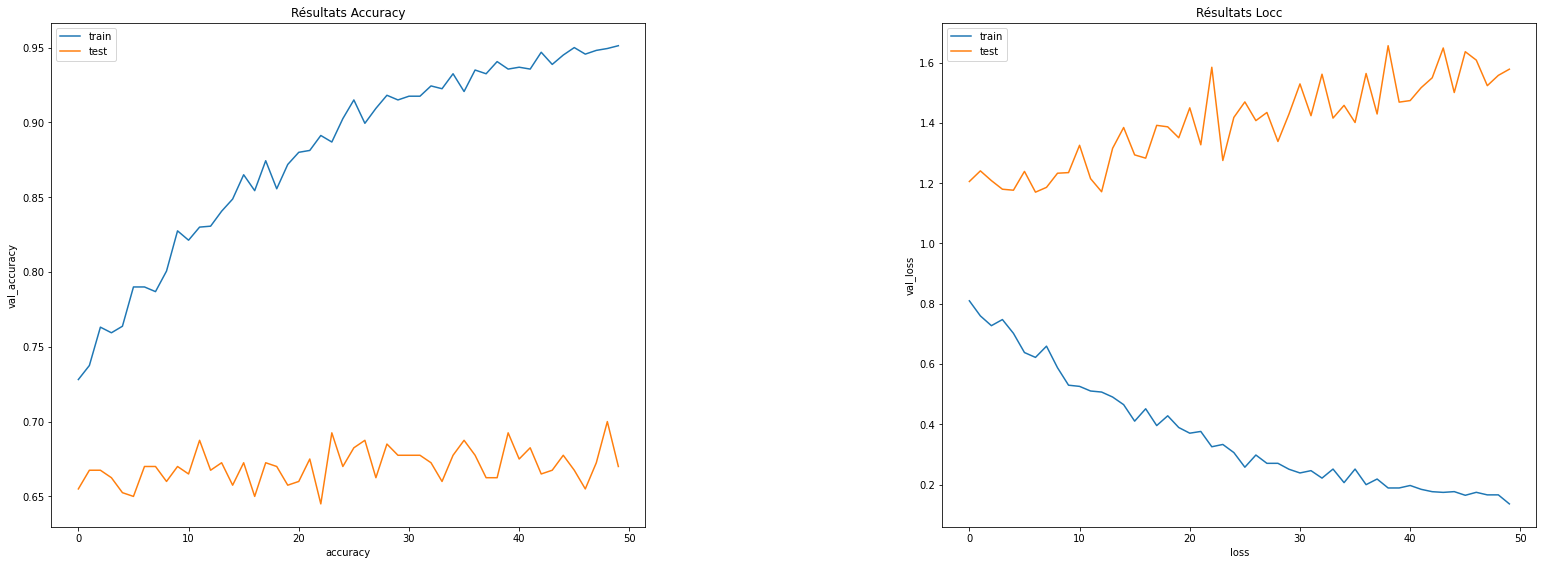

In [ ]:
## Evaluation du modèle

graphique_resultats(recherche_modele_VGG16_5[2])

In [ ]:
## Evaluation du modèle

evaluation_model_VGG16_5 = evaluation_model(recherche_modele_VGG16_5[1])

print('Loss sur le jeu d\'entrainement: %.2f' % (evaluation_model_VGG16_5[0]))
print('Accuracy sur le jeu d\'entrainement: %.2f' % (evaluation_model_VGG16_5[1]))
print('------------------------------------------------------------')
print('Locc sur le jeu de test: %.2f' % (evaluation_model_VGG16_5[2]))
print('Accuracy sur le jeu de test: %.2f' % (evaluation_model_VGG16_5[3]))

26/26 [==============================] - 12s 436ms/step - loss: 1.3824 - accuracy: 0.6908
Loss sur le jeu d'entrainement: 0.34
Accuracy sur le jeu d'entrainement: 0.93
------------------------------------------------------------
Locc sur le jeu de test: 1.38
Accuracy sur le jeu de test: 0.69


In [ ]:
tab_resulats_VGG16.loc[5] = ['Modele_VGG16_5', nb_couches_train] + evaluation_model_VGG16_5[4]
tab_resulats_VGG16

Nom Nombre_couches_entrainées  ...  Loss_test  Temps_calcul_test
0  Modele_VGG16_0                         1  ...  53.381794          21.501625
1  Modele_VGG16_1                        16  ...   2.995721          13.387208
2  Modele_VGG16_2                        10  ...   3.023016          13.277225
3  Modele_VGG16_3                         5  ...   1.558877          13.578077
4  Modele_VGG16_4                         5  ...   1.295118          13.240761
5  Modele_VGG16_5                         5  ...   1.382360          22.432270

[6 rows x 8 columns]

## Comparaison des résultats

In [ ]:
tab_resulats_VGG16

Nom Nombre_couches_entrainées  ...  Loss_test  Temps_calcul_test
0  Modele_VGG16_0                         1  ...  53.381794          21.501625
1  Modele_VGG16_1                        16  ...   2.995721          13.387208
2  Modele_VGG16_2                        10  ...   3.023016          13.277225
3  Modele_VGG16_3                         5  ...   1.558877          13.578077
4  Modele_VGG16_4                         5  ...   1.295118          13.240761
5  Modele_VGG16_5                         5  ...   1.382360          22.432270

[6 rows x 8 columns]

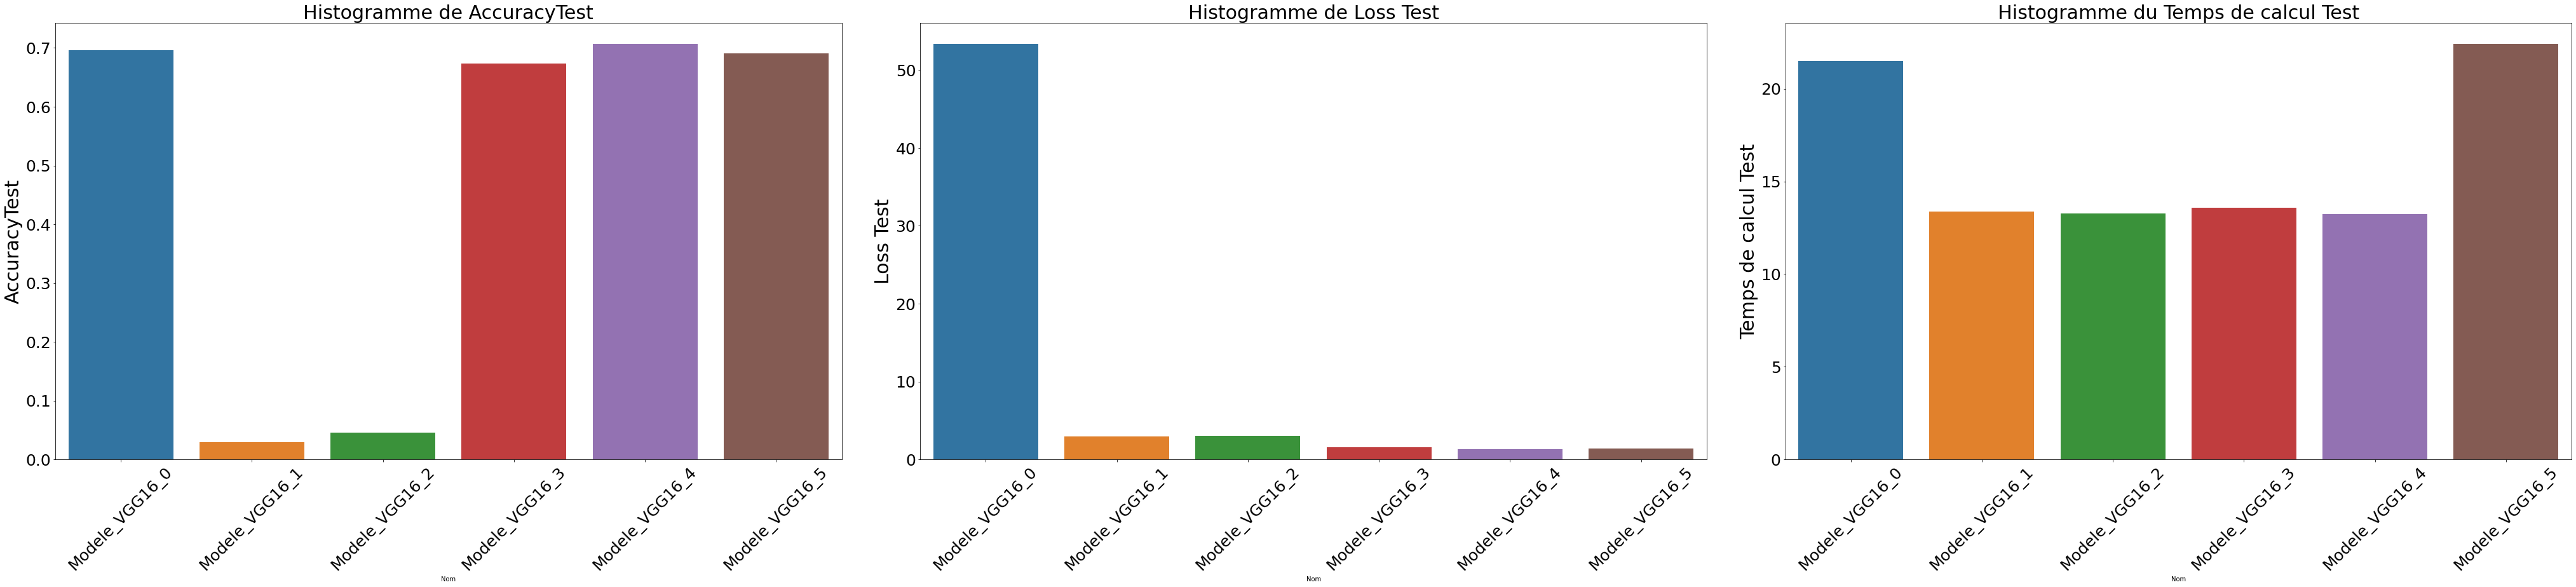

In [ ]:
## Résultats de toutes les architectures testées

plt.figure(1,figsize=(40,30))
plt.gcf().subplots_adjust(left = 0.125, bottom = 0.2, right = 1.5,
                          top = 0.9, wspace = 0.1, hspace = 0.2)

plt.subplot(2,3,1)
sns.barplot(x=tab_resulats_VGG16['Nom'],y=tab_resulats_VGG16['Accuracy_test'])
plt.tick_params(axis = 'both', labelsize = 25)
plt.xticks(rotation=45)
plt.ylabel("AccuracyTest", fontsize = 30)
plt.title('Histogramme de AccuracyTest', fontsize = 30)

plt.subplot(2,3,2)
sns.barplot(x=tab_resulats_VGG16['Nom'],y=tab_resulats_VGG16['Loss_test'])
plt.tick_params(axis = 'both', labelsize = 25)
plt.xticks(rotation=45)
plt.ylabel("Loss Test", fontsize = 30)
plt.title('Histogramme de Loss Test', fontsize = 30)

plt.subplot(2,3,3)
sns.barplot(x=tab_resulats_VGG16['Nom'],y=tab_resulats_VGG16['Temps_calcul_test'])
plt.tick_params(axis = 'both', labelsize = 25)
plt.xticks(rotation=45)
plt.ylabel("Temps de calcul Test", fontsize = 30)
plt.title('Histogramme du Temps de calcul Test', fontsize = 30)

plt.show()

D'après les analyses réallisées, le modèle sélectionné est un CNN composé de 5 blocs de Convolution d'une couche de Convolution chacune et de couches Fully-connected. Il est également possible d'identifier les hyperparamètres epochs et bacth_size otpimaux sur ce modèle.

In [ ]:
## Recherche de l'hyperparamètre epoch optimal

modele_final = recherche_modele_VGG16_4[2]

val_accuracy_epochs = modele_final.history['val_accuracy']
epoch_optim = val_accuracy_epochs.index(max(val_accuracy_epochs)) + 1

print('Eppoch optimal: %d' % (epoch_optim,))

Eppoch optimal: 50


In [ ]:
## Recherche de l'hyperparamètre batch_size optimal entre 10, 20, 32, 40, 60, 80 et 96

best_model_optim = recherche_modele_VGG16_4[1]

for batch_size in [10, 20, 32, 40, 60, 80, 96]:
  evaluation_model_batch_size = recherche_batch_size_optim(best_model_optim, batch_size)
  print('Pour batch_size =', batch_size, ' : Loss =', evaluation_model_batch_size[0], ', Accuracy =', evaluation_model_batch_size[1], 'et Temps de calcul =', evaluation_model_batch_size[2])

Pour batch_size = 10  : Loss = 2.362511396408081 , Accuracy = 0.6938150525093079 et Temps de calcul = 23.408021450999513
Pour batch_size = 20  : Loss = 2.7628848552703857 , Accuracy = 0.7030006051063538 et Temps de calcul = 24.13500729200041
Pour batch_size = 32  : Loss = 1.3691787719726562 , Accuracy = 0.7005511522293091 et Temps de calcul = 14.249794491999978
Pour batch_size = 40  : Loss = 1.7254499197006226 , Accuracy = 0.6876913905143738 et Temps de calcul = 25.798187806000215
Pour batch_size = 60  : Loss = 1.628687858581543 , Accuracy = 0.6993263959884644 et Temps de calcul = 22.623216817999946
Pour batch_size = 80  : Loss = 1.477474570274353 , Accuracy = 0.7232088446617126 et Temps de calcul = 14.438621976999912
Pour batch_size = 96  : Loss = 1.468703031539917 , Accuracy = 0.7311696410179138 et Temps de calcul = 15.93459387200005


# Sélection du modèle et prédictions

In [ ]:
batch_size_optimal = 96
epoch_optim = 50

In [ ]:
## Sauvegarde du modèle optimal sélectionné

best_model_optim = recherche_modele_VGG16_4[1]
best_model_optim.fit(X_train_train, y_train_train, validation_data=(X_validation, y_validation), epochs=epoch_optim, batch_size=batch_size_optimal, verbose=0)

best_model_optim.save('best_model_images.h5')
files.download('best_model_images.h5')

In [ ]:
## Chemin de l'image

chemin_image = '/Projet_6/Images/n02085620-Chihuahua/n02085620_10074.jpg'

"La race du chien sur l'image la plus probable est : Chihuahua avec une probabilité de 0.9881718754768372"

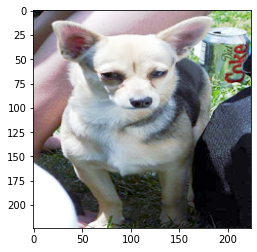

In [ ]:
## Prédiction de la race du chien à partir d'une image

def prediction_image(chemin_image, modele, liste_races_chien):
  ## Traitements de l'image
  img = Image.open(chemin_image).convert('RGB')
  img = img.resize((224, 224))
  img = ImageOps.equalize(img, mask = None)
  img = img.rotate(0, resample=Image.BILINEAR)
  img_traitee = img.filter(ImageFilter.BoxBlur(0))
  plt.imshow(img_traitee)

  ## Preprocessing de l'image
  img_process = np.array(img_traitee).astype(np.float32)
  img_process = img_process.reshape((1, 224, 224, 3))
  img_process = preprocess_input(img_process)

  ## Prédiction de l'image
  predictions = modele.predict(img_process)
  liste_races_chien = liste_races_chien
  return 'La race du chien sur l\'image la plus probable est : {} avec une probabilité de {}'.format(liste_races_chien[np.argmax(predictions[0])], np.max(predictions[0]))

prediction_image(chemin_image, best_model_optim, list(train_classes))